# MS4S16 Coursework: Breast Cancer
### _by `Owhonda Moses`_

## Table of Contents
<ul>
<li><a href="#intro">Introduction</a></li>
<li><a href="#wrangling">Preliminary Wrangling</a></li>
<li><a href="#preprocess">Data Preprocessing</a></li>
<li><a href="#eda">Exploratory Data Analysis</a></li>
<li><a href="#unsupervised">Unsupervised Machine Learning</a></li>
<li><a href="#classifier">Machine Learning Classification</a></li>
<li><a href="#conclude">Conclusions</a></li>
</ul>

<a id='intro'></a>
# Introduction

> The Wisconsin Breast Cancer dataset contains features computed from digitized images of fine needle aspirate (FNA) of breast masses. These features are used to classify whether a breast mass is benign or malignant. Each sample in the dataset consists of measurements from a breast mass biopsy, including attributes such as `radius, texture, perimeter, area, smoothness, compactness, concavity, symmetry, concave points`, and `fractal dimension`.
The dataset contains 571 samples of numerical measurements and binary classification indicating whether the tumor is benign (class 0) or malignant (class 1).

The primary objectives of this analysis include:

- _Data Preprocessing_: We will preprocess the dataset to handle missing values and invalid data, encode features, scale the features, and split it into training and testing sets.

- _Exploratory Data Analysis (EDA)_: We will perform exploratory data analysis to gain insights into the distribution of features, correlations, and other patterns within the dataset. Visualization techniques such as histograms, box plots, and correlation matrices will be used to explore the data.

- _Unsupervised Machine Learning_: Using the K-Means Clustering algorithm, unsupervised machine learning techniques will be employed to partition the data into benign and malignant clusters. Additionally, we will explore baseline dimensionality reduction techniques such as Principal Component Analysis (PCA) and more advanced methods like Kernel PCA and Supervised UMAP (Uniform Manifold Approximation and Projection) to assess potential improvements in clustering.

- _Machine Learning Classification_: Classification algorithms will be applied to classify breast tumors as benign or malignant. We will explore techniques such as logistic regression and random forests. Model performance metrics such as accuracy, precision, recall, F1-score, and validation curves will be used to evaluate the models.

By the end of this notebook, we aim to develop a robust classification model that can accurately predict whether a breast tumor is benign or malignant based on the provided features.

<a id='wrangling'></a>
## Preliminary Wrangling

In [1]:
# Import necessary libraries and set plots to be embedded inline
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import matplotlib.patches as mpatches
sns.set_context('poster')
sns.set_style('darkgrid')
%matplotlib inline

from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.preprocessing import MinMaxScaler, LabelEncoder
from sklearn.linear_model import LinearRegression, LogisticRegression
from sklearn.model_selection import StratifiedKFold, validation_curve, GridSearchCV
from sklearn.decomposition import PCA, KernelPCA
from sklearn.manifold import TSNE
from sklearn.cluster import DBSCAN, KMeans, SpectralClustering
from sklearn.metrics import silhouette_score, confusion_matrix, classification_report, accuracy_score
from sklearn.ensemble import RandomForestClassifier
import umap

import warnings
warnings.filterwarnings('ignore') # Suppress irrelevant warnings
pd.set_option('display.max_columns', None) # Set pandas option to display all columns

In [2]:
# Load in the dataset into a pandas dataframe
df = pd.read_csv('MS4S16_Dataset.csv')

In [3]:
# Preview data
df.head()

id diagnosis  radius_mean  texture_mean  perimeter_mean  area_mean  \
0    842302.0         M        17.99         10.38          122.80     1001.0   
1    842517.0         M        20.57         17.77          132.90     1326.0   
2  84300903.0         M        19.69         21.25          130.00     1203.0   
3  84348301.0         M        11.42         20.38           77.58      386.1   
4  84358402.0         M        20.29         14.34          135.10     1297.0   

   smoothness_mean  compactness_mean  concavity_mean  concave points_mean  \
0          0.11840           0.27760          0.3001              0.14710   
1          0.08474           0.07864          0.0869              0.07017   
2          0.10960           0.15990          0.1974              0.12790   
3          0.14250           0.28390          0.2414              0.10520   
4          0.10030           0.13280          0.1980              0.10430   

   symmetry_mean  fractal_dimension_mean  radius_se  texture_se  perimeter_se  \
0         0.2419                 0.07871     1.0950      0.9053         8.589   
1         0.1812                 0.05667     0.5435      0.7339         3.398   
2         0.2069                 0.05999     0.7456      0.7869         4.585   
3         0.2597                 0.09744     0.4956      1.1560         3.445   
4         0.1809                 0.05883     0.7572      0.7813         5.438   

   area_se  smoothness_se  compactness_se  concavity_se  concave points_se  \
0   153.40       0.006399         0.04904       0.05373            0.01587   
1    74.08       0.005225         0.01308       0.01860            0.01340   
2    94.03       0.006150         0.04006       0.03832            0.02058   
3    27.23       0.009110         0.07458       0.05661            0.01867   
4    94.44       0.011490         0.02461       0.05688            0.01885   

   symmetry_se  fractal_dimension_se  radius_worst  texture_worst  \
0      0.03003              0.006193         25.38          17.33   
1      0.01389              0.003532         24.99          23.41   
2      0.02250              0.004571         23.57          25.53   
3      0.05963              0.009208         14.91          26.50   
4      0.01756              0.005115         22.54          16.67   

   perimeter_worst  area_worst  smoothness_worst  compactness_worst  \
0           184.60      2019.0            0.1622             0.6656   
1           158.80      1956.0            0.1238             0.1866   
2           152.50      1709.0            0.1444             0.4245   
3            98.87       567.7            0.2098             0.8663   
4           152.20      1575.0            0.1374             0.2050   

   concavity_worst  concave points_worst  symmetry_worst  \
0           0.7119                0.2654          0.4601   
1           0.2416                0.1860          0.2750   
2           0.4504                0.2430          0.3613   
3           0.6869                0.2575          0.6638   
4           0.4000                0.1625          0.2364   

   fractal_dimension_worst  
0                  0.11890  
1                  0.08902  
2                  0.08758  
3                  0.17300  
4                  0.07678

In [4]:
# Preview data info and summary statistics
print(df.shape)
print(df.info())
df.describe()

(571, 32)
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 571 entries, 0 to 570
Data columns (total 32 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   id                       568 non-null    float64
 1   diagnosis                568 non-null    object 
 2   radius_mean              566 non-null    float64
 3   texture_mean             565 non-null    float64
 4   perimeter_mean           567 non-null    float64
 5   area_mean                566 non-null    float64
 6   smoothness_mean          568 non-null    float64
 7   compactness_mean         567 non-null    float64
 8   concavity_mean           567 non-null    float64
 9   concave points_mean      563 non-null    float64
 10  symmetry_mean            568 non-null    float64
 11  fractal_dimension_mean   567 non-null    float64
 12  radius_se                565 non-null    float64
 13  texture_se               563 non-null    float64
 14  perimeter_se    

id  radius_mean  texture_mean  perimeter_mean    area_mean  \
count  5.680000e+02   566.000000    565.000000      567.000000   566.000000   
mean   3.011402e+07    14.103267   -241.973664       91.949048   654.942403   
std    1.250894e+08     3.517424    445.216862       24.358029   352.555899   
min    8.670000e+03     6.981000   -999.000000       43.790000   143.500000   
25%    8.690778e+05    11.692500   -999.000000       75.190000   420.300000   
50%    9.060010e+05    13.320000     17.000000       86.240000   548.750000   
75%    8.812852e+06    15.780000     21.010000      104.200000   787.050000   
max    9.113205e+08    28.110000     39.280000      188.500000  2501.000000   

       smoothness_mean  compactness_mean  concavity_mean  concave points_mean  \
count       568.000000        567.000000      567.000000           563.000000   
mean          0.096312          0.104333        0.088712            -3.500369   
std           0.014178          0.052878        0.079739            59.492306   
min           0.052630          0.019380        0.000000          -999.000000   
25%           0.086290          0.064710        0.029520             0.019885   
50%           0.095895          0.092630        0.061540             0.033340   
75%           0.105325          0.130400        0.130000             0.073520   
max           0.163400          0.345400        0.426800             0.201200   

       symmetry_mean  fractal_dimension_mean   radius_se  texture_se  \
count     568.000000              567.000000  565.000000  563.000000   
mean        0.187402              -14.033372    0.405800    1.220584   
std         0.115008              117.935328    0.278141    0.552454   
min         0.000700             -999.000000    0.111500    0.360200   
25%         0.161900                0.057585    0.233500    0.838400   
50%         0.179200                0.061440    0.324200    1.130000   
75%         0.195700                0.066035    0.478900    1.474500   
max         2.100000                0.097440    2.873000    4.885000   

       perimeter_se     area_se  smoothness_se  compactness_se  concavity_se  \
count    568.000000  565.000000     565.000000      564.000000    563.000000   
mean       2.868202   40.350173       0.007026        0.025342      0.031900   
std        2.025761   45.725607       0.002998        0.017831      0.030334   
min        0.757000    2.100000       0.001713        0.002252      0.000000   
25%        1.605000   17.740000       0.005169        0.012942      0.015035   
50%        2.285500   24.440000       0.006369        0.020435      0.025860   
75%        3.360000   45.190000       0.008102        0.032125      0.042185   
max       21.980000  542.200000       0.031130        0.135400      0.396000   

       concave points_se  symmetry_se  fractal_dimension_se  radius_worst  \
count         562.000000   563.000000          5.640000e+02    558.000000   
mean            0.011781     0.020594          6.006402e-03     16.269794   
std             0.006214     0.008301          5.047334e-02      4.842370   
min             0.000000     0.007882          2.000000e-07      7.930000   
25%             0.007621     0.015170          2.244500e-03     13.015000   
50%             0.010920     0.018750          3.216500e-03     14.965000   
75%             0.014710     0.023535          4.570250e-03     18.782500   
max             0.052790     0.078950          1.200000e+00     36.040000   

       texture_worst  perimeter_worst    area_worst  smoothness_worst  \
count     550.000000       565.000000    567.000000        562.000000   
mean       25.735691       110.948035    897.936508          0.132469   
std         6.123776        59.245691    688.231051          0.022865   
min        12.020000        50.410000    185.200000          0.071170   
25%        21.222500        84.160000    515.550000          0.116850   
50%        25.455000        97.820000    686.600000          0.131350   


In [5]:
# Define function to plot histograms
def plot_histograms(data, bins, rows, cols, figure):
    """
    Plot histograms for each column in the DataFrame.

    Parameters:
    - data: DataFrame containing the data to plot
    - bins: Number of bins for the histograms
    - rows: Number of rows in the subplot grid
    - cols: Number of columns in the subplot grid
    - figure: Tuple specifying the figure size (width, height)

    Returns:
    - None
    """
    # Create subplots and flatten the 2D array of axes into a 1D array
    fig, axes = plt.subplots(nrows=rows, ncols=cols, figsize=figure)
    fig.subplots_adjust(hspace=0.5)
    axes = axes.flatten()

    # Loop through each column and plot a histogram
    for i, column in enumerate(data):
        ax = axes[i]
        ax.hist(df[column], bins=bins, color='skyblue', edgecolor='black')
        ax.set_title(column)
        ax.grid(True)

    plt.show();

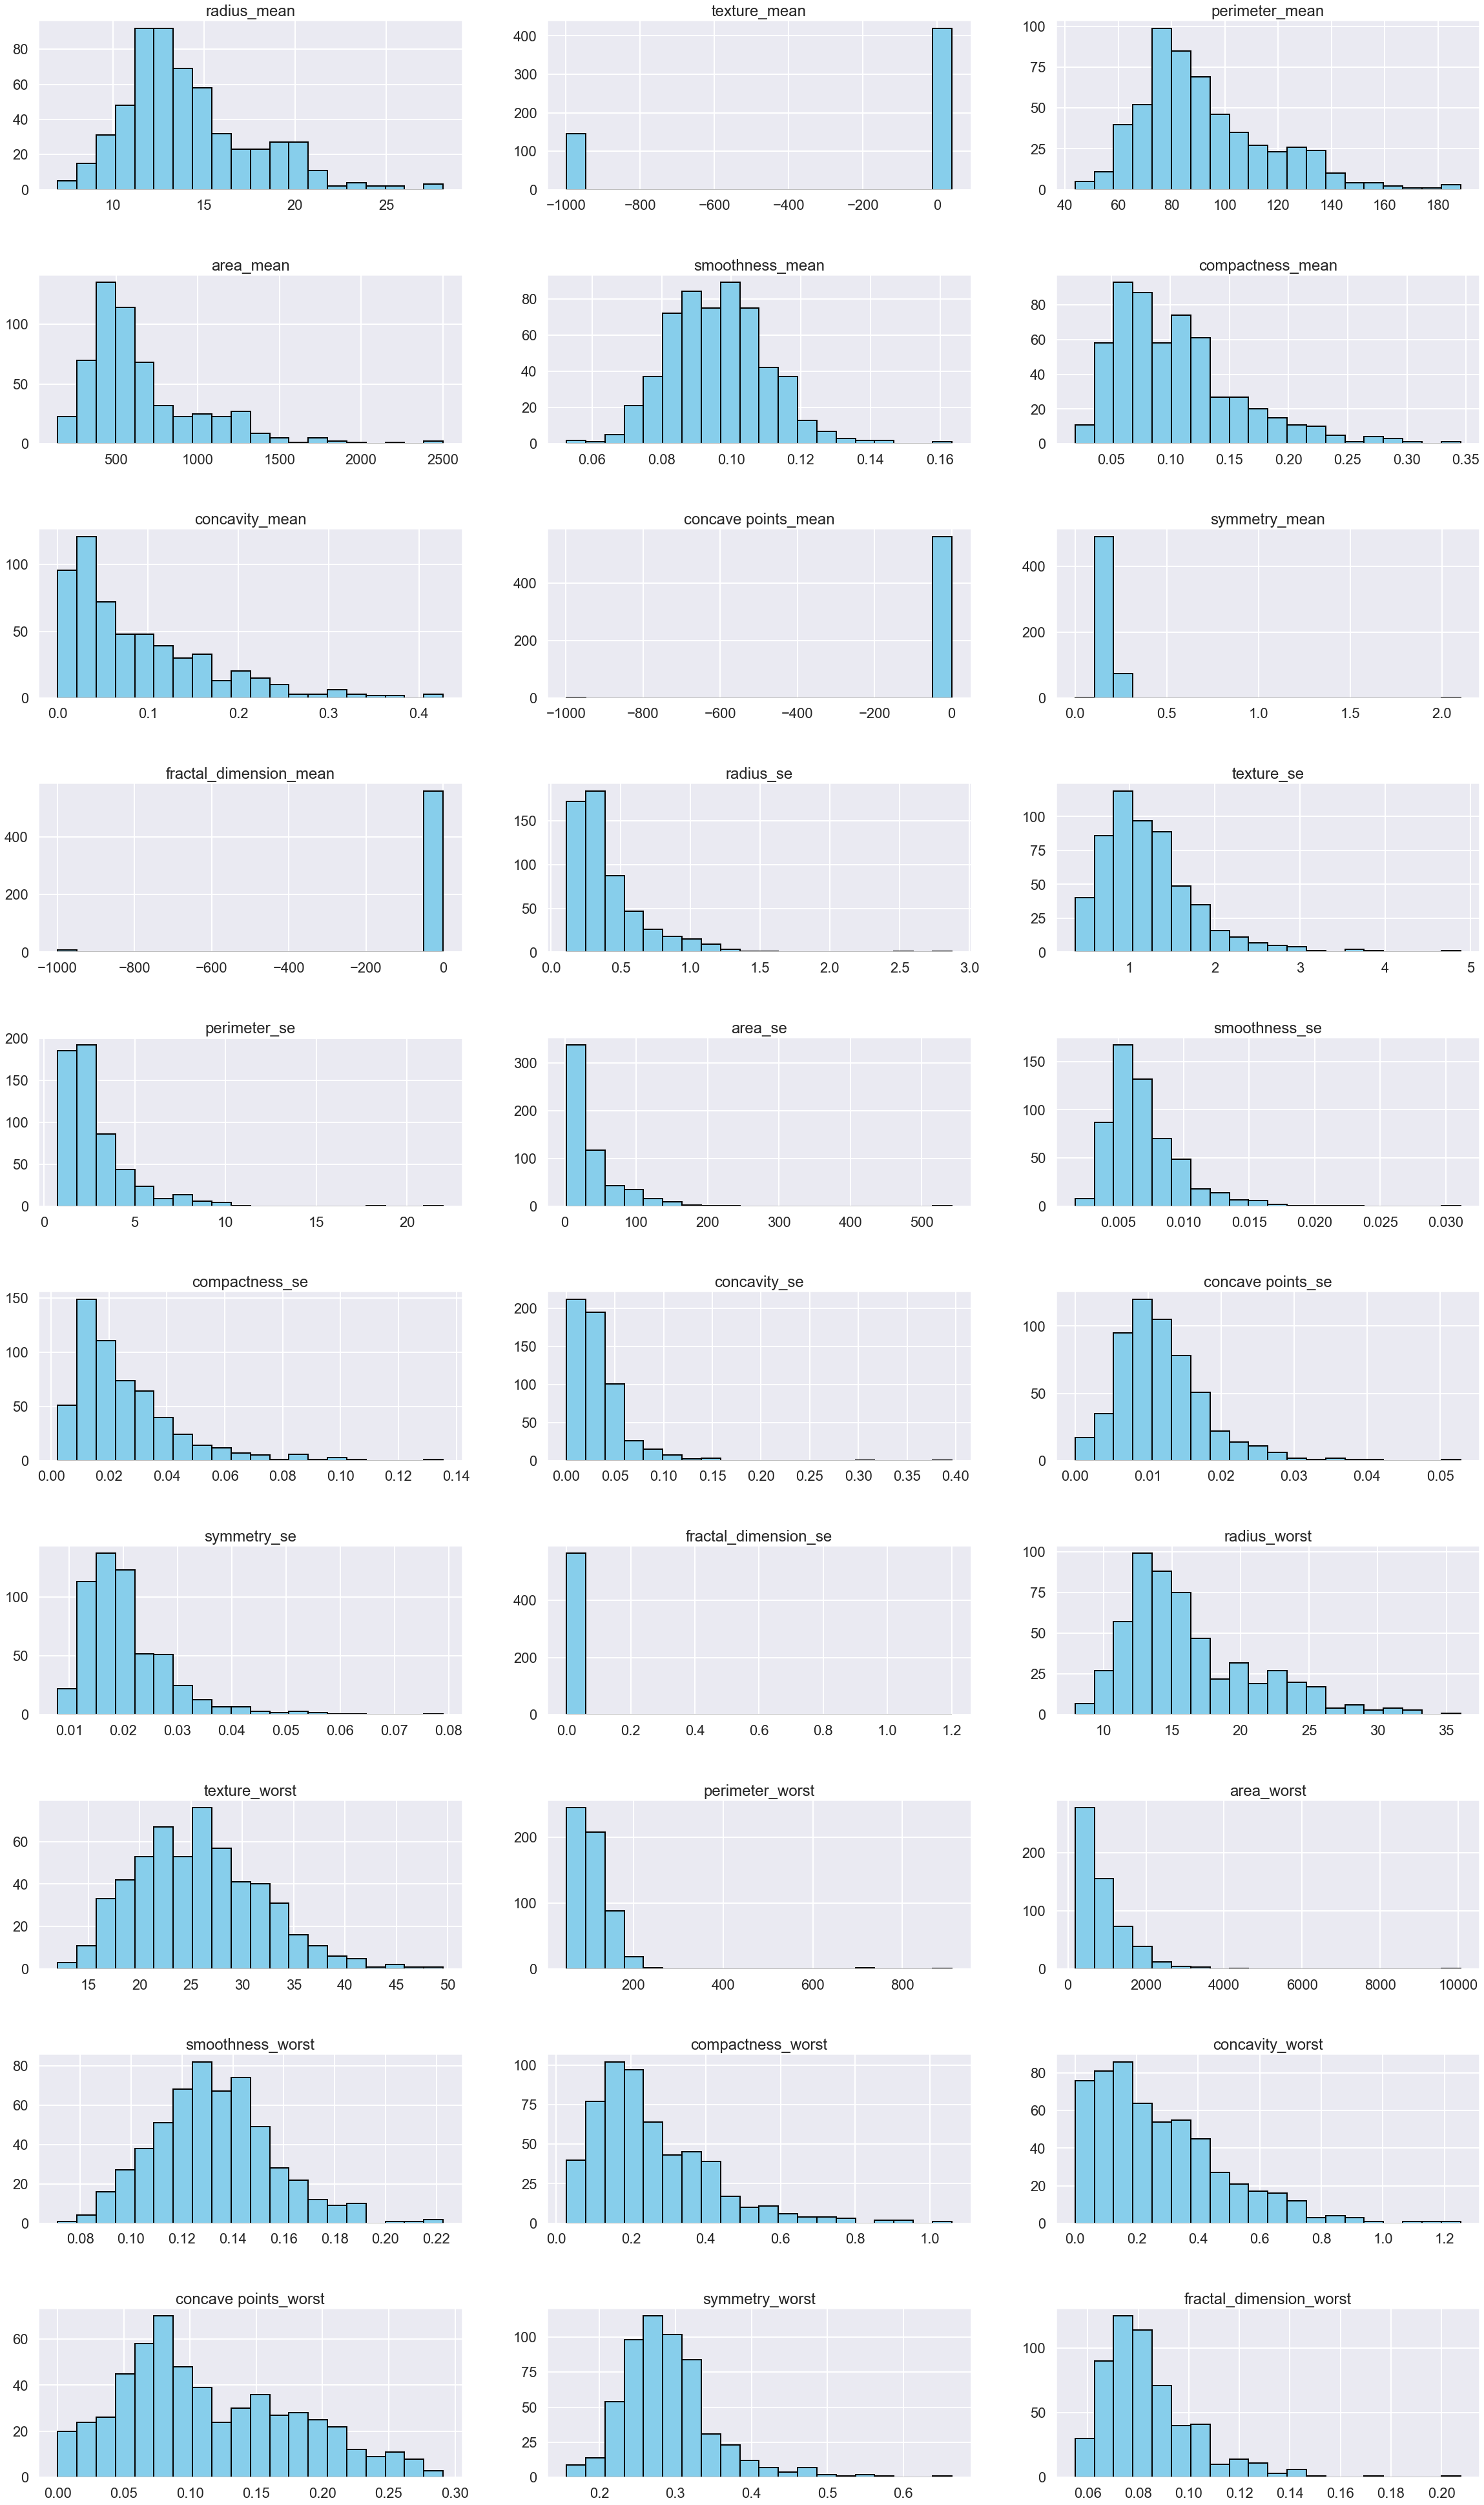

In [6]:
# Plot histogram to preview distribution of features
plot_histograms(df.columns[2:], 20, 10, 3, (40, 70))

In [7]:
# Function to plot boxplots
def plot_boxplots(data, rows, cols, figure):
    """
    Plot boxplots for each column in the DataFrame.

    Parameters:
    - data: DataFrame containing the data to plot
    - rows: Number of rows in the subplot grid
    - cols: Number of columns in the subplot grid
    - figure: Tuple specifying the figure size (width, height)

    Returns:
    - None
    """
    # Plot subplots and flatten the axes for easier iteration
    fig, axes = plt.subplots(nrows=rows, ncols=cols, figsize=figure, sharey=True)
    axes = axes.flatten()

    # Loop through selected columns and create box plots
    for i, col in enumerate(data):
        sns.boxplot(x=df[col], ax=axes[i])
        axes[i].set_title(col)
        axes[i].tick_params(axis='x', rotation=90)

    plt.tight_layout()
    plt.show();

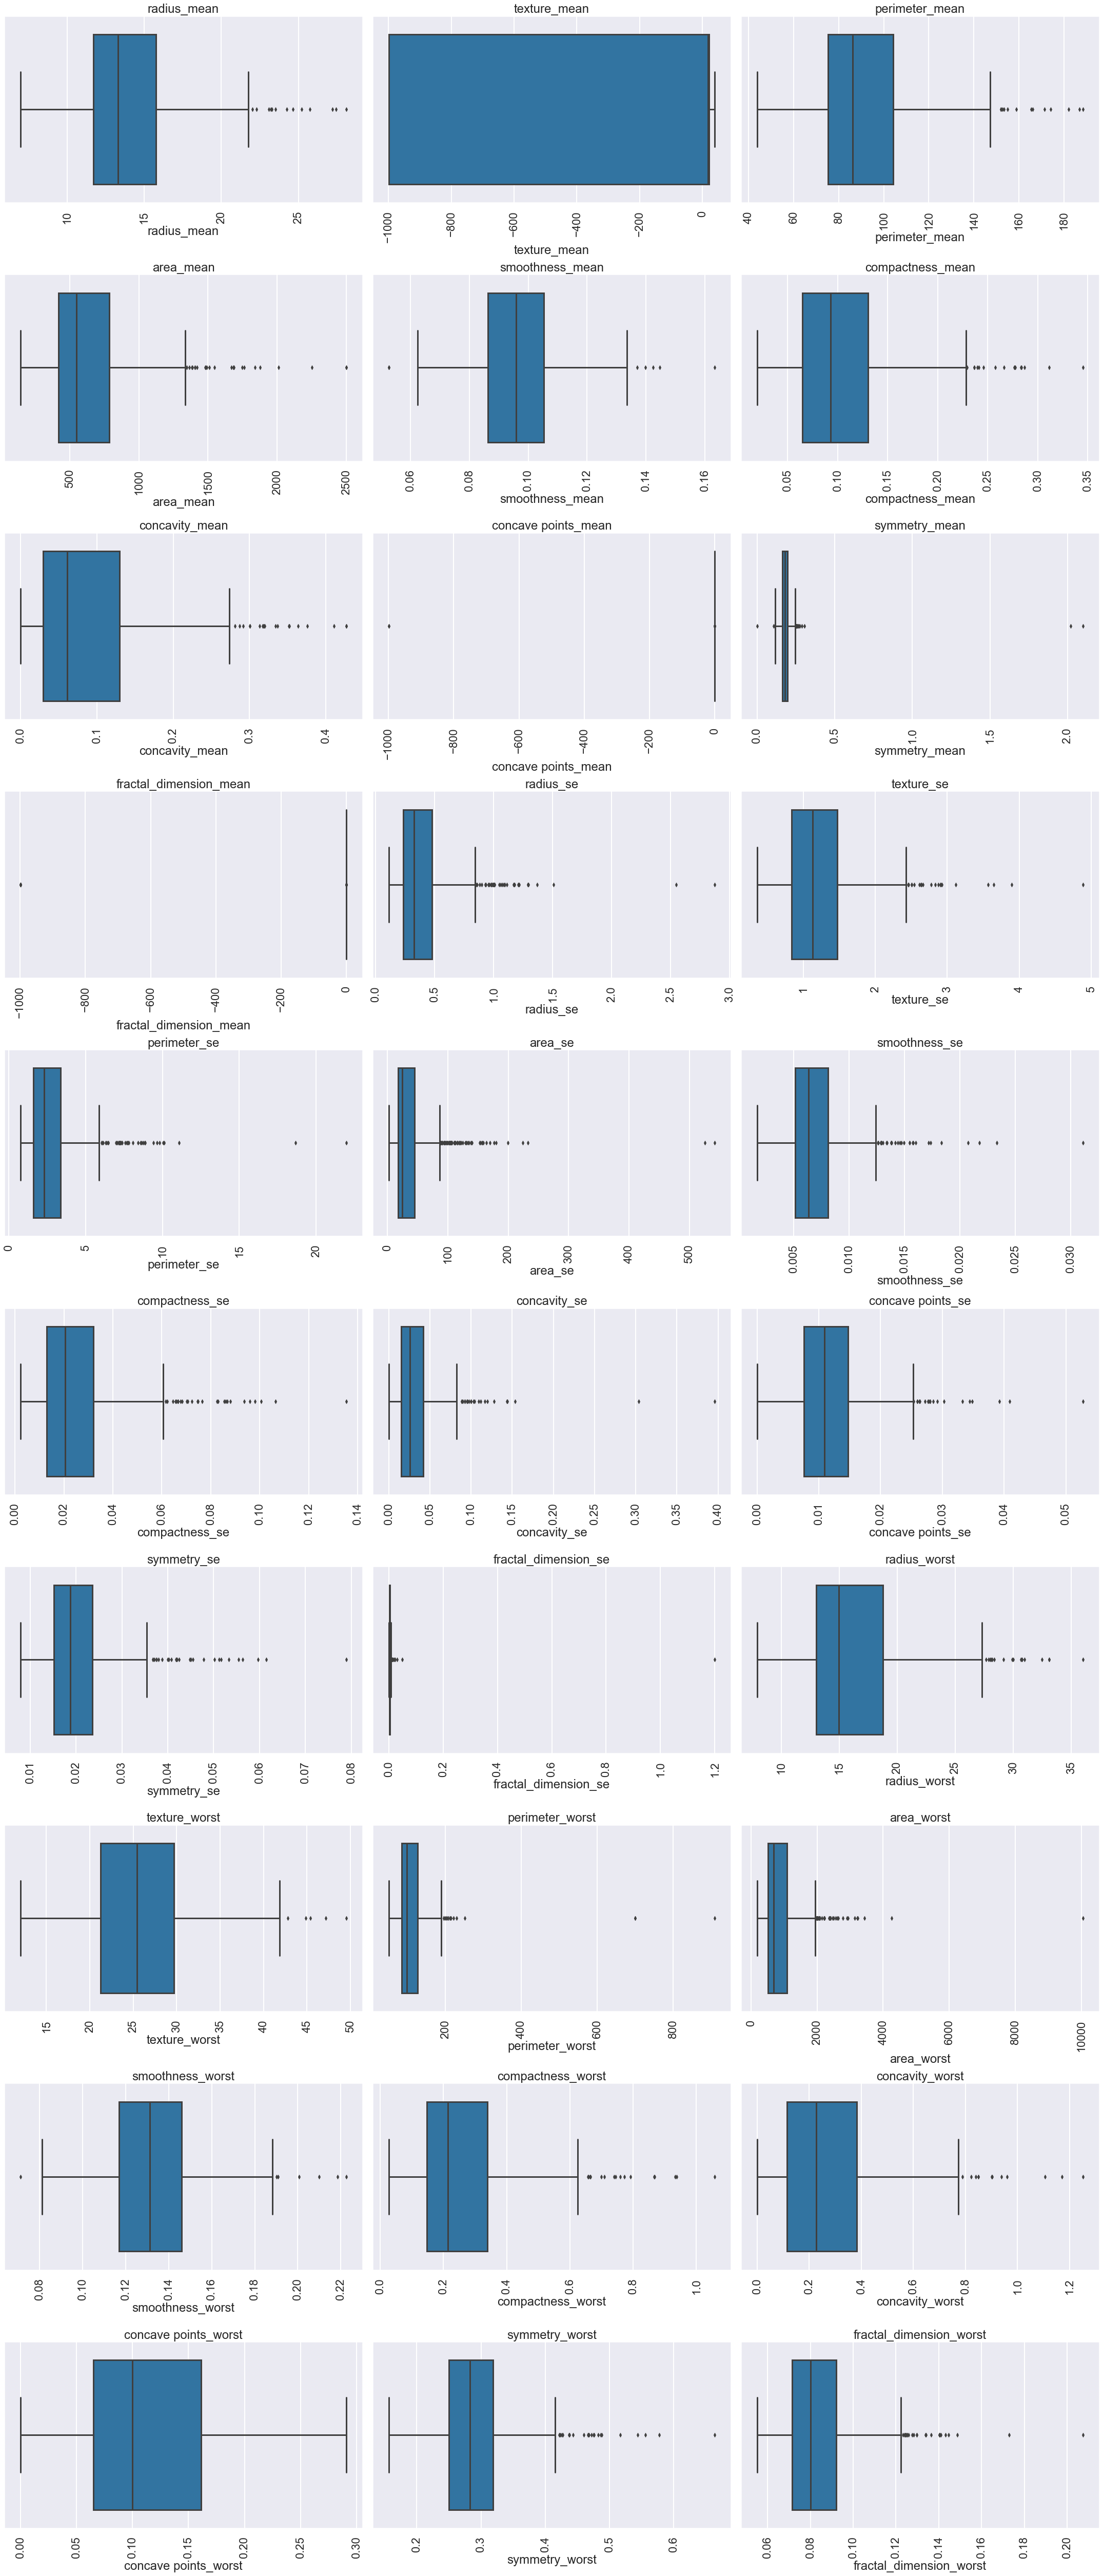

In [8]:
# Plot Boxplots
plot_boxplots(df.columns[2:], 10, 3, (30, 70))

**Note:** By combining the visual inspection of the plots with the summary statistics provided by the `describe()` method, it becomes evident that our dataset contains numerous outliers and null values. The histograms reveal that the majority of features exhibit a Gaussian distribution with a positive skew, indicating a tendency for higher values in the dataset. This observation underscores the need for careful handling of outliers and missing values during the preprocessing phase to ensure the robustness of our subsequent analysis and modeling.

In [9]:
# Check for entries with some values of 0
zeros = df[df.applymap(lambda x: isinstance(x, (int, float)) and x == 0).any(axis=1)]
zeros.sample(5)

id diagnosis  radius_mean  texture_mean  perimeter_mean  area_mean  \
562  925311.0         B       11.200         29.37             NaN      386.0   
175  872113.0         B        8.671         14.45           54.42      227.2   
140  868999.0         B        9.738         11.97           61.24      288.5   
101  862722.0         B        6.981         13.43           43.79      143.5   
314  894047.0         B        8.597         18.60           54.09      221.2   

     smoothness_mean  compactness_mean  concavity_mean  concave points_mean  \
562          0.07449           0.03558             0.0                  0.0   
175          0.09138           0.04276             0.0                  0.0   
140          0.09250           0.04102             0.0                  0.0   
101          0.11700           0.07568             0.0                  0.0   
314          0.10740           0.05847             0.0                  0.0   

     symmetry_mean  fractal_dimension_mean  radius_se  texture_se  \
562         0.1060                 0.05502     0.3141      3.8960   
175         0.1722                 0.06724     0.2204      0.7873   
140         0.1903                 0.06422     0.1988      0.4960   
101         0.1930                 0.07818     0.2241      1.5080   
314         0.2163                 0.07359     0.3368      2.7770   

     perimeter_se  area_se  smoothness_se  compactness_se  concavity_se  \
562         2.041    2.200       0.007594        0.008878           0.0   
175         1.435   11.360       0.009172        0.008007           0.0   
140         1.218   12.260       0.006040        0.005656           0.0   
101         1.553    9.833       0.010190        0.010840           0.0   
314         2.222   17.810       0.020750        0.014030           0.0   

     concave points_se  symmetry_se  fractal_dimension_se  radius_worst  \
562                0.0      0.01989              0.001773        11.920   
175                0.0      0.02711              0.003399         9.262   
140                0.0      0.02277              0.003220        10.620   
101                0.0      0.02659              0.004100         7.930   
314                0.0      0.06146              0.006820         8.952   

     texture_worst  perimeter_worst  area_worst  smoothness_worst  \
562          38.30           700.00       439.6           0.09267   
175          17.04            58.36       259.2           0.11620   
140          14.10            66.53       342.9           0.12340   
101          19.54            50.41       185.2           0.15840   
314          22.44            56.65       240.1           0.13470   

     compactness_worst  concavity_worst  concave points_worst  symmetry_worst  \
562            0.05494              0.0                   0.0          0.1566   
175            0.07057              0.0                   0.0          0.2592   
140            0.07204              0.0                   0.0          0.3105   
101            0.12020              0.0                   0.0          0.2932   
314            0.07767              0.0                   0.0          0.3142   

     fractal_dimension_worst  
562                  0.05905  
175                  0.07848  
140                  0.08151  
101                  0.09382  
314                  0.08116

**Note:** From the analysis of entries with values of $0$, it has been observed that the three measurements of `Concavity` and `Concave points` contain some values of 0. This might imply the absence of concavity or very minimal concavity in those instances. Therefore, these values won't be treated as outliers in subsequent analysis.

In [10]:
# Check for entries with negative values
negs = df[df.applymap(lambda x: isinstance(x, (int, float)) and x < 0).any(axis=1)]
negs

id diagnosis  radius_mean  texture_mean  perimeter_mean  \
38     855133.0         M        14.99       -999.00           95.54   
47      85715.0         M        13.17       -999.00           85.98   
57     857793.0         M        14.71       -999.00           95.55   
233  88206102.0         M        20.51       -999.00          134.40   
269   8910720.0         B        10.71       -999.00           69.50   
..          ...       ...          ...           ...             ...   
536    919555.0         M        20.55       -999.00          137.80   
537  91979701.0         M        14.27       -999.00           93.77   
538    919812.0         B        11.69       -999.00           76.37   
544    922296.0         B        13.21         28.06           84.88   
568    927241.0         M        20.60         29.33          140.10   

     area_mean  smoothness_mean  compactness_mean  concavity_mean  \
38         NaN          0.09387           0.05131         0.02398   
47       534.6          0.11580           0.12310         0.12260   
57       656.9          0.11370           0.13650         0.12930   
233     1319.0          0.09159           0.10740         0.15540   
269      344.9          0.10820           0.12890         0.08448   
..         ...              ...               ...             ...   
536     1308.0          0.10460           0.17390         0.20850   
537      629.8          0.10380           0.11540         0.14630   
538      406.4          0.12360           0.15520         0.04515   
544      538.4          0.08671           0.06877         0.02987   
568     1265.0          0.11780           0.27700         0.35140   

     concave points_mean  symmetry_mean  fractal_dimension_mean  radius_se  \
38               0.02899         0.1565                 0.05504     1.2140   
47               0.07340         0.2128                 0.06777     0.2871   
57               0.08123         0.2027                 0.06758     0.4226   
233              0.08340         0.1448                 0.05592     0.5240   
269              0.02867         0.1668                 0.06862     0.3198   
..                   ...            ...                     ...        ...   
536              0.13220         0.2127                 0.06251     0.6986   
537              0.06139         0.1926                 0.05982     0.2027   
538              0.04531         0.2131                 0.07405     0.2957   
544              0.03275         0.1628              -999.00000     0.2351   
568              0.15200         0.2397              -999.00000     0.7260   

     texture_se  perimeter_se  area_se  smoothness_se  compactness_se  \
38       2.1880         8.077   106.00       0.006883         0.01094   
47       0.8937         1.897    24.25       0.006532         0.02336   
57       1.1500         2.735    40.09       0.003659         0.02855   
233      1.1890         3.767    70.01       0.005020         0.02062   
269      1.4890         2.230    20.74       0.008902         0.04785   
..          ...           ...      ...            ...             ...   
536      0.9901         4.706    87.78       0.004578         0.02616   
537      1.8510         1.895    18.54       0.006113         0.02583   
538      1.9780         2.158    20.95       0.012880         0.03495   
544      1.5970         1.539    17.85       0.004973         0.01372   
568      1.5950         5.772    86.22       0.006522         0.06158   

     concavity_se  concave points_se  symmetry_se  fractal_dimension_se  \
38        0.01818           0.019170     0.007882              0.001754   
47        0.02905           0.012150     0.017430              0.003643   
57        0.02572           0.012720     0.018170              0.004108   
233       0.03457           0.010910     0.012980              0.002887   
269       0.07339           0.017450     0.027280              0.007610   
..            ...                ...          ...      

**Note:** Upon examining the results, it is found that there are 149 rows in the dataset where either `texture_mean`, `concave points_mean`, or `fractal_dimension_mean` has a number less than $0$. These negative values are unrealistic within the context of the data. However, due to the significant number of affected rows, outright removal may result in loss of valuable data. Instead, we will treat these values as null values and address them using imputation methods during a later stage of data preprocessing.

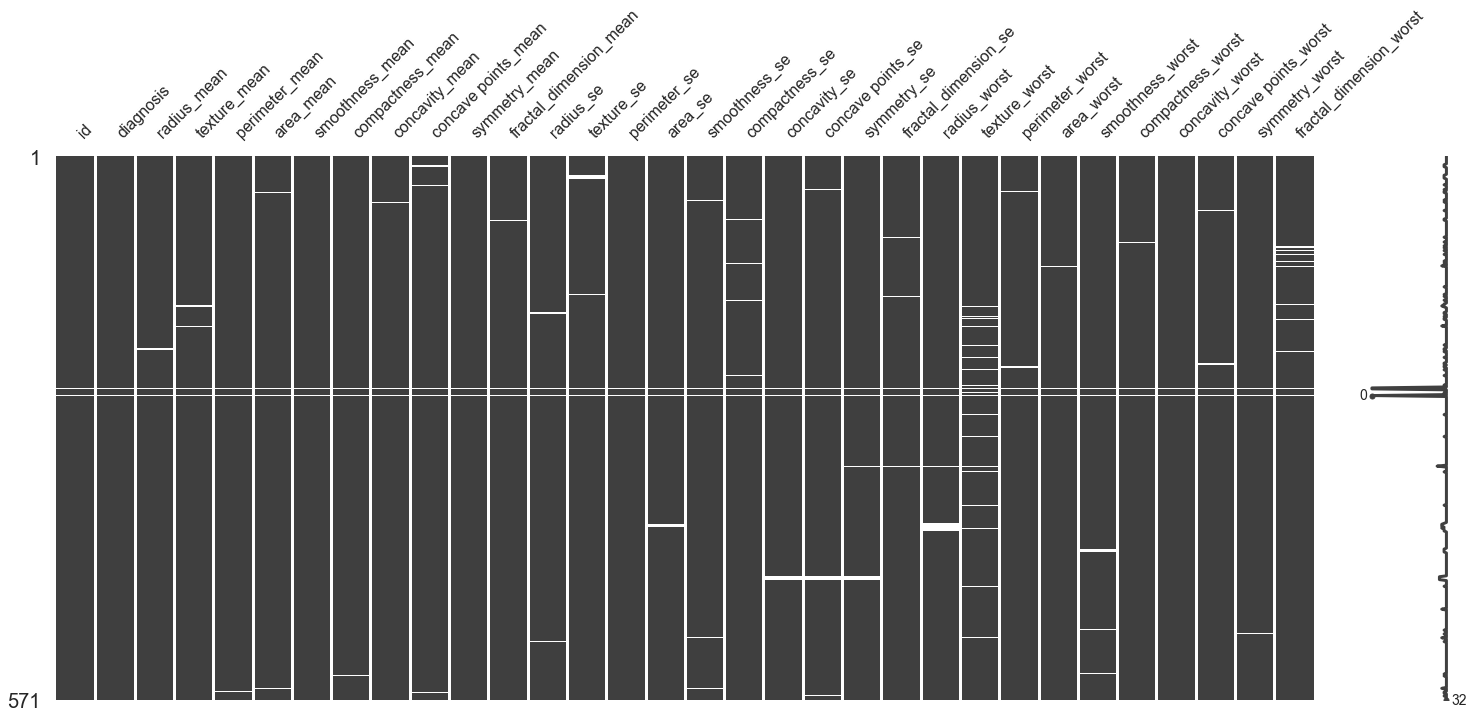

In [11]:
# Visualize all null values in the dataset
import missingno as msno # Import missigno library

msno.matrix(df);

The visualization provides a comprehensive overview of null values present in our dataset. Each horizontal line in the matrix represents a row in the dataset, while columns correspond to features. The presence of a white vertical bar indicates a null value within the corresponding feature. The visualization allows us to quickly identify patterns of missing values across the entire dataset, for instance, we can observe two consistent white lines across all features, which suggests empty rows or samples.

In [12]:
# Check number of null values in each feature
df.isnull().sum()

id                          3
diagnosis                   3
radius_mean                 5
texture_mean                6
perimeter_mean              4
area_mean                   5
smoothness_mean             3
compactness_mean            4
concavity_mean              4
concave points_mean         8
symmetry_mean               3
fractal_dimension_mean      4
radius_se                   6
texture_se                  8
perimeter_se                3
area_se                     6
smoothness_se               6
compactness_se              7
concavity_se                8
concave points_se           9
symmetry_se                 8
fractal_dimension_se        7
radius_worst               13
texture_worst              21
perimeter_worst             6
area_worst                  4
smoothness_worst            9
compactness_worst           4
concavity_worst             3
concave points_worst        6
symmetry_worst              4
fractal_dimension_worst    13
dtype: int64

Our approach to handling null values will involve employing a simple linear regression model with one predictor. To initiate this process, we first need to ascertain the linear relationships between variables. We will utilize the `.corr()` method to identify variables that exhibit a correlation coefficient of $0.7$ or higher with at least one other variable. This correlation threshold helps us identify potential predictor variables that could be used to impute null values through linear regression.

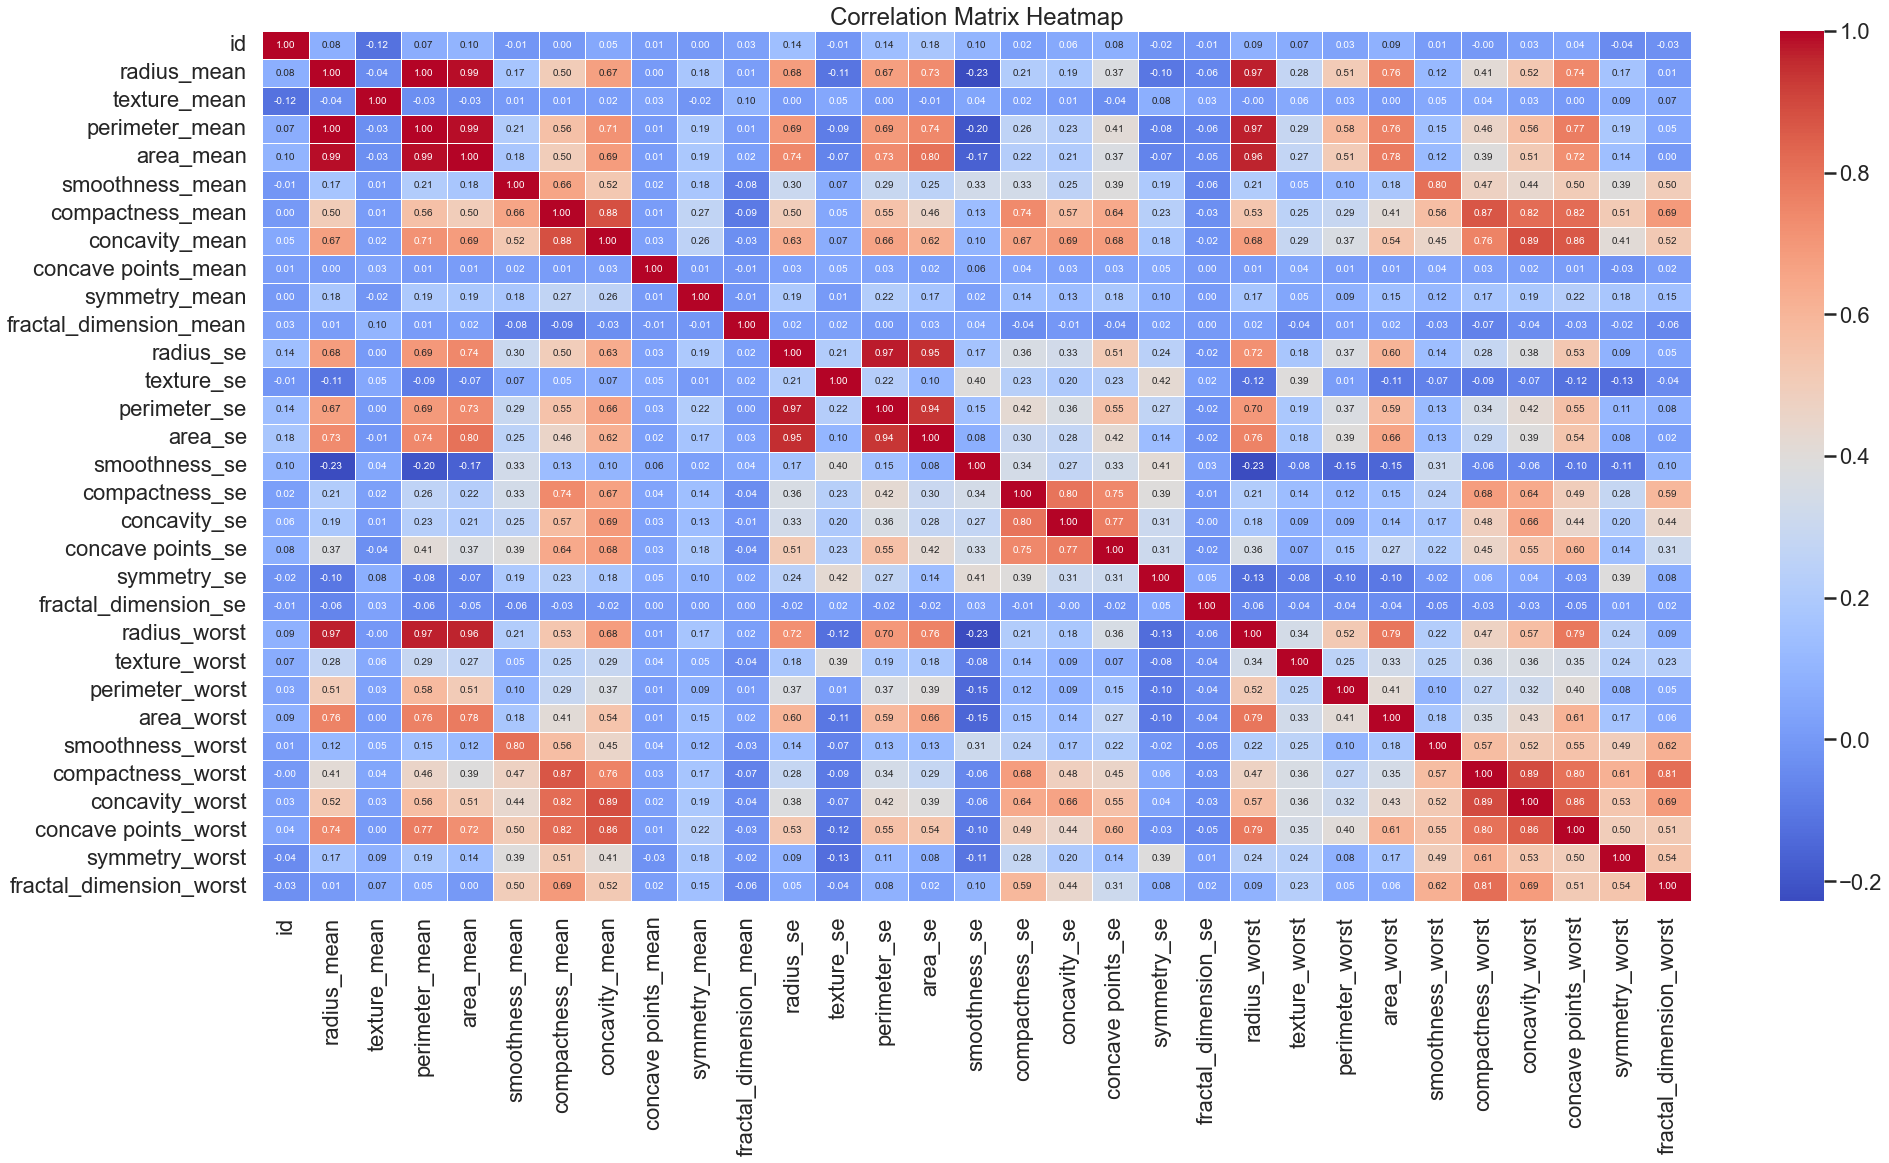

In [13]:
# Create a heatmap to visualize correlation matrix
plt.figure(figsize=(32, 16))
sns.heatmap(df.corr(), cmap="coolwarm", annot=True, fmt=".2f", linewidths=0.5)
plt.title("Correlation Matrix Heatmap")
plt.show();

In [14]:
# Define function to find columns with correlation coefficient >= 0.7 for linear regression
def find_high_correlation(df, column, threshold):
    """
    Find columns with correlation coefficient greater than or equal to the threshold for linear regression.

    Parameters:
    - df: DataFrame containing the data
    - column: Name of the target column to find correlations for
    - threshold: Threshold value for correlation coefficient

    Returns:
    - high_corr_columns: List of column names with correlation coefficient >= threshold
    - corr_coefficients: List of corresponding correlation coefficients
    """
    # Calculate correlation matrix
    corr_matrix = df.corr()

    # Find columns with correlation coefficient higher than the threshold but less than 1.0
    high_corr_columns = corr_matrix[column][(abs(corr_matrix[column]) >= threshold) 
                                            & (abs(corr_matrix[column]) < 1.0)]
    
     # Extract column names and corresponding correlation coefficients
    high_corr_columns = high_corr_columns.index.tolist()
    corr_coefficients = corr_matrix.loc[high_corr_columns, column].tolist()

    return high_corr_columns, corr_coefficients

In [15]:
# Find columns and their correlation coefficient that meet the threshold
columns = df.columns.tolist()[2:] # Get list of columns

# Iterate through each column and find columns with correlation coefficient meeting the threshold
for column in columns:
    result_columns, result_coefficients = find_high_correlation(df, column, threshold=0.70)
    
     # Check if there are correlated columns and find the index of the maximum coefficient
    if result_columns:
        max_index = result_coefficients.index(max(result_coefficients))
        
        # Print only the highest correlated column and coefficient
        max_col = result_columns[max_index]
        max_coeff = result_coefficients[max_index]
        print(f" '{column}' & '{max_col}' = {max_coeff:.3f}")
    else:
        print(f" '{column}' has no correlation above the threshold.")

 'radius_mean' & 'perimeter_mean' = 0.998
 'texture_mean' has no correlation above the threshold.
 'perimeter_mean' & 'radius_mean' = 0.998
 'area_mean' & 'radius_mean' = 0.987
 'smoothness_mean' & 'smoothness_worst' = 0.804
 'compactness_mean' & 'concavity_mean' = 0.883
 'concavity_mean' & 'concavity_worst' = 0.885
 'concave points_mean' has no correlation above the threshold.
 'symmetry_mean' has no correlation above the threshold.
 'fractal_dimension_mean' has no correlation above the threshold.
 'radius_se' & 'perimeter_se' = 0.973
 'texture_se' has no correlation above the threshold.
 'perimeter_se' & 'radius_se' = 0.973
 'area_se' & 'radius_se' = 0.951
 'smoothness_se' has no correlation above the threshold.
 'compactness_se' & 'concavity_se' = 0.798
 'concavity_se' & 'compactness_se' = 0.798
 'concave points_se' & 'concavity_se' = 0.772
 'symmetry_se' has no correlation above the threshold.
 'fractal_dimension_se' has no correlation above the threshold.
 'radius_worst' & 'radius

**Note:** For each feature, we have identified the feature with the highest correlation coefficient and its corresponding value. Features without correlation coefficients above the threshold indicate a weak or nonexistent linear relationship with other features, making them unsuitable for inclusion in the linear model. Notably, all features identified with negative values also exhibit no linear relationship with any other features, further highlighting their lack of influence in the linear model.

In [16]:
# Use list comprehension to store correlation results in a nested list
corr_results = [
    [column, result_columns[result_coefficients.index(max(result_coefficients))]]
    for column, result_columns, result_coefficients in [(col, *find_high_correlation(df, col, threshold=0.70)) 
                                                        for col in columns]
    if result_coefficients  # Exclude columns with no correlation coefficients above the threshold
]

**Note:** In the correlation results list, each feature pair represents a relationship utilized in our linear model prediction. Here, the first feature serves as the predicted value, while the second feature acts as the predictor value.

In [17]:
# Print correlation results
print(corr_results)

[['radius_mean', 'perimeter_mean'], ['perimeter_mean', 'radius_mean'], ['area_mean', 'radius_mean'], ['smoothness_mean', 'smoothness_worst'], ['compactness_mean', 'concavity_mean'], ['concavity_mean', 'concavity_worst'], ['radius_se', 'perimeter_se'], ['perimeter_se', 'radius_se'], ['area_se', 'radius_se'], ['compactness_se', 'concavity_se'], ['concavity_se', 'compactness_se'], ['concave points_se', 'concavity_se'], ['radius_worst', 'radius_mean'], ['area_worst', 'radius_worst'], ['smoothness_worst', 'smoothness_mean'], ['compactness_worst', 'concavity_worst'], ['concavity_worst', 'compactness_worst'], ['concave points_worst', 'concavity_mean'], ['fractal_dimension_worst', 'compactness_worst']]


<a id='preprocess'></a>
## Pre-Processing

In [18]:
# Make a copy of dataframe before preprocessing
df_lin = df.copy()

In [19]:
# Check for rows where all entries are null values
null_rows = df_lin[df_lin.isnull().all(axis=1)]
null_rows

id diagnosis  radius_mean  texture_mean  perimeter_mean  area_mean  \
243 NaN       NaN          NaN           NaN             NaN        NaN   
244 NaN       NaN          NaN           NaN             NaN        NaN   
251 NaN       NaN          NaN           NaN             NaN        NaN   

     smoothness_mean  compactness_mean  concavity_mean  concave points_mean  \
243              NaN               NaN             NaN                  NaN   
244              NaN               NaN             NaN                  NaN   
251              NaN               NaN             NaN                  NaN   

     symmetry_mean  fractal_dimension_mean  radius_se  texture_se  \
243            NaN                     NaN        NaN         NaN   
244            NaN                     NaN        NaN         NaN   
251            NaN                     NaN        NaN         NaN   

     perimeter_se  area_se  smoothness_se  compactness_se  concavity_se  \
243           NaN      NaN            NaN             NaN           NaN   
244           NaN      NaN            NaN             NaN           NaN   
251           NaN      NaN            NaN             NaN           NaN   

     concave points_se  symmetry_se  fractal_dimension_se  radius_worst  \
243                NaN          NaN                   NaN           NaN   
244                NaN          NaN                   NaN           NaN   
251                NaN          NaN                   NaN           NaN   

     texture_worst  perimeter_worst  area_worst  smoothness_worst  \
243            NaN              NaN         NaN               NaN   
244            NaN              NaN         NaN               NaN   
251            NaN              NaN         NaN               NaN   

     compactness_worst  concavity_worst  concave points_worst  symmetry_worst  \
243                NaN              NaN                   NaN             NaN   
244                NaN              NaN                   NaN             NaN   
251                NaN              NaN                   NaN             NaN   

     fractal_dimension_worst  
243                      NaN  
244                      NaN  
251                      NaN

In preparation for our linear model, we will drop these rows from the dataset as each row contains empty values across all columns.

In [20]:
# Drop irrelevant column
df_lin.drop(['id'], axis=1, inplace=True)

In [21]:
# Drop rows where all values are null
df_lin = df_lin.drop(null_rows.index)

In [22]:
# Check for columns with non-null values in dataset
df_lin.columns[df_lin.isnull().sum() == 0]

Index(['diagnosis', 'smoothness_mean', 'symmetry_mean', 'perimeter_se',
       'concavity_worst'],
      dtype='object')

After removing the empty rows, we will proceed to eliminate features that no longer contain any null values from the list of feature pairs to be predicted by our linear model.

In [23]:
# Using pop method to remove the non-null columns
corr_results.pop(3)
corr_results.pop(6)
corr_results.pop(14)

['concavity_worst', 'compactness_worst']

Next, we will fit a linear model to predict and fill the missing values in the selected features, under the assumptions of linearity, independence of data, normality, and non-homogeneity of errors.

In [24]:
# Define linear model function to fill missing values
def fill_nan_with_linear_model(data, y_column, x_column):
    """
    Fill missing values in the specified column using a linear regression model.

    Parameters:
    - data: DataFrame containing the data
    - y_column: Name of the target column with missing values to be filled
    - x_column: Name of the predictor column used for linear regression

    Returns:
    - data: Updated DataFrame with missing values filled
    - y_train: Target column values from training data
    - y_pred: Predicted values for missing values
    """    
    # Separate missing value rows
    test = data[data[y_column].isna()]
    train = data.dropna(subset=[y_column, x_column])

    # Prepare data
    y_train = train[y_column]
    X_train = train[[x_column]]
    X_test = test[[x_column]]

    # Instantiate and fit the linear regression model
    model = LinearRegression()
    model.fit(X_train, y_train)
    
    y_pred = model.predict(X_test) # Make predictions

    # Fill missing values in the original dataset
    df_lin.loc[data[y_column].isna(), y_column] = y_pred
    
    return data, y_train, y_pred

**Note:** Since ground truth values for the missing data are unavailable, we will assess the summary statistics of the observed values and imputed values to evaluate the performance of the linear model.

In [25]:
# Iterate through column pairs to make predictions to fill missing values
for cols in corr_results:
    print(f"Processing features: {cols}")
    df_col = df_lin[cols] # Create temporary dataframe containing only the predicted and predictor columns
    y_col = cols[0]
    x_col = cols[1]
    
    # Replace missing values with predicted values in original dataframe
    imputed_df, y_train_vals, y_imputed_vals = fill_nan_with_linear_model(df_col, y_col, x_col)
    
    # Calculate summary stats for evaluation
    mean_observed = y_train_vals.mean()
    std_observed = y_train_vals.std()
    print(f"Observed Mean: {mean_observed:.3f} || Observed Standard Deviation: {std_observed:.3f}")
    mean_imputed = y_imputed_vals.mean()
    std_imputed = y_imputed_vals.std()
    print(f"Imputted Mean: {mean_imputed:.3f} || Imputted Standard Deviation: {std_imputed:.3f}")
    
    print(f"Nulls: {df_col[y_col].isnull().sum()}")
    print(f"=========")

Processing features: ['radius_mean', 'perimeter_mean']
Observed Mean: 14.108 || Observed Standard Deviation: 3.518
Imputted Mean: 18.946 || Imputted Standard Deviation: 4.877
Nulls: 2
Processing features: ['perimeter_mean', 'radius_mean']
Observed Mean: 91.949 || Observed Standard Deviation: 24.358
Imputted Mean: 71.838 || Imputted Standard Deviation: 0.000
Nulls: 1
Processing features: ['area_mean', 'radius_mean']
Observed Mean: 654.942 || Observed Standard Deviation: 352.556
Imputted Mean: 465.851 || Imputted Standard Deviation: 274.050
Nulls: 2
Processing features: ['compactness_mean', 'concavity_mean']
Observed Mean: 0.104 || Observed Standard Deviation: 0.053
Imputted Mean: 0.074 || Imputted Standard Deviation: 0.000
Nulls: 1
Processing features: ['concavity_mean', 'concavity_worst']
Observed Mean: 0.089 || Observed Standard Deviation: 0.080
Imputted Mean: 0.100 || Imputted Standard Deviation: 0.000
Nulls: 1
Processing features: ['radius_se', 'perimeter_se']
Observed Mean: 0.406 |

The performance of the imputation method seems to vary across different pairs of features, as some show better consistency between observed and imputed statistics than others. In general, the imputed means closely match the observed means, suggesting that the linear imputation method does not introduce significant bias. Additionally, given that the imputed statistics represent an extremely low number of null values (in some cases, just $1$), the linear model demonstrates reasonable performance.

In [26]:
# Check for columns still containing null values
df_lin.columns[df_lin.isnull().sum() > 0]

Index(['texture_mean', 'concave points_mean', 'fractal_dimension_mean',
       'texture_se', 'smoothness_se', 'symmetry_se', 'fractal_dimension_se',
       'texture_worst', 'perimeter_worst', 'symmetry_worst'],
      dtype='object')

**Note:** Given that these features exhibit weak linearity with other features, alternative methods will be employed to fill the missing values. Initially, we will replace the negative values in the previously identified features with null values.

In [27]:
# Replace negative values with null values
for col in df_lin.columns[1:]:
    df_lin.loc[df_lin[col] < 0, col] = np.nan

In [28]:
# Check to confirm no negative value
print((df_lin['texture_mean'] <0).any())
print((df_lin['concave points_mean'] <0).any())
print((df_lin['fractal_dimension_mean'] <0).any())

False
False
False


In [29]:
# Get list of columns containing null values
non_corr_cols = df_lin.columns[df_lin.isnull().sum() > 0].tolist()
print(non_corr_cols)

['texture_mean', 'concave points_mean', 'fractal_dimension_mean', 'texture_se', 'smoothness_se', 'symmetry_se', 'fractal_dimension_se', 'texture_worst', 'perimeter_worst', 'symmetry_worst']


**Note:** For the remaining features with missing values, we will employ different imputation strategies based on the extent of missingness. Features with a significant amount of missing values will be filled using spline interpolation, a method known for its effectiveness in handling large missing data with complex and non-linear patterns. Conversely, features with fewer missing values will be imputed using the mean. Also, since we only want positive values, we will clip any negative value resulting from our imputation to a minimum positive number.

In [30]:
# Define function to fill missing values using mean and spline interpolation
def fill_missing_values(df, columns, spline_order):
    """
    Fill missing values in the DataFrame using spline interpolation for columns with significant missing data,
    and mean imputation for columns with fewer missing data.

    Parameters:
    - df: DataFrame containing the data
    - columns: List of columns with missing values to be filled
    - spline_order: Order of spline interpolation

    Returns:
    - None
    """
    for col in columns:
        null_vals = df[col].isnull().sum() if col in df.columns[1:] else 0 # Check the number of null values in each column.

        if null_vals < 10: # Check for columns with null values < 10
            df[col].fillna(df[col].mean(), inplace=True) # Fill missing values with the mean of the column
            print(f"Filling {null_vals} null values in {col} with mean")
        else:
            inds = df[df[col].isnull()].index  # Get indices of missing values
            
            # Fill missing values using spline interpolation
            s_interpolation = df[col].interpolate(method='spline', order=spline_order, inplace=False).loc[inds]
            df.loc[inds, col] = s_interpolation
            print(f"Filling {null_vals} null values in {col} with spline interpolation")
            
            neg_vals = (df[col] < 0).sum() # Get number of negative values
            df[col] = df[col].clip(lower=1.0) # Clip negative values to a minimum of 1

            if neg_vals:
                print(f"{neg_vals} negative values clipped")
            
    return None

In [31]:
# Call function to implement spline interpolation with an order of 3
fill_missing_values(df_lin, non_corr_cols, 3)

Filling 148 null values in texture_mean with spline interpolation
15 negative values clipped
Filling 7 null values in concave points_mean with mean
Filling 9 null values in fractal_dimension_mean with mean
Filling 5 null values in texture_se with mean
Filling 3 null values in smoothness_se with mean
Filling 5 null values in symmetry_se with mean
Filling 4 null values in fractal_dimension_se with mean
Filling 18 null values in texture_worst with spline interpolation
Filling 3 null values in perimeter_worst with mean
Filling 1 null values in symmetry_worst with mean


In [32]:
# Confirm no null values
df_lin.isna().any().sum()

0

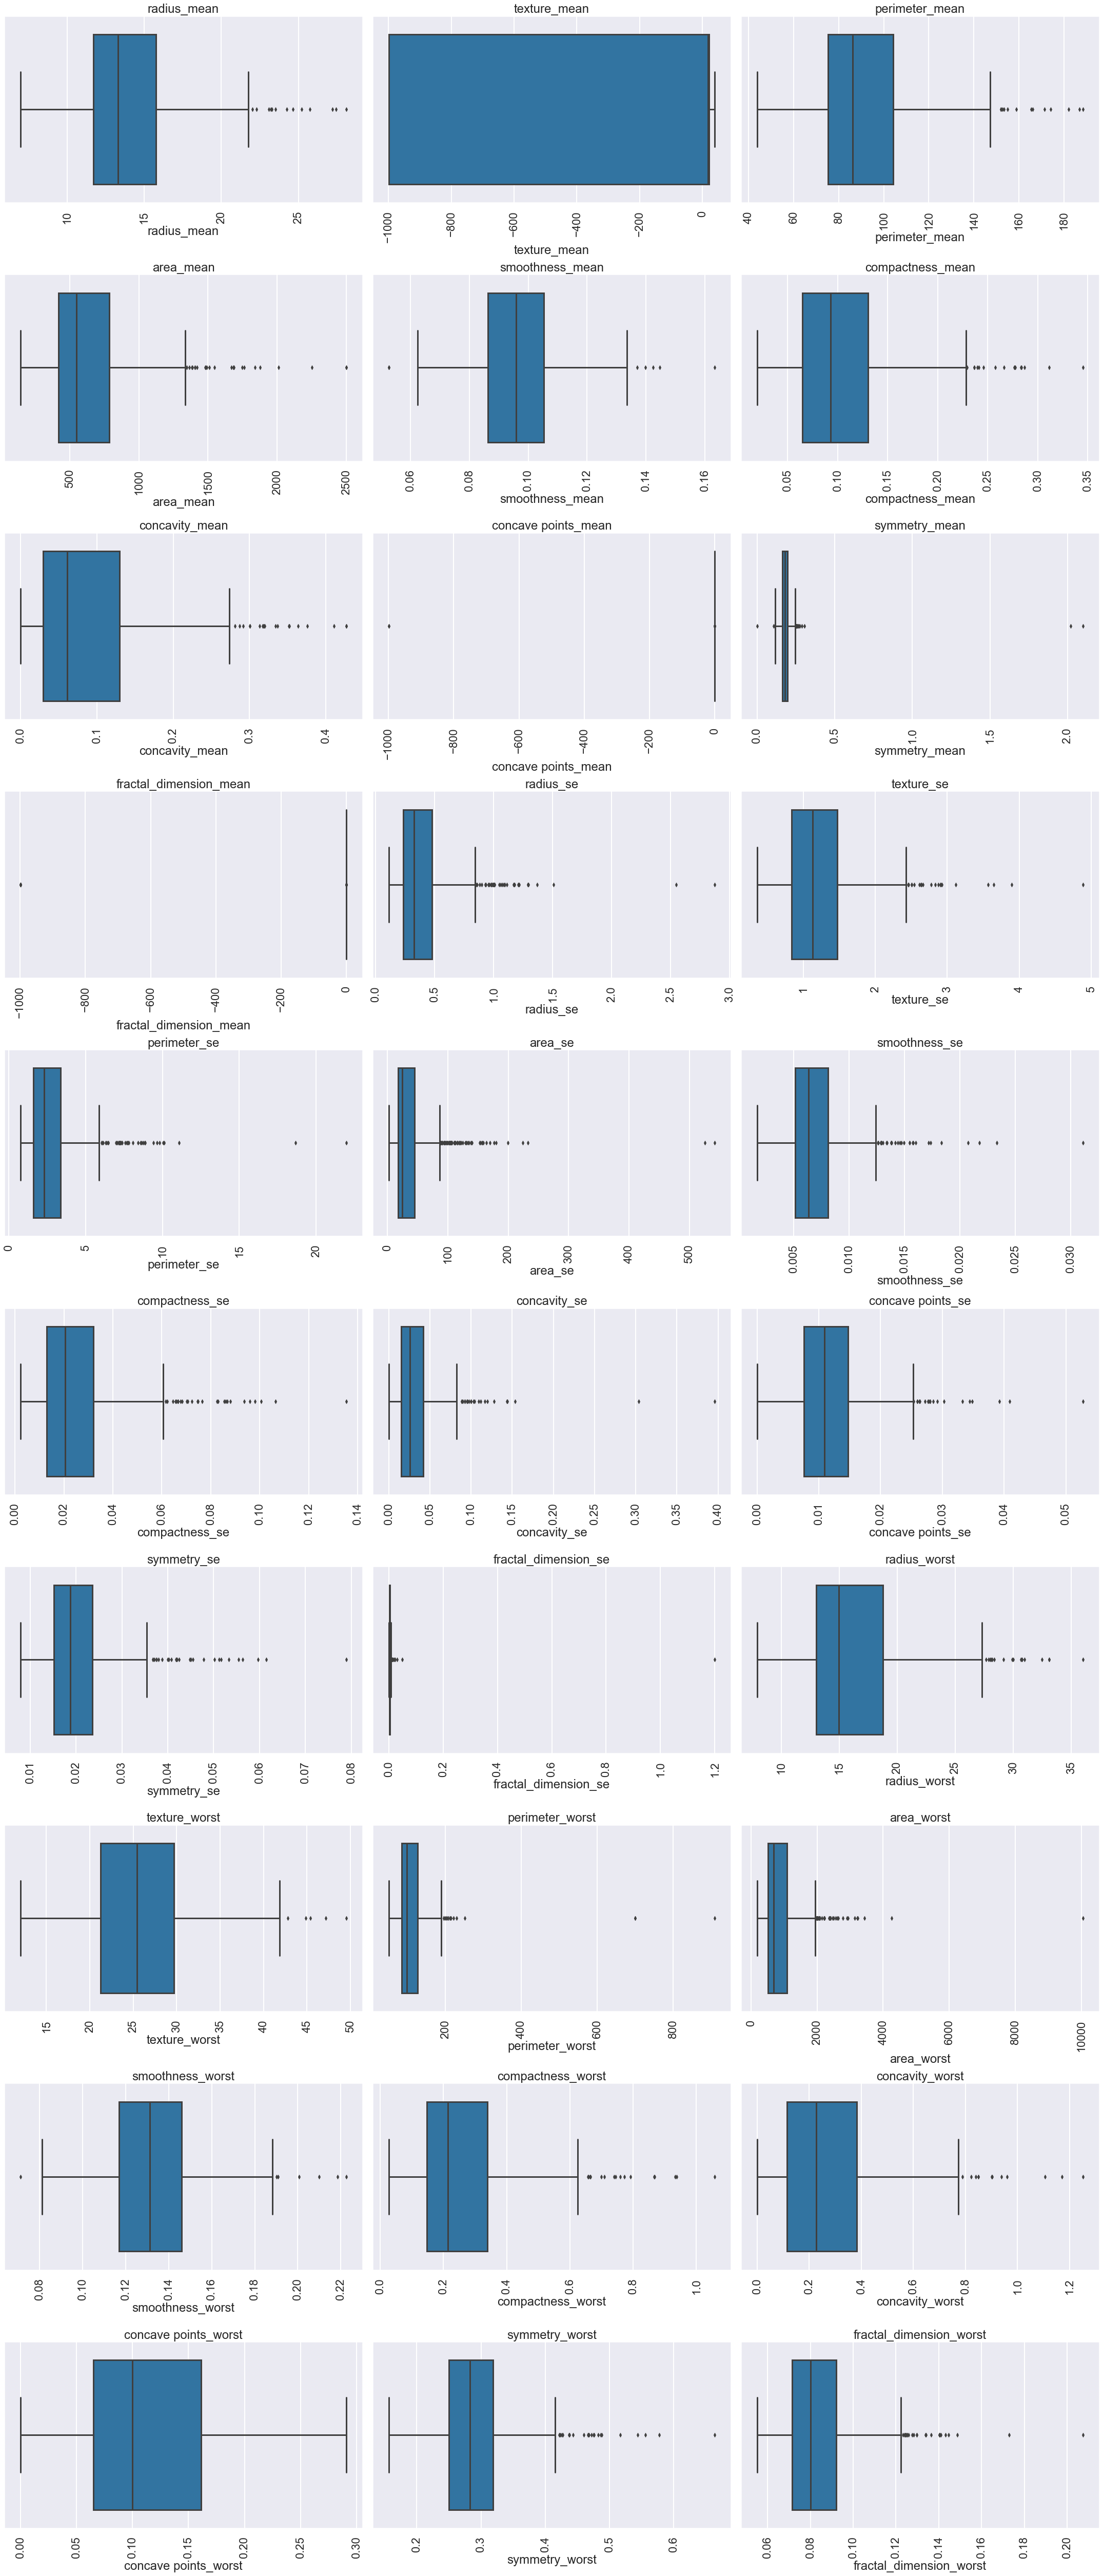

In [33]:
# Preview Boxplots for outliers
plot_boxplots(df_lin.columns[1:], 10, 3, (30, 70))

**Note:** Upon examining the boxplots of the dataset with resolved missing values, it is apparent that a number of outliers are present. Given that the observations are derived from medical data, many of these outliers may represent valid indicators of severe medical conditions. However, to ensure the robustness of our model predictions, we will identify and drop extreme outliers that have the potential to negatively impact the accuracy of our models.

In [34]:
# Calculate the 1st and 99th percentiles for each column to filter extreme outliers
data = df_lin
lower_bounds = data.quantile(0.01)
upper_bounds = data.quantile(0.99)

# Initialize an empty DataFrame to store outliers
outliers = pd.DataFrame()

# Iterate through columns and filter outliers
for col in data.columns[1:]:
    outlier = data[(data[col] < lower_bounds[col]) | (data[col] > upper_bounds[col])]
    outliers = pd.concat([outliers, outlier])
print(f"outliers: {outliers.shape[0]}")

outliers: 318


Due to the substantial number of outliers present beyond the 1st and 99th percentiles in our dataset, we will manually define the range for outliers in our features.

In [35]:
# Manually set conditions to filter extreme outliers
outliers_ = df_lin[(df_lin['symmetry_mean'] > 2) | (df_lin['symmetry_mean'] < 0.02) |
                  (df_lin['symmetry_worst'] > 0.5) | (df_lin['fractal_dimension_worst'] > 0.16) |
                  (df_lin['smoothness_worst'] > 0.2) | (df_lin['concavity_worst'] > 0.8) |
                  (df_lin['compactness_worst'] > 0.8) | (df_lin['perimeter_worst'] > 300) |
                  (df_lin['area_worst'] > 4000) | (df_lin['radius_worst'] > 33) |
                  (df_lin['concave points_se'] > 0.03) | (df_lin['symmetry_mean'] > 0.5) |
                  (df_lin['concavity_mean'] > 0.4) | (df_lin['compactness_mean'] > 0.3) |
                  (df_lin['smoothness_mean'] > 0.16) | (df_lin['area_mean'] > 2000) |
                  (df_lin['fractal_dimension_se'] > 0.015) | (df_lin['symmetry_se'] > 0.05) |
                  (df_lin['smoothness_se'] > 0.02) | (df_lin['concavity_se'] > 0.13) |
                  (df_lin['compactness_se'] > 0.12) | (df_lin['area_se'] > 300) |
                  (df_lin['perimeter_se'] > 15) | (df_lin['texture_se'] > 3.5) |
                  (df_lin['radius_se'] > 1.5) | (df_lin['fractal_dimension_mean'] > 0.09)]

# Print outliers dimensions
print(outliers_.shape[0])

49


In [36]:
# Drop outliers
df_lin = df_lin.drop(outliers_.index)

In [37]:
# Check for duplicated rows
df_lin[df_lin.duplicated(keep=False)]

diagnosis  radius_mean  texture_mean  perimeter_mean  area_mean  \
569         B         7.76         24.54           47.92      181.0   
570         B         7.76         24.54           47.92      181.0   

     smoothness_mean  compactness_mean  concavity_mean  concave points_mean  \
569          0.05263           0.04362             0.0                  0.0   
570          0.05263           0.04362             0.0                  0.0   

     symmetry_mean  fractal_dimension_mean  radius_se  texture_se  \
569         0.1587                 0.05884     0.3857       1.428   
570         0.1587                 0.05884     0.3857       1.428   

     perimeter_se  area_se  smoothness_se  compactness_se  concavity_se  \
569         2.548    19.15       0.007189         0.00466           0.0   
570         2.548    19.15       0.007189         0.00466           0.0   

     concave points_se  symmetry_se  fractal_dimension_se  radius_worst  \
569                0.0      0.02676              0.002783         9.456   
570                0.0      0.02676              0.002783         9.456   

     texture_worst  perimeter_worst  area_worst  smoothness_worst  \
569          30.37            59.16       268.6           0.08996   
570          30.37            59.16       268.6           0.08996   

     compactness_worst  concavity_worst  concave points_worst  symmetry_worst  \
569            0.06444              0.0                   0.0          0.2871   
570            0.06444              0.0                   0.0          0.2871   

     fractal_dimension_worst  
569                  0.07039  
570                  0.07039

In [38]:
# Drop duplicate rows
df_lin = df_lin.drop_duplicates()

In [39]:
# Confirm duplicates have been dropped
df_lin[df_lin.duplicated()].sum().any()

False

Since our target feature is a binary categorical variable (_Malignant_ or _Benign_), one-hot encoding is not necessary. We will use label encoding instead.

In [40]:
# Encode 'diagnosis' categories using label encoder
label_encoder = LabelEncoder()
df_lin['diagnosis'] = label_encoder.fit_transform(df_lin['diagnosis'])

In [41]:
# Confirm encoding
print(df_lin['diagnosis'].value_counts())
df_lin.sample(2)

0    336
1    182
Name: diagnosis, dtype: int64


diagnosis  radius_mean  texture_mean  perimeter_mean  area_mean  \
187          0        11.71      17.19000           74.68      420.3   
463          0        11.60      50.70716           73.88      412.7   

     smoothness_mean  compactness_mean  concavity_mean  concave points_mean  \
187          0.09774           0.06141         0.03809              0.03239   
463          0.08508           0.05855         0.03367              0.01777   

     symmetry_mean  fractal_dimension_mean  radius_se  texture_se  \
187         0.1516                 0.06095     0.2451      0.7655   
463         0.1516                 0.05859     0.1816      0.7656   

     perimeter_se  area_se  smoothness_se  compactness_se  concavity_se  \
187         1.742    17.86       0.006905        0.008704       0.01978   
463         1.303    12.89       0.006709        0.017010       0.02080   

     concave points_se  symmetry_se  fractal_dimension_se  radius_worst  \
187           0.011850      0.01897              0.001671         13.01   
463           0.007497      0.02124              0.002768         12.77   

     texture_worst  perimeter_worst  area_worst  smoothness_worst  \
187          21.39            84.42       521.5            0.1323   
463          24.02            82.68       495.1            0.1342   

     compactness_worst  concavity_worst  concave points_worst  symmetry_worst  \
187             0.1040           0.1521               0.10990          0.2572   
463             0.1808           0.1860               0.08288          0.3210   

     fractal_dimension_worst  
187                  0.07097  
463                  0.07863

In [42]:
# Check shape of dataframe
print(f"Our data now contains {df_lin.shape[0]} rows and {df_lin.shape[1]} columns after cleaning.")

Our data now contains 518 rows and 31 columns after cleaning.


<a id='eda'></a>
## Exploratory Data Analysis

Firstly, let us explore the distribution of our `diagnosis` feature.

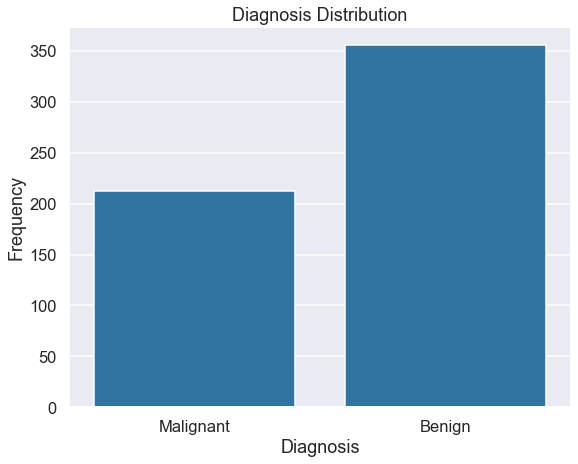

In [43]:
# Bar plot of diagnosis feature
sns.set_context('talk')
plt.figure(figsize=(9,7))
base_color = sns.color_palette()[0]
countplot = sns.countplot(data=df, x='diagnosis', color=base_color)

# Set title and labels
plt.title('Diagnosis Distribution')
plt.xlabel('Diagnosis')
plt.ylabel('Frequency')

# Set x-tick labels
countplot.set_xticklabels(['Malignant', 'Benign'])
plt.show();

In [44]:
# Calculate percentages of diagnosis classes
percentages = df_lin['diagnosis'].value_counts(normalize=True)
percentages = percentages * 100
print(f"Malignant ({round(percentages[1],1)}%) | Benign ({round(percentages[0],1)}%)")

Malignant (35.1%) | Benign (64.9%)


**Observation:** The analysis reveals that our data comprises nearly $30$% more benign diagnoses than malignant ones.

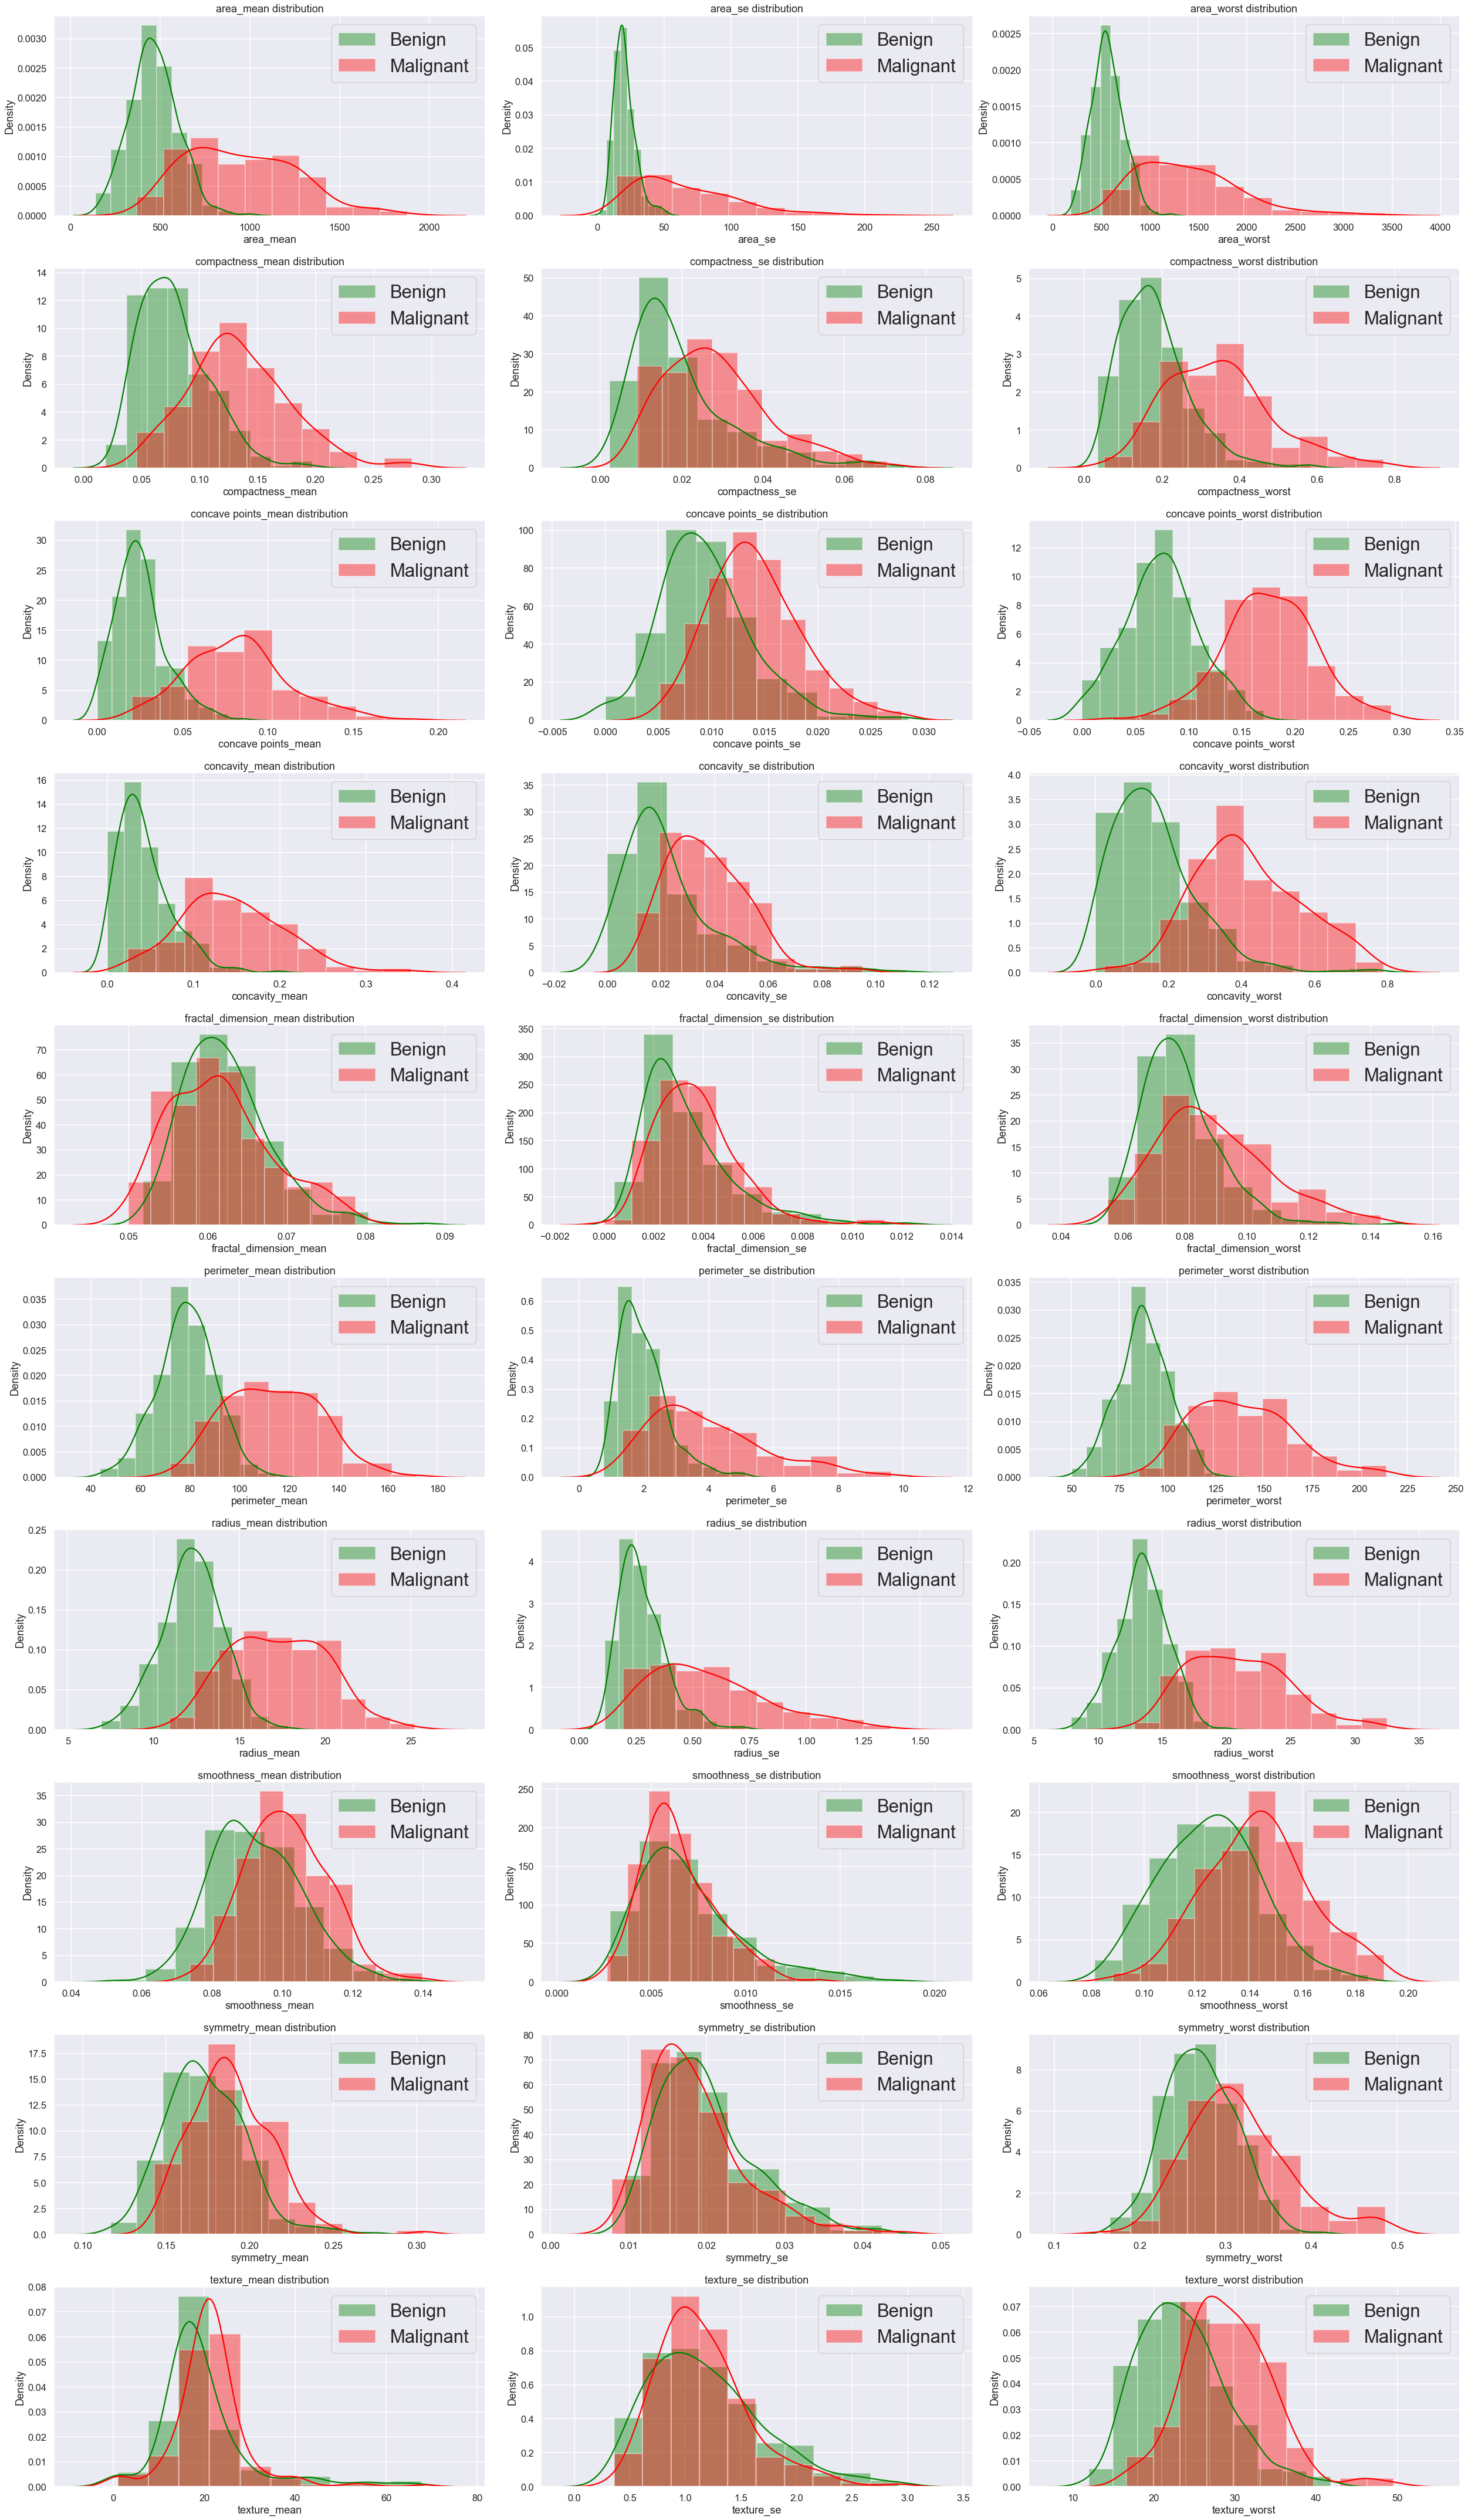

In [45]:
# Plot overlaid histograms of diagnosis classes for all features
features = sorted(df_lin.columns[1:].tolist())

# Create subplots and flatten axes
fig, axes = plt.subplots(10, 3, figsize=(35, 60))
plt.subplots_adjust(wspace=0.2, hspace=1)
axes = axes.flatten()

# Iterate through features and create subplots of histograms for 'Malignant' and 'Benign'
for i, feature in enumerate(features):
    sns.distplot(df_lin[df_lin['diagnosis'] == 0][feature], bins=10, color='green', label='Benign', ax=axes[i])
    sns.distplot(df_lin[df_lin['diagnosis'] == 1][feature], bins=10, color='red', label='Malignant', ax=axes[i])

    axes[i].legend(fontsize='xx-large')
    axes[i].set_title(f'{feature} distribution')

plt.tight_layout()
plt.show();

**Observation:** The overlaid histogram plots above illustrate the distributions of our diagnosis categories ('Benign' and 'Malignant') for each feature in the dataset. Across the distribution plots, it's evident that in most cases, there are more instances of benign cases than malignant ones. However, we observe that features related to `smoothness` show a higher value range for malignant tumors compared to benign ones.

Next, we will examine how the predictor features correlate with our target feature, `diagnosis`.

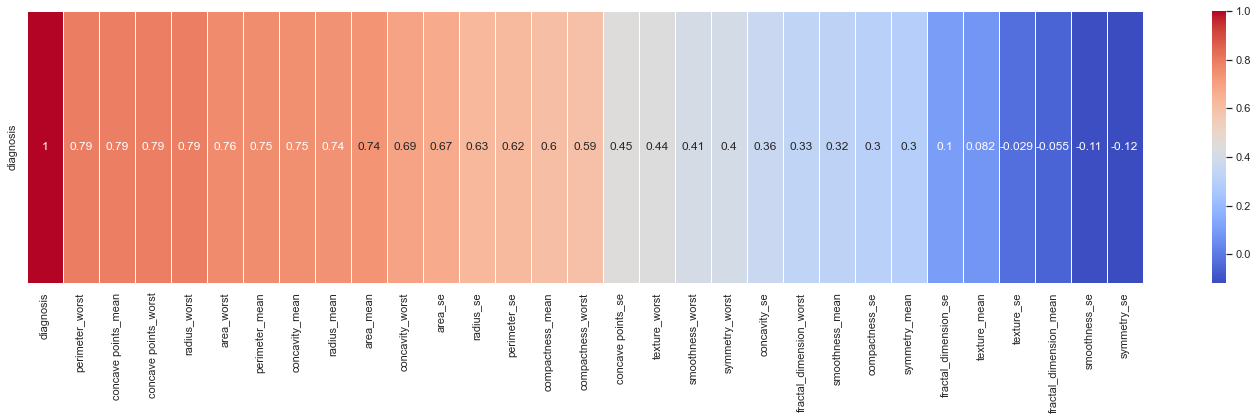

In [46]:
# Compute the correlation matrix
sns.set_context('notebook')
corr_matrix = df_lin.corr()
sorted_corr = corr_matrix[['diagnosis']].sort_values(by='diagnosis', ascending=False) # Sort correlation in descending order

# Create a horizontal heatmap with seaborn
plt.figure(figsize=(25, 5))
sns.heatmap(sorted_corr[['diagnosis']].transpose(), annot=True, linewidth=0.7, cmap='coolwarm')
plt.show();

**Observation:** The heatmap visualizes the correlation strength between each feature and the diagnosis, with a color gradient ranging from orange (indicating strong correlation) to grey (suggesting weak correlation) to blue (representing no correlation). Notably, features such as `perimeter_worst`, `concave points_mean`, `concave points_worst`, and `radius_worst` exhibit the strongest correlation with our target variable. Conversely, features like `texture_worst`, `fractal_dimension_se`, and `symmetry_se` demonstrate weak-to-no correlations.

Next, we will identify and filter out highly correlated features, and store the resulting non-collinear features in a separate dataframe. The selected features will be used to assess our classification and clustering models, and should mitigate multicollinearity issues in our machine learning algorithms.

In [47]:
# Filter collinear features
df_reduced = df_lin.copy() # Create copy of dataframe

# Calculate correlation matrix and filter out highly correlated variables in pairs
corr_matrix = df_reduced.corr()
high_corrs = corr_matrix.where(np.triu(np.ones(corr_matrix.shape), k=1).astype(bool)).abs()
corr_threshold = 0.85 # Set the correlation thresold

i = 1

# Loop until no more highly correlated variables are found
while True:
    max_corr = high_corrs.unstack().sort_values(ascending=False).iloc[0]

    # Determine the two predictors associated with the largest absolute pairwise correlation
    max_corr_pair = high_corrs.unstack().idxmax()
    max_corr_value = high_corrs.unstack().max()
    if max_corr_value > corr_threshold:
        print(f"{i}. {max_corr_pair[0]} | {max_corr_pair[1]} : {max_corr_value}")
        i += 1

        #  Determine the average correlation between correlated pair and the other features
        avg_corr_A = corr_matrix[max_corr_pair[0]].drop(max_corr_pair[0]).abs().mean()
        avg_corr_B = corr_matrix[max_corr_pair[1]].drop(max_corr_pair[1]).abs().mean()

        # Drop feature with larger average correlation
        if avg_corr_A > avg_corr_B:
            df_reduced = df_reduced.drop(max_corr_pair[0], axis=1)
        else:
            df_reduced = df_reduced.drop(max_corr_pair[1], axis=1)
            
        # Update the correlation matrix and filter out highly correlated variables
        corr_matrix = df_reduced.corr()
        high_corrs = corr_matrix.where(np.triu(np.ones(corr_matrix.shape), k=1).astype(bool)).abs()
    else:
        break

print(df_reduced.shape)
df_reduced.sample(2)

1. perimeter_mean | radius_mean : 0.9983544032344216
2. perimeter_worst | radius_worst : 0.993116041035707
3. area_mean | radius_mean : 0.9909723341023727
4. area_worst | radius_worst : 0.9858897064286847
5. perimeter_se | radius_se : 0.9733384458289882
6. area_worst | area_mean : 0.9577256463217929
7. area_se | radius_se : 0.9549531726177601
8. concave points_mean | concavity_mean : 0.9305272083603701
9. concave points_worst | concave points_mean : 0.9123901147216118
10. concavity_worst | compactness_worst : 0.8924119736051596
11. compactness_worst | compactness_mean : 0.8742506473627845
12. concavity_se | compactness_se : 0.8568440748292399
(518, 19)


diagnosis  texture_mean  area_mean  smoothness_mean  concave points_mean  \
189          0         15.90      463.7          0.08080             0.016540   
185          0         15.11      317.5          0.09267             0.002404   

     symmetry_mean  fractal_dimension_mean  radius_se  texture_se  \
189         0.1667                 0.05474     0.2382      0.8355   
185         0.1703                 0.06048     0.4245      1.2680   

     smoothness_se  concavity_se  concave points_se  symmetry_se  \
189       0.005996      0.021170           0.006433      0.02025   
185       0.014390      0.001597           0.002404      0.02538   

     fractal_dimension_se  texture_worst  smoothness_worst  compactness_worst  \
189              0.001725          19.59            0.1096             0.1650   
185              0.003470          21.18            0.1521             0.1019   

     symmetry_worst  fractal_dimension_worst  
189          0.2482                  0.06306  
185          0.2933                  0.07697

**Observation:** Following the collinearity filtering process, the remaining features with the strongest linear relationship with our target feature are `concave points_mean` and `area_mean`. Additionally, `radius_se` exhibits a slightly strong correlation with the target feature, however, only the features with stronger correlations will be extracted for our machine learning analysis.

#### Preprocessing for Machine Learning Analysis
Our next step involves preprocessing the data for machine learning analysis. This includes creating our features, splitting the data into training and test sets, and applying transformations to scale our features.

In [48]:
# Create X and y features
X = df_lin[df_lin.columns[1:]]
y = df_lin['diagnosis']

In [49]:
# Split data into training and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=7)
print(f"X_train:{X_train.shape}, X_test:{X_test.shape}, y_train:{y_train.shape}, y_test:{y_test.shape}")

X_train:(414, 30), X_test:(104, 30), y_train:(414,), y_test:(104,)


In [50]:
# Apply normalization to scale features
scaler = MinMaxScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

MinMaxScaler is utilized to normalize the scale of our data, which is beneficial due to the varying ranges of our features. This normalization is crucial, especially for clustering algorithms like K-Means, which are distance-based and rely on the magnitudes of distances between points.

<a id='unsupervised'></a>
## Unsupervised Machine Learning

Upon completing the preprocessing of our data, we will now leverage unsupervised machine learning algorithms to extract insights from the input data without explicit guidance or labeled responses. The primary objective of our unsupervised learning phase is to uncover latent patterns or inherent structures within the dataset. This involves clustering similar data points together, categorizing them as either benign (class 0) or malignant (class 1), and reducing the dimensionality of the data to assess potential improvements in clustering.

 ### Clustering

To conduct clustering on our data, we will explore the `K-Means Clustering`, `Spectral Clustering`, and `DBSCAN Clustering` algorithms and compare the results of the different techniques.

In [51]:
# Apply k-means clustering
kmeans = KMeans(n_clusters=2, init='k-means++', n_init=10, random_state=42)
label_kmeans = kmeans.fit_predict(X_train_scaled)
centroids = kmeans.cluster_centers_

In [52]:
# Apply spectral clustering
spectral = SpectralClustering(n_clusters=2, affinity='rbf', n_init=10, assign_labels='discretize', random_state=42)
label_spectral = spectral.fit_predict(X_train_scaled)

In [53]:
# Apply DBSCAN clustering
dbscan = DBSCAN(eps=0.5, min_samples=1)
labels_dbs = dbscan.fit_predict(X_train_scaled)

**Note:** In DBSCAN (Density-Based Spatial Clustering of Applications with Noise), unlike traditional clustering algorithms like K-Means, you don't explicitly specify the number of clusters you want. Instead, DBSCAN identifies clusters based on density connectivity, which means it can find clusters of arbitrary shapes and sizes.

In [54]:
# Define function to plot clustering techniques
def plot_clustering(X_data, clusterings, figsize, centroids=None):
    """
    Plot clustering results for different techniques.

    Parameters:
    - X_data: Array-like, shape (n_samples, n_features)
        Input data to be clustered.
    - clusterings: List of arrays
        Cluster labels obtained from different clustering techniques.
    - figsize: Tuple (float, float)
        Figure size.
    - centroids: Array-like, shape (n_clusters, n_features), optional
        Centroids of clusters for KMeans clustering.

    Returns:
        None
    """
    sns.set_context('talk')  
    fig, axes = plt.subplots(len(clusterings), 1, figsize=figsize)
    
    # Loop through each clustering technique and plot
    for i, (labels, title) in enumerate(zip(clusterings, ['K-Means Clustering', 'Spectral Clustering', 'DBSCAN'])):
        ax = axes[i] if len(clusterings) > 1 else axes     
        ax.set_title(title, fontsize=20)       
        if centroids is not None and i == 0:
            colors = ['green' if label == 1 else 'red' for label in labels]
            scatter = ax.scatter(X_data[:, 0], X_data[:, 1], c=colors, cmap='viridis', edgecolor='k', s=70)
            
            # Plot centroids
            ax.scatter(centroids[:, 0], centroids[:, 1], marker='X', s=200, c='yellow', edgecolor='k', label='Centroids')
        else:
            colors = ['green' if label == 1 else 'red' for label in labels]
            scatter = ax.scatter(X_data[:, 0], X_data[:, 1], c=colors, cmap='viridis', edgecolor='k', s=70)          
        ax.set_facecolor('lightgray')
        ax.grid(False)
        
        red = mpatches.Patch(color='red', label='Malignant')
        green = mpatches.Patch(color='green', label='Benign')
        ax.legend(handles=[green, red])
    plt.tight_layout()
    plt.show();

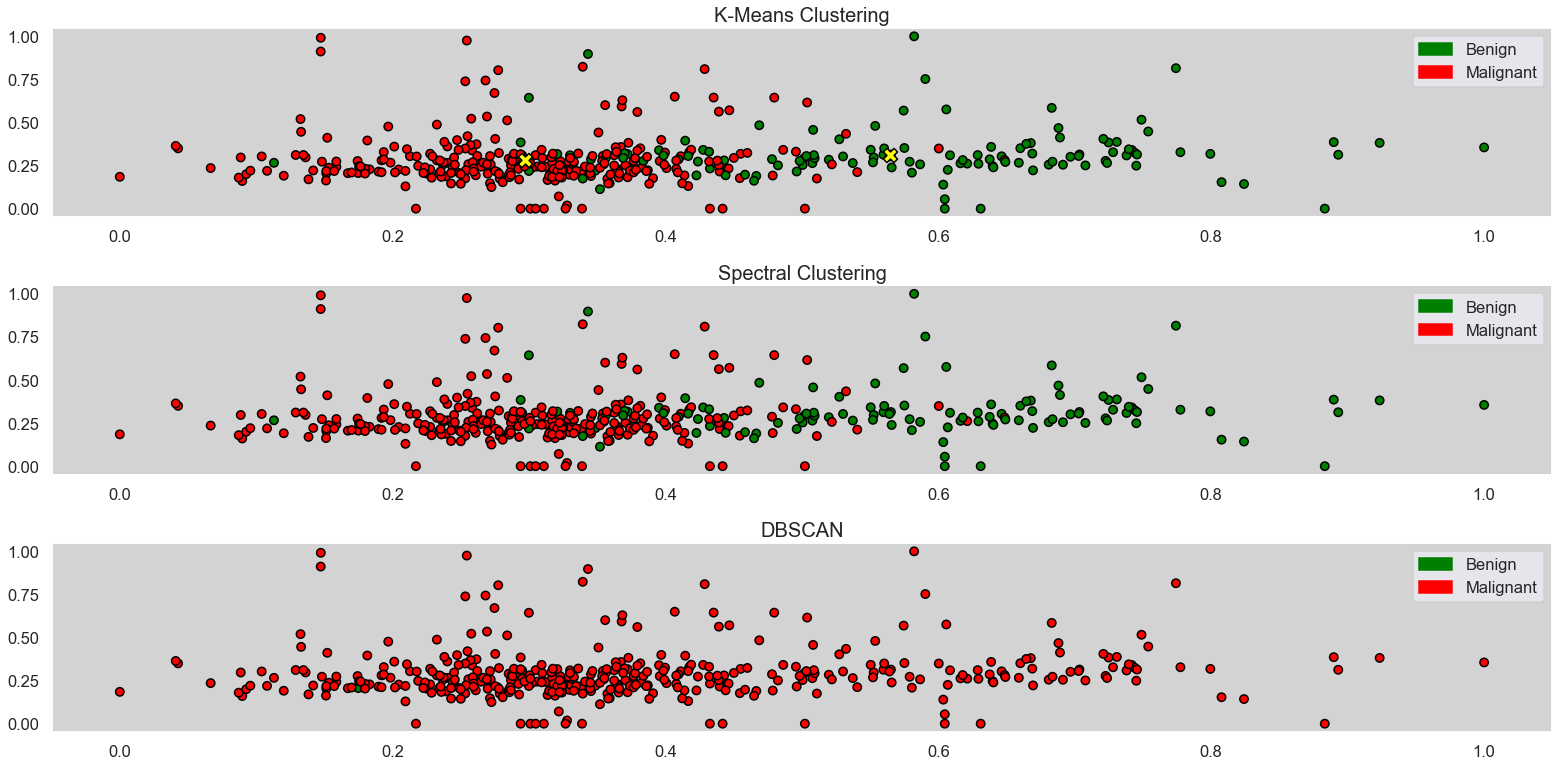

In [55]:
# Plot all clustering techniques
y_data = [label_kmeans, label_spectral, labels_dbs]
plot_clustering(X_train_scaled, y_data , (22, 11), centroids=centroids)

**Observation:** Upon examining the results, we note that the K-Means clustering technique exhibits a slightly better degree of separation between clusters compared to Spectral clustering. However, the DBSCAN clustering technique shows no discernible degree of separation between clusters. It is important to mention that we utilized the `fit_predict()` method in implementing the K-Means algorithm to facilitate comparison of clustering results with other algorithms using the training data.

### Dimensionality Reduction

We will now utilize dimensionality reduction techniques to see if they generally improve our clustering results. The techniques to be explored include __Principal Component Analysis__ _(PCA)_, **Kernel PCA** _(kPCA)_, __t-Distributed Stochastic Neighbour Embedding__ _(t-SNE)_, and __Supervised UMAP__ _(Uniform Manifold Approximation and Projection)_

The PCA dimensionality reduction technique aims to transform the data into a new coordinate system where the variance of the data is maximized along the principal components, while Kernel PCA allows for non-linear dimensionality reduction by applying a kernel trick.

In [56]:
# Apply PCA
pca = PCA(n_components=2, random_state=42)
X_train_PCA = pca.fit_transform(X_train_scaled)
X_test_PCA = pca.transform(X_test_scaled)

In [57]:
# Apply Kernel PCA
kpca_model = KernelPCA(n_components=2, gamma=0.5, kernel='rbf', random_state=42)
X_train_KPCA = kpca_model.fit_transform(X_train_scaled)
X_test_KPCA = kpca_model.transform(X_test_scaled)

The t-SNE algorithm maps high-dimensional data into a lower-dimensional space, by preserving pairwise similarities between data points, however it isn't capable of learning a transformation function. It directly optimizes the positions of the lower-dimensional points, therefore the `transform()` method does not apply to t-SNE and cannot be used on test data.

In [58]:
# Apply t-SNE
tsne = TSNE(n_components=2, perplexity=45, random_state=42)
X_train_tsne = tsne.fit_transform(X_train_scaled)

UMAP, or Uniform Manifold Approximation and Projection, is a dimensionality reduction technique used for visualizing high-dimensional data in a lower-dimensional space, and is particularly efficient in capturing both global and local structures in data.

In [59]:
# Apply supervised UMAP
UMAP_model = umap.UMAP(n_neighbors=5, min_dist=0.3, n_components=2, n_epochs=500, random_state=33)
X_train_UMAP = UMAP_model.fit_transform(X_train_scaled, y=y_train)
X_test_UMAP = UMAP_model.transform(X_test_scaled)

UMAP_features = [f'Feature_{i+1}' for i in range(UMAP_model.embedding_.shape[1])] # Get labels for features

In [60]:
# Define function to visualize dimensionality reduction techniques
def plot_dimensionality_reduction(X_data, y_data, techniques, row, col, figsize):
    """
    Plot data after dimensionality reduction using various techniques.

    Parameters:
    - X_data: List of arrays
        List of feature vectors after dimensionality reduction.
    - y_data: Array-like, shape (n_samples,)
        Target labels.
    - techniques: List of str
        List of dimensionality reduction techniques.
    - row: int
        Number of rows for subplots.
    - col: int
        Number of columns for subplots.
    - figsize: Tuple (float, float)
        Figure size.

    Returns:
        None
    """    
    sns.set_context('talk')    
    fig, axes = plt.subplots(nrows=row, ncols=col, figsize=figsize)
    fig.suptitle('Dimensionality Reduction Techniques', fontsize=20)

    # Loop over each subplot and plot the data for the current technique
    for ax, (X_, technique) in zip(axes.flatten(), zip(X_data, techniques)):
        colors = ['green' if label == 1 else 'red' for label in y_data]
        scatter = ax.scatter(X_[:, 0], X_[:, 1], c=colors, cmap='viridis', edgecolor='k', s=70)
        ax.set_title(technique)
        ax.set_facecolor('lightgray')
        ax.grid(False)
        
    red = mpatches.Patch(color='red', label='Malignant')
    green = mpatches.Patch(color='green', label='Benign')
    fig.legend(handles=[red, green])
    plt.tight_layout()
    plt.show();

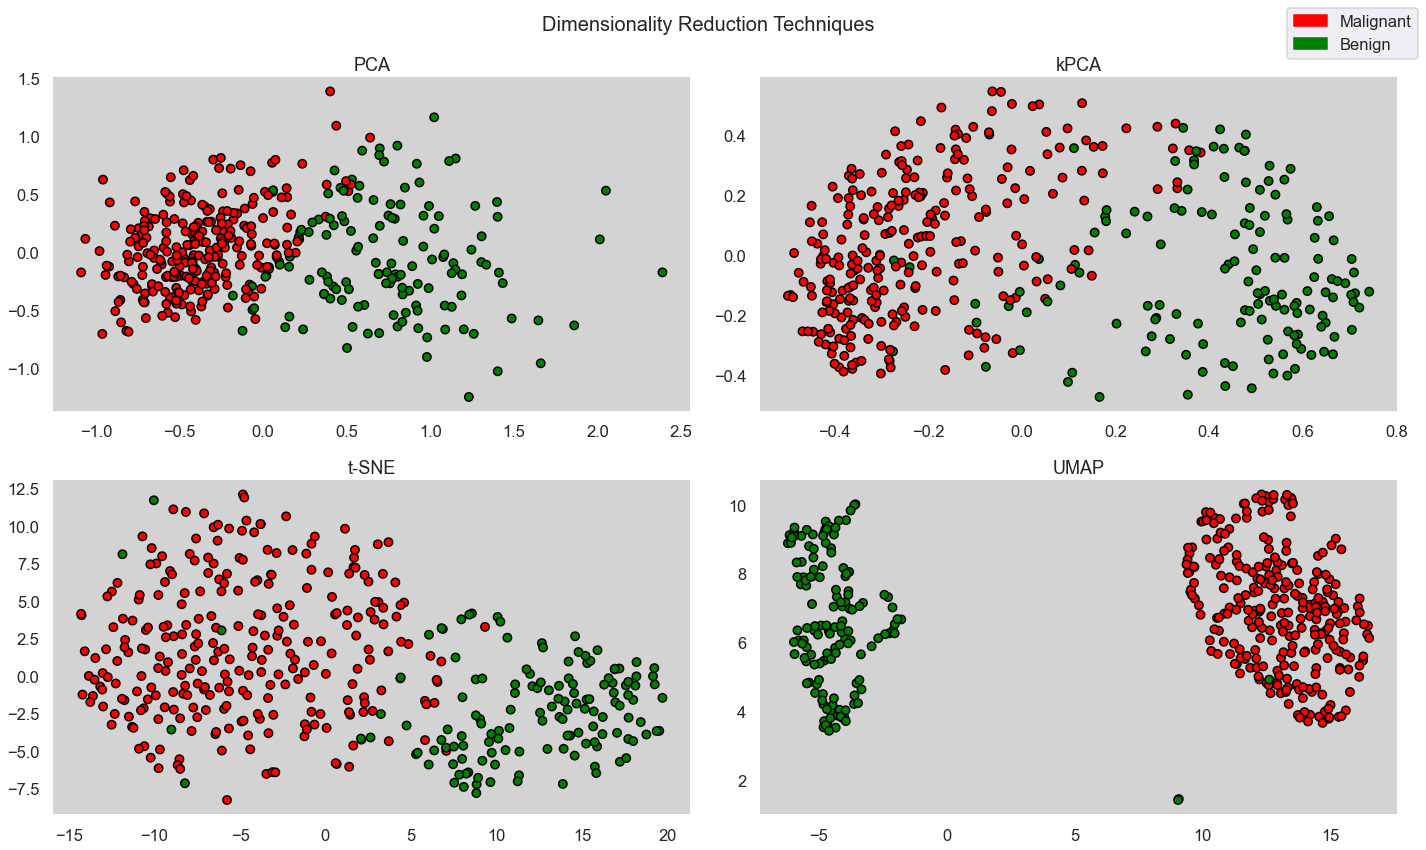

In [61]:
# Implement visualization function on training data
X_data = [X_train_PCA, X_train_KPCA, X_train_tsne, X_train_UMAP]
techniques = ['PCA', 'kPCA', 't-SNE', 'UMAP']
plot_dimensionality_reduction(X_data, y_train, techniques, 2, 2, (20, 12))

**Observation:** From the plots, it appears that with two components, PCA and kPCA exhibit slightly less cluster overlap compared to t-SNE. However, UMAP demonstrates a distinct separation with no overlapping between the clusters. We will now utilize PCA to project down the dimensions of our features while retaining at least $95$% of the variance. 

The PCA-reduced components, supervised UMAP features, and our manually reduced features will be employed in our K-Means clustering algorithm to assess potential improvements in clustering performance.

In [62]:
# Apply PCA with 95% variance retained
pca = PCA(n_components=0.95, random_state=33) # Select number of components that explain 95% of the variance
X_train_PCA = pca.fit_transform(X_train_scaled)
X_test_PCA = pca.transform(X_test_scaled)

In [63]:
print(f"explained variance:{pca.explained_variance_ratio_.sum()*100}, components:{X_train_PCA.shape[1]}")

explained variance:95.81477341509837, components:11


In [64]:
# Print top features in each principal component
pca_features = []

for i in range(11):
        component_loadings = pca.components_[i]
        feature_indices = component_loadings.argsort()[-1:][::-1]
        top_features = list(X_train.columns[feature_indices])
        pca_features.extend(top_features)
        print(f"Principal Component {i + 1}: {', '.join(top_features)}")

Principal Component 1: concave points_worst
Principal Component 2: fractal_dimension_mean
Principal Component 3: texture_se
Principal Component 4: compactness_se
Principal Component 5: texture_worst
Principal Component 6: symmetry_worst
Principal Component 7: fractal_dimension_worst
Principal Component 8: texture_mean
Principal Component 9: symmetry_mean
Principal Component 10: symmetry_se
Principal Component 11: symmetry_mean


The PCA analysis reveals that a minimum of eleven components is required to retain 95% variance. Next, we will apply the K-Means algorithm to the training set to identify clusters. Subsequently, we will utilize the trained model to assign clusters to the samples in the test set and evaluate the performance of the clustering algorithm.

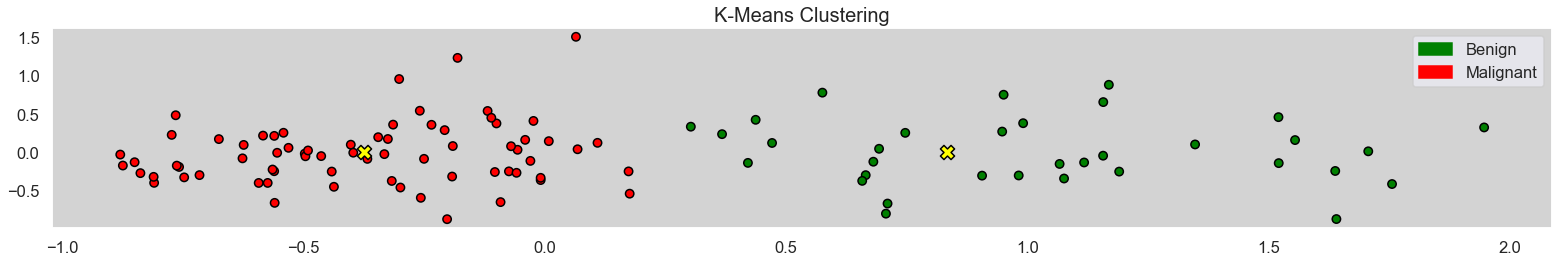

In [65]:
# Apply k-means clustering on test features after PCA
kmeans_PCA = KMeans(n_clusters=2, init='k-means++', n_init=10, random_state=42)
kmeans_PCA.fit(X_train_PCA)
label_PCA_pred = kmeans_PCA.predict(X_test_PCA)
centroids = kmeans_PCA.cluster_centers_

# plot k-means clustering on test data
y_data = [label_PCA_pred]
plot_clustering(X_test_PCA, y_data, (22, 4), centroids=centroids)

The scatterplot from the K-Means clustering after PCA suggests a moderate level of separation between the clusters. Next, we will implement the K-Means clustering using the UMAP dimensionality reduction technique

In [66]:
# Evaluate clustering performance after PCA
silhouette_pca = silhouette_score(X_test_PCA, label_PCA_pred)
inertia_pca = kmeans_PCA.inertia_

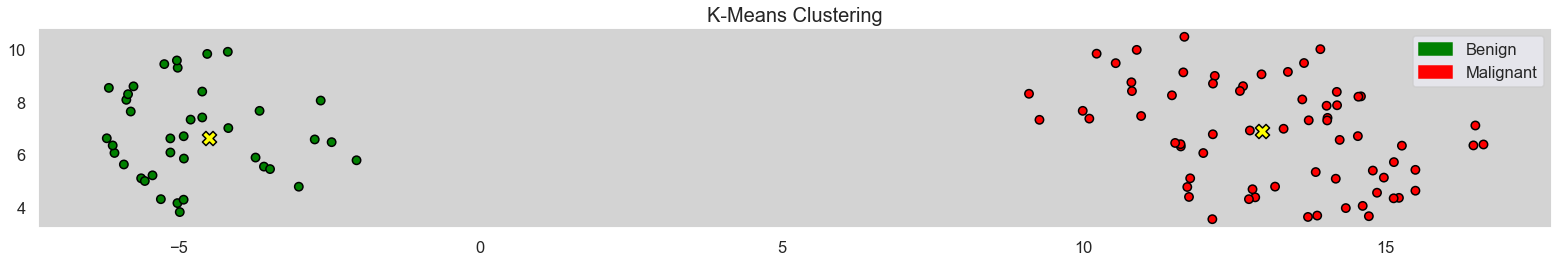

In [67]:
# Apply k-means clustering on test features after supervised UMAP
kmeans_UMAP = KMeans(n_clusters=2, init='k-means++', n_init=10, random_state=42)
kmeans_UMAP.fit(X_train_UMAP)
label_UMAP_pred = kmeans_UMAP.predict(X_test_UMAP)
centroids = kmeans_UMAP.cluster_centers_

# plot k-means clustering on test data
y_data = [label_UMAP_pred]
plot_clustering(X_test_UMAP, y_data , (22, 4), centroids=centroids)

The scatterplot from the K-Means clustering after supervised UMAP suggests a reasonable and distinct cluster separation. Next, we will compare the results obtained with the non-collinear features we had manually identified earlier, to assess if the K-Means clustering will outperform any of the dimensionality reduction techniques employed thus far.

In [68]:
# Evaluate clustering performance after UMAP
silhouette_umap = silhouette_score(X_test_UMAP, label_UMAP_pred)
inertia_umap = kmeans_UMAP.inertia_

In [69]:
# Extract features & apply transformation
ml_cols = ['area_mean', 'concave points_mean',] 
X_train_reduced = X_train[ml_cols]
X_test_reduced = X_test[ml_cols]

X_train_features = scaler.fit_transform(X_train_reduced)
X_test_features = scaler.transform(X_test_reduced)

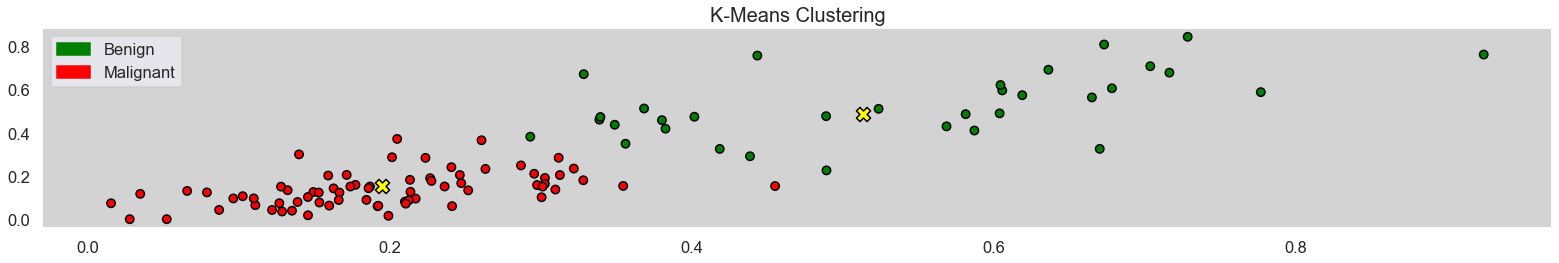

In [70]:
# Apply k-means clustering on test features after manual feature extraction
kmeans_feat = KMeans(n_clusters=2, init='random', n_init=100, random_state=42)
kmeans_feat.fit(X_train_features)
label_feat_pred = kmeans_feat.predict(X_test_features)
centroids = kmeans_feat.cluster_centers_

# plot k-means clustering on test data
y_data = [label_feat_pred]
plot_clustering(X_test_features, y_data , (22, 4), centroids=centroids)

The scatterplot from the K-Means clustering after extraction of non-collinear features suggests a slightly moderate level of separation between the clusters. It is evident that the clustering algorithm underperforms with these features than with the features from the dimensionality reduction models.

In [71]:
# Evaluate clustering performance after feature extraction
silhouette_features = silhouette_score(X_test_features, label_feat_pred)
inertia_features = kmeans_feat.inertia_

In [72]:
# Print silhouette scores and inertia scores
print(f"silhouette score PCA: {silhouette_pca} | inertia score PCA: {inertia_pca}")
print(f"silhouette score UMAP: {silhouette_umap} | inertia score UMAP: {inertia_umap}")
print(f"silhouette score features: {silhouette_features} | inertia score features: {inertia_features}")

silhouette score PCA: 0.3983244063270309 | inertia score PCA: 227.5173000354216
silhouette score UMAP: 0.8292267322540283 | inertia score UMAP: 2333.681396484375
silhouette score features: 0.6232953888292813 | inertia score features: 8.91326343186133


**Evaluation Metrics:** The silhouette score quantifies the similarity of an object to its own cluster compared to other clusters, ranging from -1 to 1. Conversely, the inertia score measures the distances between each data point and its assigned cluster center.

Comparing the results, the higher silhouette score (closer to 1) of the UMAP suggests that the UMAP dimensionality reduction technique produces better-defined clusters with the K-Means clustering algorithm than PCA and extracted features. However, it is noteworthy that with the extracted features, the clustering algorithm exhibited a much better inertia score but a lower silhouette score compared to the UMAP dimensionality reduction technique.

<a id='classifier'></a>
## Machine Learning Classification

Next, we will leverage the features and attributes derived from our pre-processing, exploratory data analysis, and K-Means clustering algorithm to conduct a supervised machine learning analysis. The objective is to classify cases of breast cancer as either **Benign** (Diagnosis=B) or **Malignant** (Diagnosis=M). 

To accomplish this, we will build and evaluate the performance of the Logistic Regression and Random Forest classification algorithms using the full features and the different reduced features.

### Logistic Regression

In [73]:
# Initialize Logistic regression
log_model = LogisticRegression(max_iter=10000, C=10, random_state=42)

In [74]:
# Define function to build logistic regression model
def assess_log_model(X_train_data, y_train, X_test_data, y_test, y_labels):
    """
    Build and assess a Logistic Regression model.

    Parameters:
    - X_train_data (array-like): Training data features.
    - y_train (array-like): Training data labels.
    - X_test_data (array-like): Test data features.
    - y_test (array-like): Test data labels.
    - y_labels (array-like): Labels for features.

    Returns:
        None
    """
    # Fit the logistic regression model  
    log_model.fit(X_train_data, y_train)
    
    # Assess model accuracy on training set & test set
    y_train_pred = log_model.predict(X_train_data)
    train_accuracy = accuracy_score(y_train, y_train_pred)
    y_test_pred = log_model.predict(X_test_data)
    test_accuracy = accuracy_score(y_test, y_test_pred)
    
    # Compute confusion matrix and plot heatmap
    c_matrix = confusion_matrix(y_test, y_test_pred)
    plt.figure(figsize=(28, 20))
    plt.subplot(2, 2, 1)
    plt.title("CONFUSION MATRIX")
    sns.heatmap(c_matrix, annot=True, cmap='magma', cbar=False)
    plt.xlabel('Predicted')
    plt.ylabel('True')
    
    # Plot feature importance
    plt.subplot(2, 2, 2)
    plt.title("FEATURE IMPORTANCE")
    n_features = X_train_data.shape[1]
    plt.barh(range(n_features), log_model.coef_[0], align='center')
    plt.yticks(np.arange(n_features), y_labels)
    plt.xlabel('Importance')
    plt.ylabel('Features')
    
    # Plot validation curve
    param_range = np.logspace(-3, 3, 7) # Define parameter range for regularization strength (C)
    n_splits = 5
    k_fold = StratifiedKFold(n_splits=n_splits)
    train_scores, valid_scores = validation_curve(log_model, X_train_data, y_train, param_name="C", 
                                                 param_range=param_range, cv=k_fold, scoring='accuracy')   
    plt.subplot(2, 2, 3)
    plt.title("VALIDATION CURVE")
    plt.semilogx(param_range, np.mean(train_scores, axis=1), label='Training score')
    plt.semilogx(param_range, np.mean(valid_scores, axis=1), label='Validation score')
    plt.xlabel('Regularization Strength (C)')
    plt.ylabel('Accuracy')
    plt.legend(loc='best')
    
    plt.tight_layout()
    plt.show();
    
     # Print accuracy scores & classification report
    print(f"TRAINING ACCURACY: {round(train_accuracy*100, 2)}%  |  TEST ACCURACY: {round(test_accuracy*100, 2)}%")
    print(classification_report(y_test, y_test_pred))

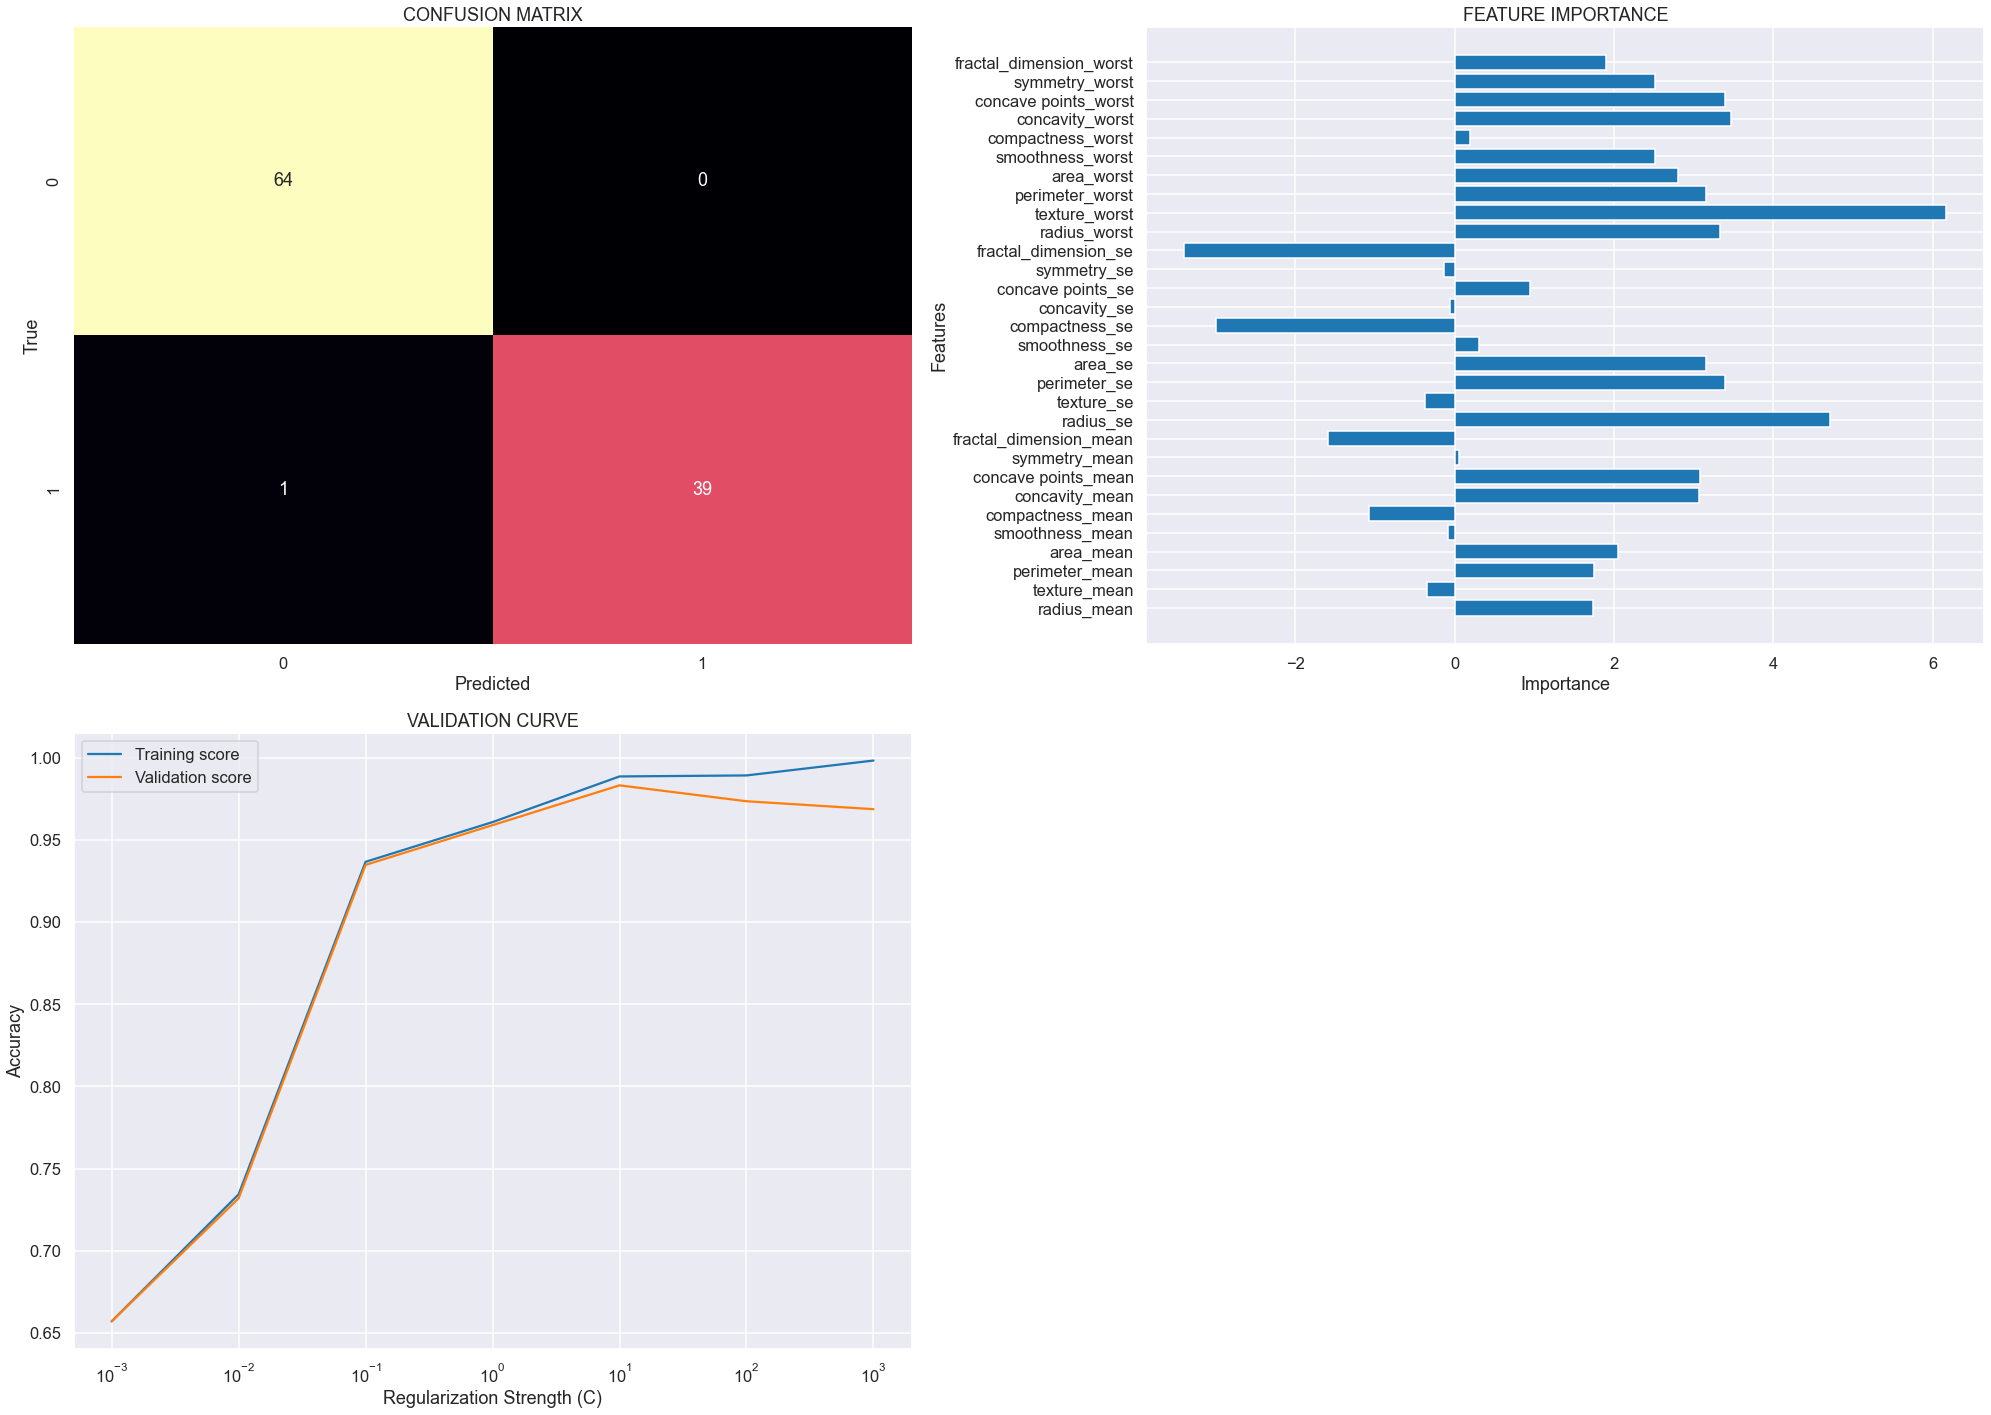

TRAINING ACCURACY: 98.79%  |  TEST ACCURACY: 99.04%
              precision    recall  f1-score   support

           0       0.98      1.00      0.99        64
           1       1.00      0.97      0.99        40

    accuracy                           0.99       104
   macro avg       0.99      0.99      0.99       104
weighted avg       0.99      0.99      0.99       104



In [75]:
# Evaluate logistic regression model using all features
assess_log_model(X_train_scaled, y_train, X_test_scaled, y_test, X.columns)

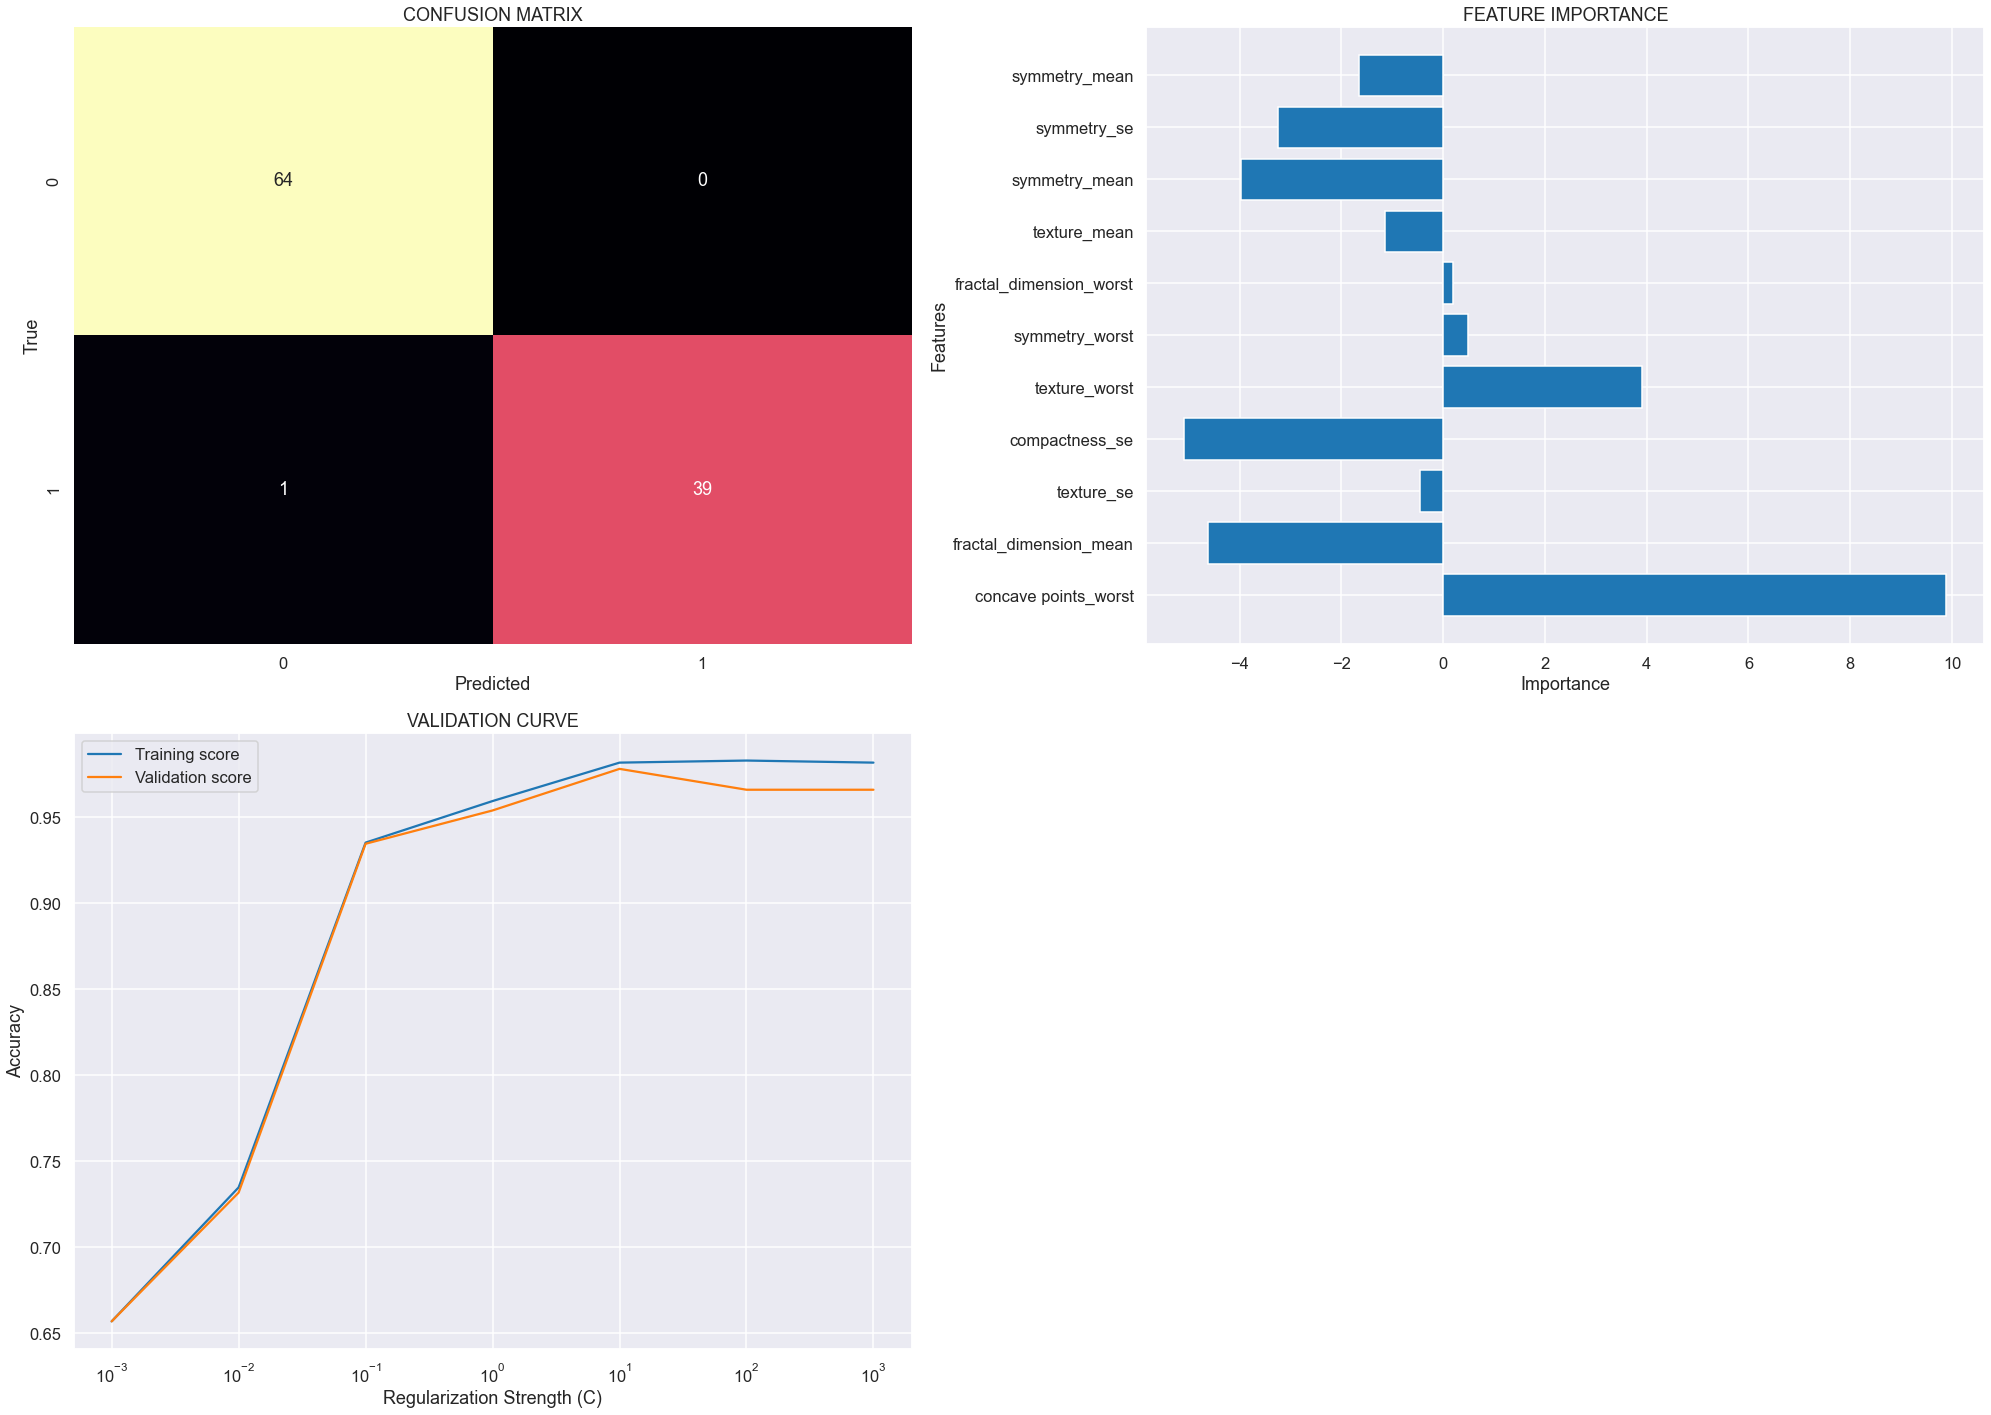

TRAINING ACCURACY: 98.07%  |  TEST ACCURACY: 99.04%
              precision    recall  f1-score   support

           0       0.98      1.00      0.99        64
           1       1.00      0.97      0.99        40

    accuracy                           0.99       104
   macro avg       0.99      0.99      0.99       104
weighted avg       0.99      0.99      0.99       104



In [76]:
# Evaluate logistic regression model using PCA features
assess_log_model(X_train_PCA, y_train, X_test_PCA, y_test, pca_features)

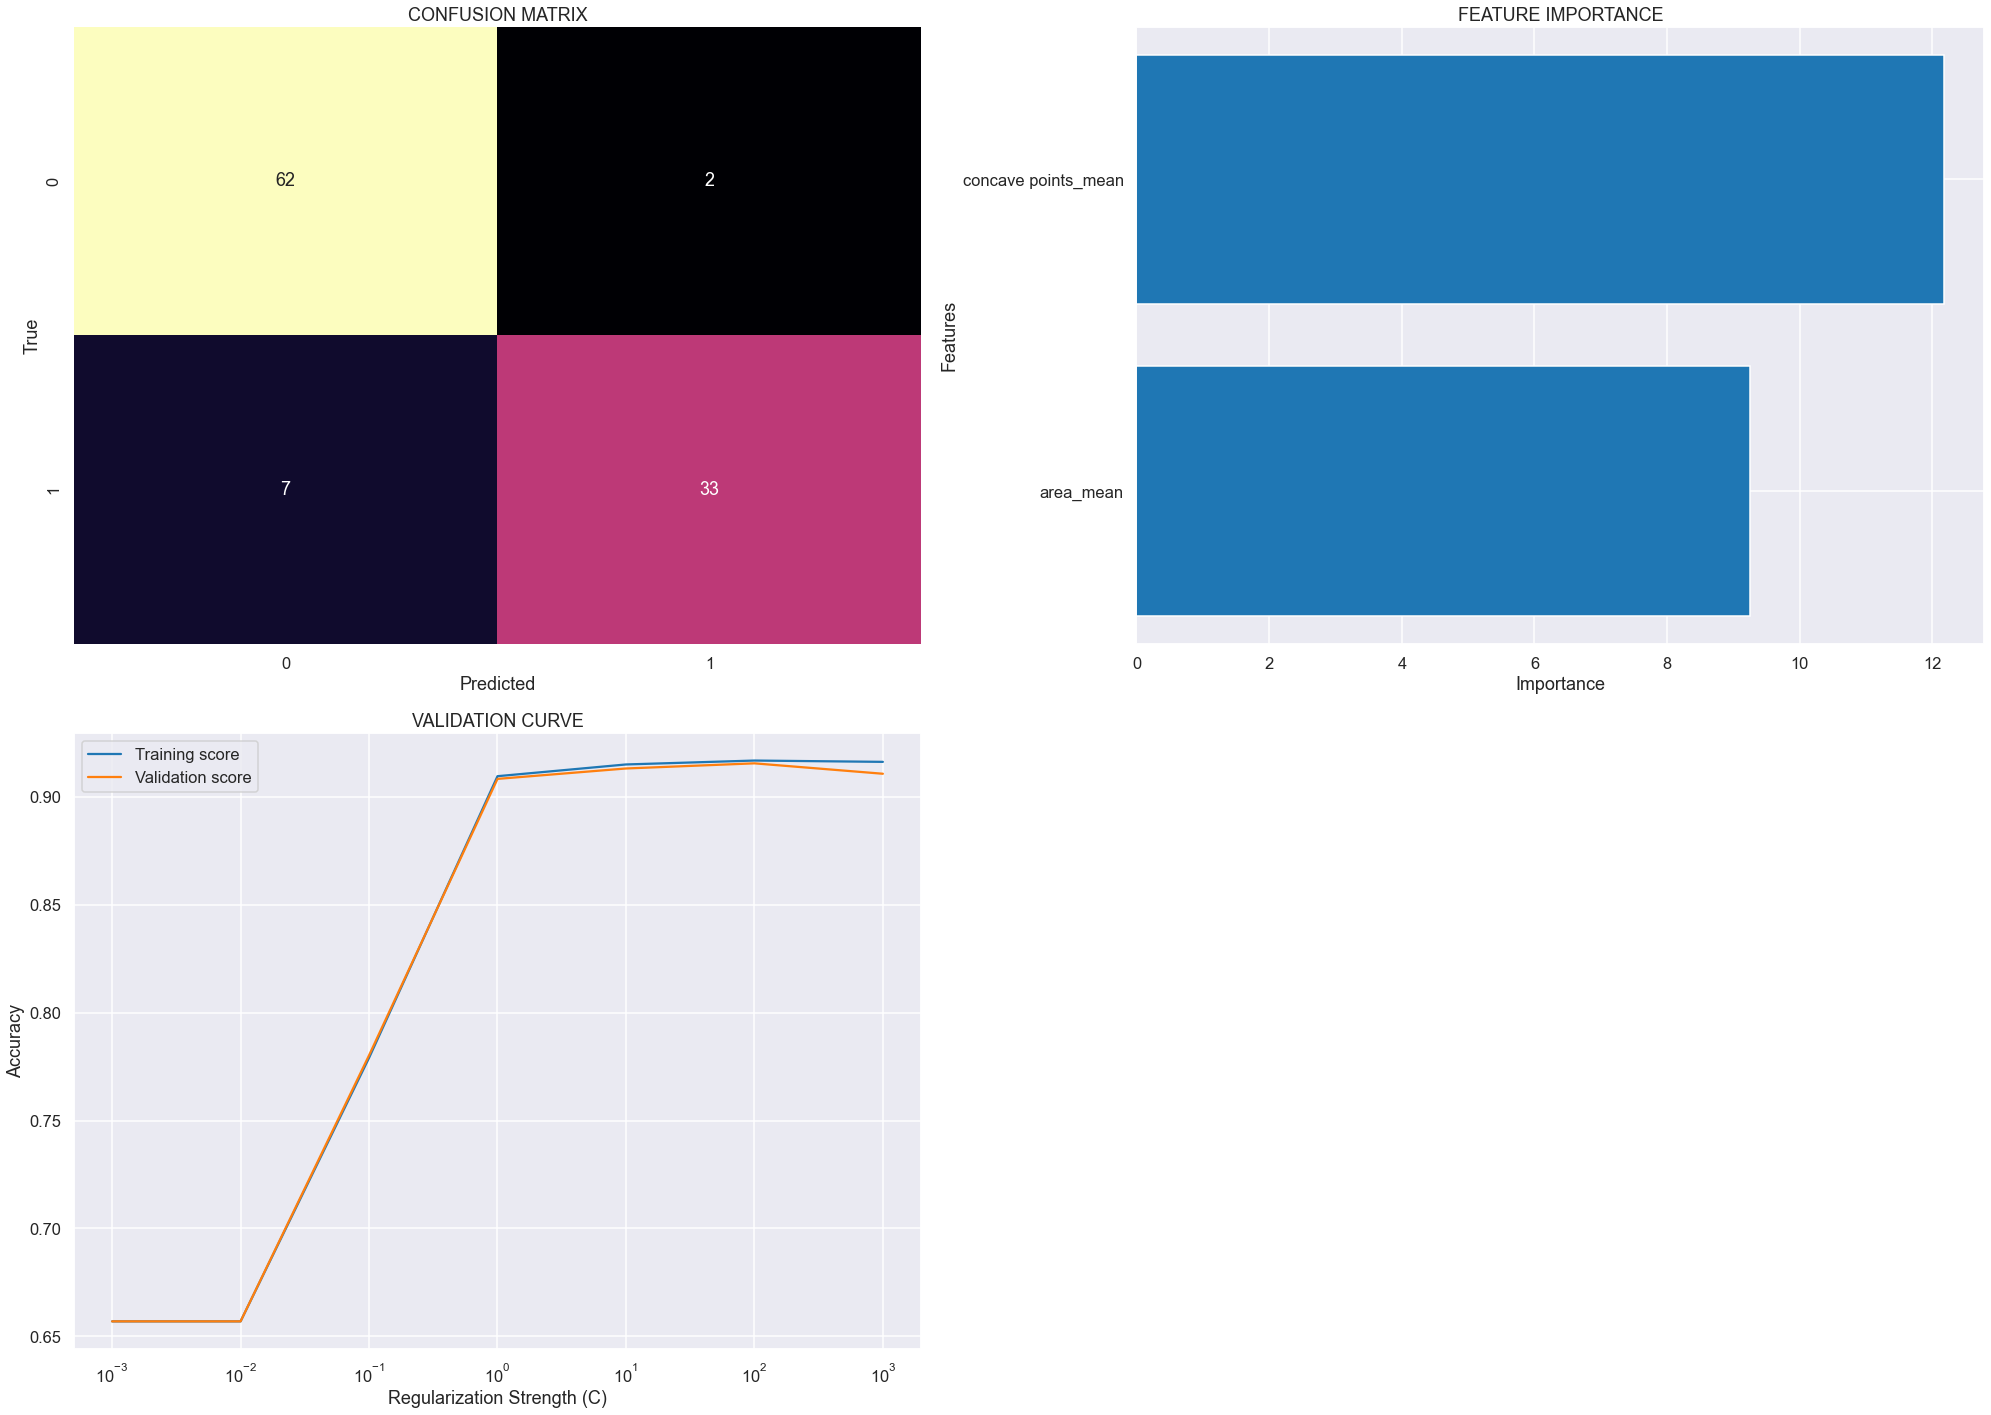

TRAINING ACCURACY: 91.3%  |  TEST ACCURACY: 91.35%
              precision    recall  f1-score   support

           0       0.90      0.97      0.93        64
           1       0.94      0.82      0.88        40

    accuracy                           0.91       104
   macro avg       0.92      0.90      0.91       104
weighted avg       0.92      0.91      0.91       104



In [77]:
# Evaluate logistic regression model using extracted features
assess_log_model(X_train_features, y_train, X_test_features, y_test, ml_cols)

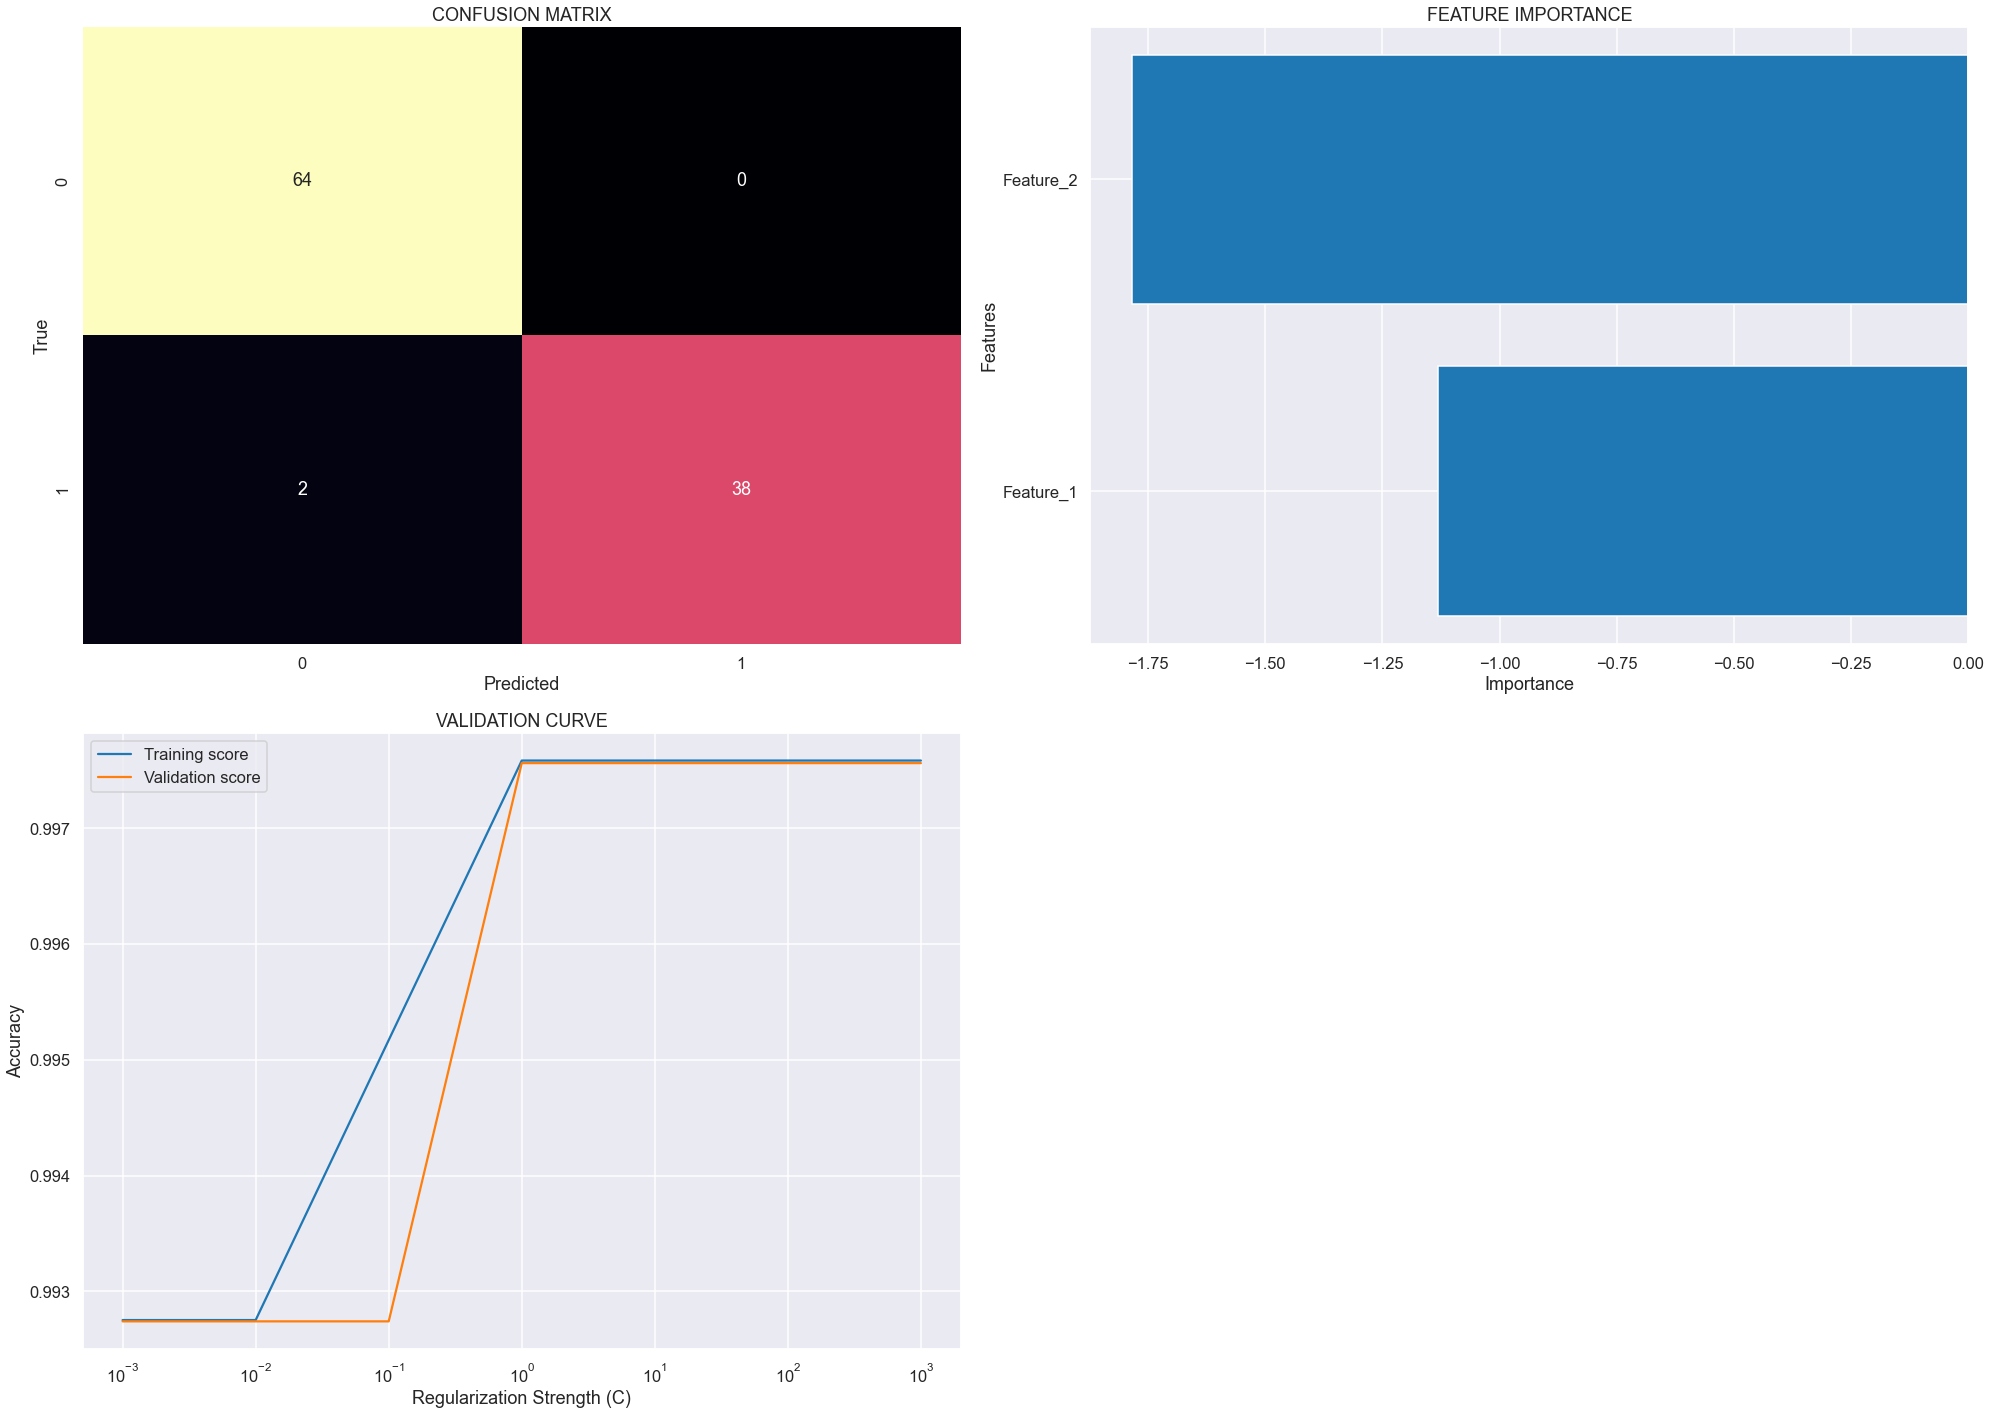

TRAINING ACCURACY: 99.76%  |  TEST ACCURACY: 98.08%
              precision    recall  f1-score   support

           0       0.97      1.00      0.98        64
           1       1.00      0.95      0.97        40

    accuracy                           0.98       104
   macro avg       0.98      0.97      0.98       104
weighted avg       0.98      0.98      0.98       104



In [78]:
# Evaluate logistic regression model using UMAP features
assess_log_model(X_train_UMAP, y_train, X_test_UMAP, y_test, UMAP_features)

**Note:** _Unlike certain dimensionality reduction techniques like Principal Component Analysis (PCA), UMAP does not offer a straightforward method to ascertain the contribution of each original feature to the creation of new features. This is because UMAP employs a complex non-linear transformation to map high-dimensional data to a lower-dimensional space. Consequently, the new features generated by UMAP represent intricate combinations of the original features rather than retaining the labels of the original features._

**Evaluation Metrics:** Upon examining the results of the logistic regression classification, it appears that the model exhibits slightly better performance on the training set with all features compared to the PCA and other reduced features. The confusion matrix reveals high accuracy with minimal false negatives and zero false positives, indicating the model's effectiveness in classifications. In the _Feature Importance_ plot, the influence of various features on each logistic regression model is evident, particularly highlighting the significance of features related to _worst_ measurements, such as `concave points` and  `perimeter`, in making predictions. Notably, `concave points` emerges as a highly influential attribute for diagnosis classification in each instance of the Logistic Regression model.

Analysis of the validation curve indicates that the optimal regularization value is $10^1$, where the test score reaches __99.04__% for both PCA and full features, signifying the best model performance. These results surpass the performance of the model on the UMAP and extracted features, which achieved __98.08__% and __91.35__% accuracy respectively.

The best model (model utilizing full features), demonstrates a precision of 0.98 for Benign (Class 0) and perfect precision (1.00) for Malignant (Class 1), indicating high precision in predictions. The recall score is perfect (1.00) for benign cases and very high (0.97) for malignant cases, suggesting successful identification of true positives. Both classes exhibit an f1-score of approximately 0.99, indicating balanced performance between precision and recall.
Furthermore, the test data contains more instances of Class 0 (Benign) with a count of $64$ compared to Class 1 (Malignant), which has a count of $40$.

Based on these comprehensive evaluations, it can be inferred that the best model demonstrates consistent performance on both training and test datasets, suggesting it is neither overfitting nor underfitting. Therefore, it is expected to perform well when making predictions on similar unseen data.

Next, we will construct a Random Forest Classifier model to evaluate its performance compared to our Logistic Regression model.

### Random Forest Classifier

In [79]:
# Initialize Random Forest Classifier
rf_model = RandomForestClassifier(random_state=42)

In [80]:
# Define simple function to evaluate random forest classifier
def assess_rf_model(X_train_data, y_train, X_test_data, y_test, y_labels):
    """
    Build and assess a Random Forest Classifier model accuracy.

    Parameters:
    - X_train_data (array-like): Training data features.
    - y_train (array-like): Training data labels.
    - X_test_data (array-like): Test data features.
    - y_test (array-like): Test data labels.
    - y_labels (array-like): Labels for features.

    Returns:
        None
    """
    # Initialize random forest classifier and fit the model  
    rf_model.fit(X_train_data, y_train)
    
    # Assess model accuracy on training set & test set
    y_train_pred = rf_model.predict(X_train_data)
    train_accuracy = accuracy_score(y_train, y_train_pred)
    y_test_pred = rf_model.predict(X_test_data)
    test_accuracy = accuracy_score(y_test, y_test_pred)
    
    print(f"TRAINING ACCURACY: {round(train_accuracy*100, 2)}%  |  TEST ACCURACY: {round(test_accuracy*100, 2)}%")

In [81]:
# Evaluate model performance on all instances
assess_rf_model(X_train_scaled, y_train, X_test_scaled, y_test, X.columns) # Full features
assess_rf_model(X_train_PCA, y_train, X_test_PCA, y_test, pca_features) # PCA features
assess_rf_model(X_train_features, y_train, X_test_features, y_test, ml_cols) # Extracted features
assess_rf_model(X_train_UMAP, y_train, X_test_UMAP, y_test, UMAP_features) # UMAP features

TRAINING ACCURACY: 100.0%  |  TEST ACCURACY: 95.19%
TRAINING ACCURACY: 100.0%  |  TEST ACCURACY: 94.23%
TRAINING ACCURACY: 100.0%  |  TEST ACCURACY: 94.23%
TRAINING ACCURACY: 100.0%  |  TEST ACCURACY: 98.08%


The results indicate that the Random Forest Classifier model is achieving perfect accuracy on the training set _(100%)_ for all instances, but the test accuracy varies between __92.31__% and __98.08__%. This discrepancy between training and test accuracy suggests that the models are likely overfitting the training data, as they perform significantly worse on unseen test data.

Given this result, it appears that the Random Forest Classifier models are not performing optimally and may benefit from further tuning of hyperparameters to reduce overfitting and improve generalization to new data.

In [82]:
# Apply cross-validation with grid search to find the best hyperparameters for random forest classifier
param_grid = {
    'n_estimators': [50, 100, 200, 300, 400, 500],
    'max_depth': [5, 10, None],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4],
    'bootstrap': [True, False]
}

# Perform tuning with 5-fold stratified cross-validation
cv = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)
grid = GridSearchCV(estimator=rf_model, param_grid=param_grid, cv=cv)
grid.fit(X_train_scaled, y_train) # Utilize the full features

print("Best Hyperparameters:", grid.best_params_)

Best Hyperparameters: {'bootstrap': True, 'max_depth': 10, 'min_samples_leaf': 1, 'min_samples_split': 2, 'n_estimators': 50}


In [83]:
# Initialize Random Forest Classifier with some tuned hyperparameters
rfc_model = RandomForestClassifier(min_samples_leaf=1, min_samples_split=5, n_estimators=50, random_state=42)

In [84]:
# Define function to build random forest classifier
def assess_rfc_model(X_train_data, y_train, X_test_data, y_test, y_labels):
    """
    Build and assess a Random Forest classifier model.

    Parameters:
        X_train_data (array-like): Training data features.
        y_train (array-like): Training data labels.
        X_test_data (array-like): Test data features.
        y_test (array-like): Test data labels.
        y_labels (array-like): Labels for features.

    Returns:
        None
    """
    sns.set_context('poster')

    # Initialize random forest classifier and fit the model  
    rfc_model.fit(X_train_data, y_train)
    
    # Assess model accuracy on training set & test set
    y_train_pred = rfc_model.predict(X_train_data)
    train_accuracy = accuracy_score(y_train, y_train_pred)
    y_test_pred = rfc_model.predict(X_test_data)
    test_accuracy = accuracy_score(y_test, y_test_pred)
    
    # Compute confusion matrix and plot heatmap
    c_matrix = confusion_matrix(y_test, y_test_pred)
    plt.figure(figsize=(28, 20))
    plt.subplot(2, 2, 1)
    plt.title("CONFUSION MATRIX")
    sns.heatmap(c_matrix, annot=True, cmap='magma', cbar=False)
    plt.xlabel('Predicted')
    plt.ylabel('True')
    
    # Plot feature importance
    plt.subplot(2, 2, 2)
    plt.title("FEATURE IMPORTANCE")
    n_features = X_train_data.shape[1]
    plt.barh(range(n_features), rfc_model.feature_importances_, align='center')
    plt.yticks(np.arange(n_features), y_labels)
    plt.xlabel('Importance')
    plt.ylabel('Features')
    
    # Plot validation curve
    param_range = [10, 50, 100, 200, 300, 400, 500] 
    n_splits = 5
    k_fold = StratifiedKFold(n_splits=n_splits)
    train_scores, valid_scores = validation_curve(rfc_model, X_train_data, y_train, param_name="n_estimators", 
                                                 param_range=param_range, cv=k_fold, scoring='accuracy')   
    plt.subplot(2, 2, 3)
    plt.title("VALIDATION CURVE")
    plt.plot(param_range, np.mean(train_scores, axis=1), label='Training score')
    plt.plot(param_range, np.mean(valid_scores, axis=1), label='Validation score')
    plt.xlabel('Number of Estimators')
    plt.ylabel('Accuracy')
    plt.legend(loc='best')
    
    plt.tight_layout()
    plt.show();
    
     # Print accuracy scores & classification report
    print(f"TRAINING ACCURACY: {round(train_accuracy*100, 2)}%  |  TEST ACCURACY: {round(test_accuracy*100, 2)}%")
    print(classification_report(y_test, y_test_pred))

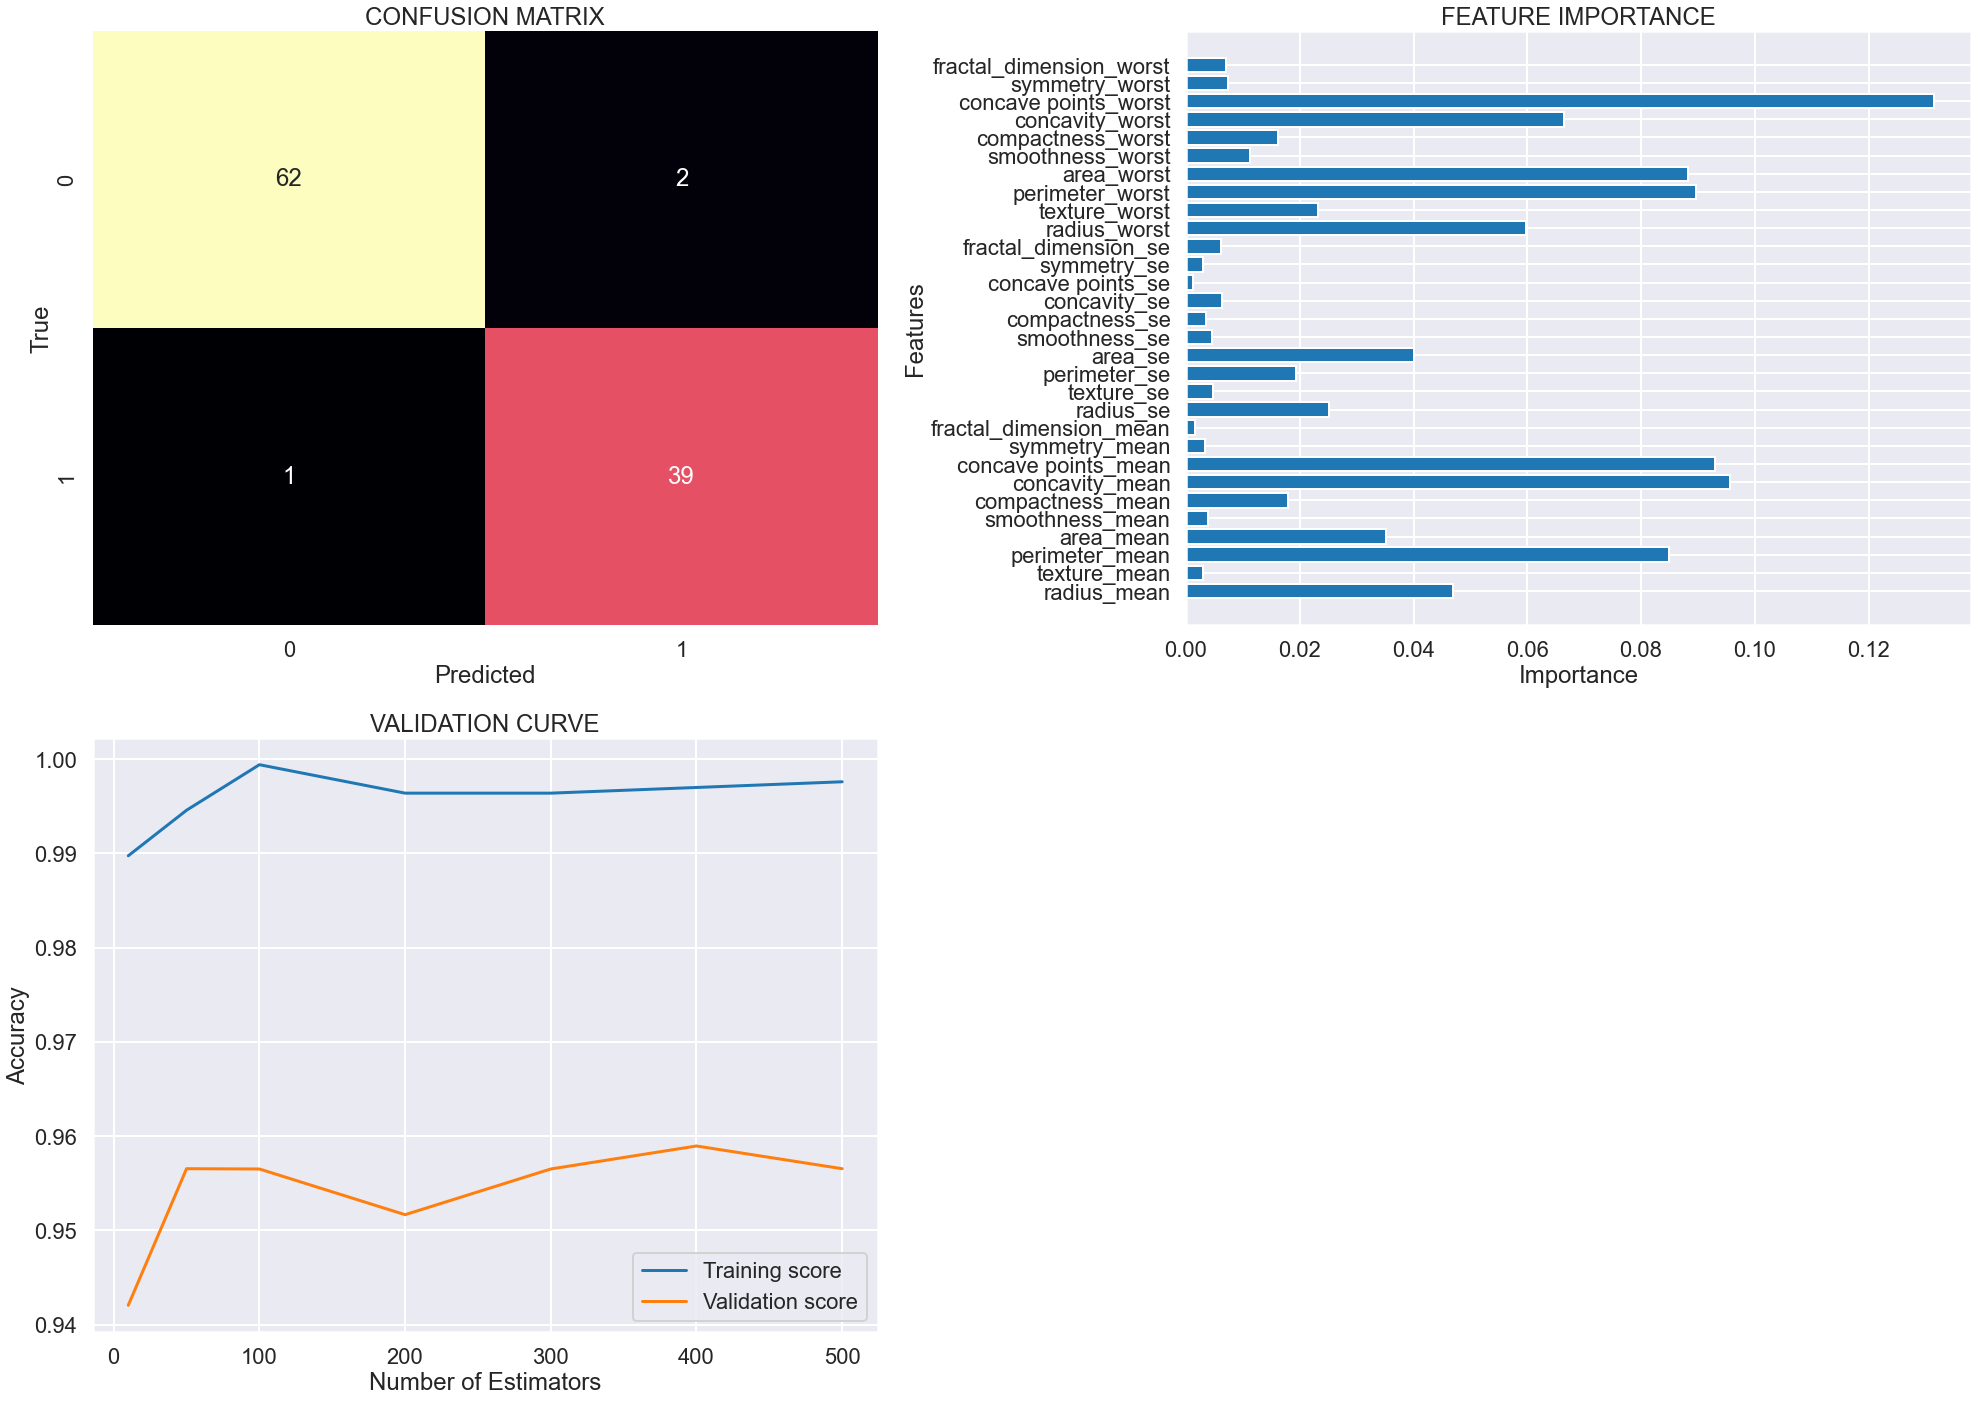

TRAINING ACCURACY: 100.0%  |  TEST ACCURACY: 97.12%
              precision    recall  f1-score   support

           0       0.98      0.97      0.98        64
           1       0.95      0.97      0.96        40

    accuracy                           0.97       104
   macro avg       0.97      0.97      0.97       104
weighted avg       0.97      0.97      0.97       104



In [85]:
# Evaluate random forest classifier using all features
assess_rfc_model(X_train_scaled, y_train, X_test_scaled, y_test, X.columns)

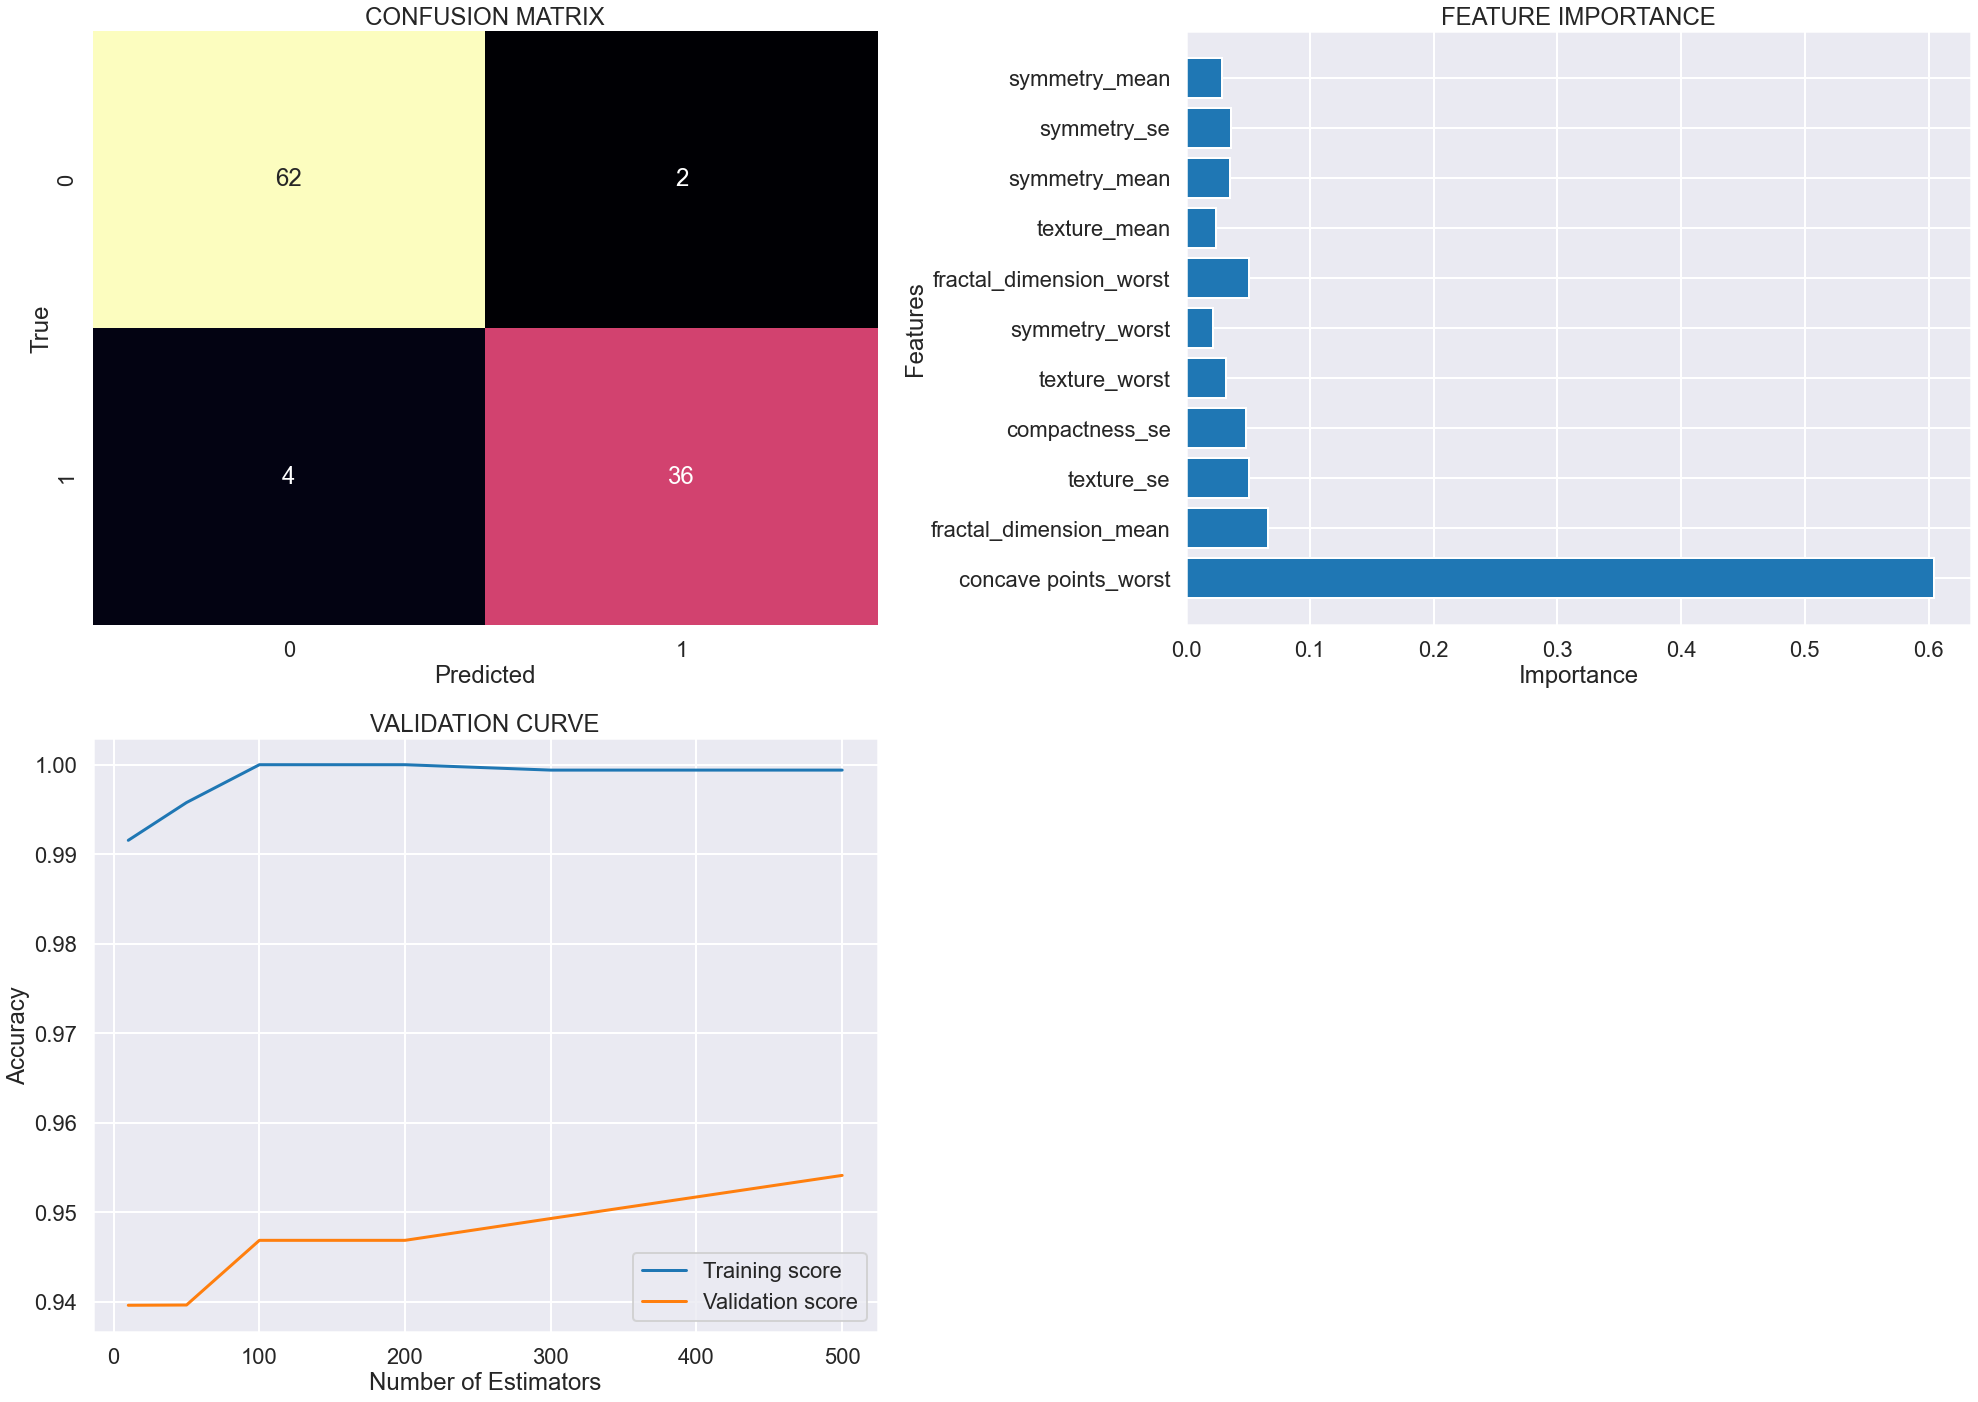

TRAINING ACCURACY: 99.76%  |  TEST ACCURACY: 94.23%
              precision    recall  f1-score   support

           0       0.94      0.97      0.95        64
           1       0.95      0.90      0.92        40

    accuracy                           0.94       104
   macro avg       0.94      0.93      0.94       104
weighted avg       0.94      0.94      0.94       104



In [86]:
# Evaluate random forest classifier using PCA features
assess_rfc_model(X_train_PCA, y_train, X_test_PCA, y_test, pca_features)

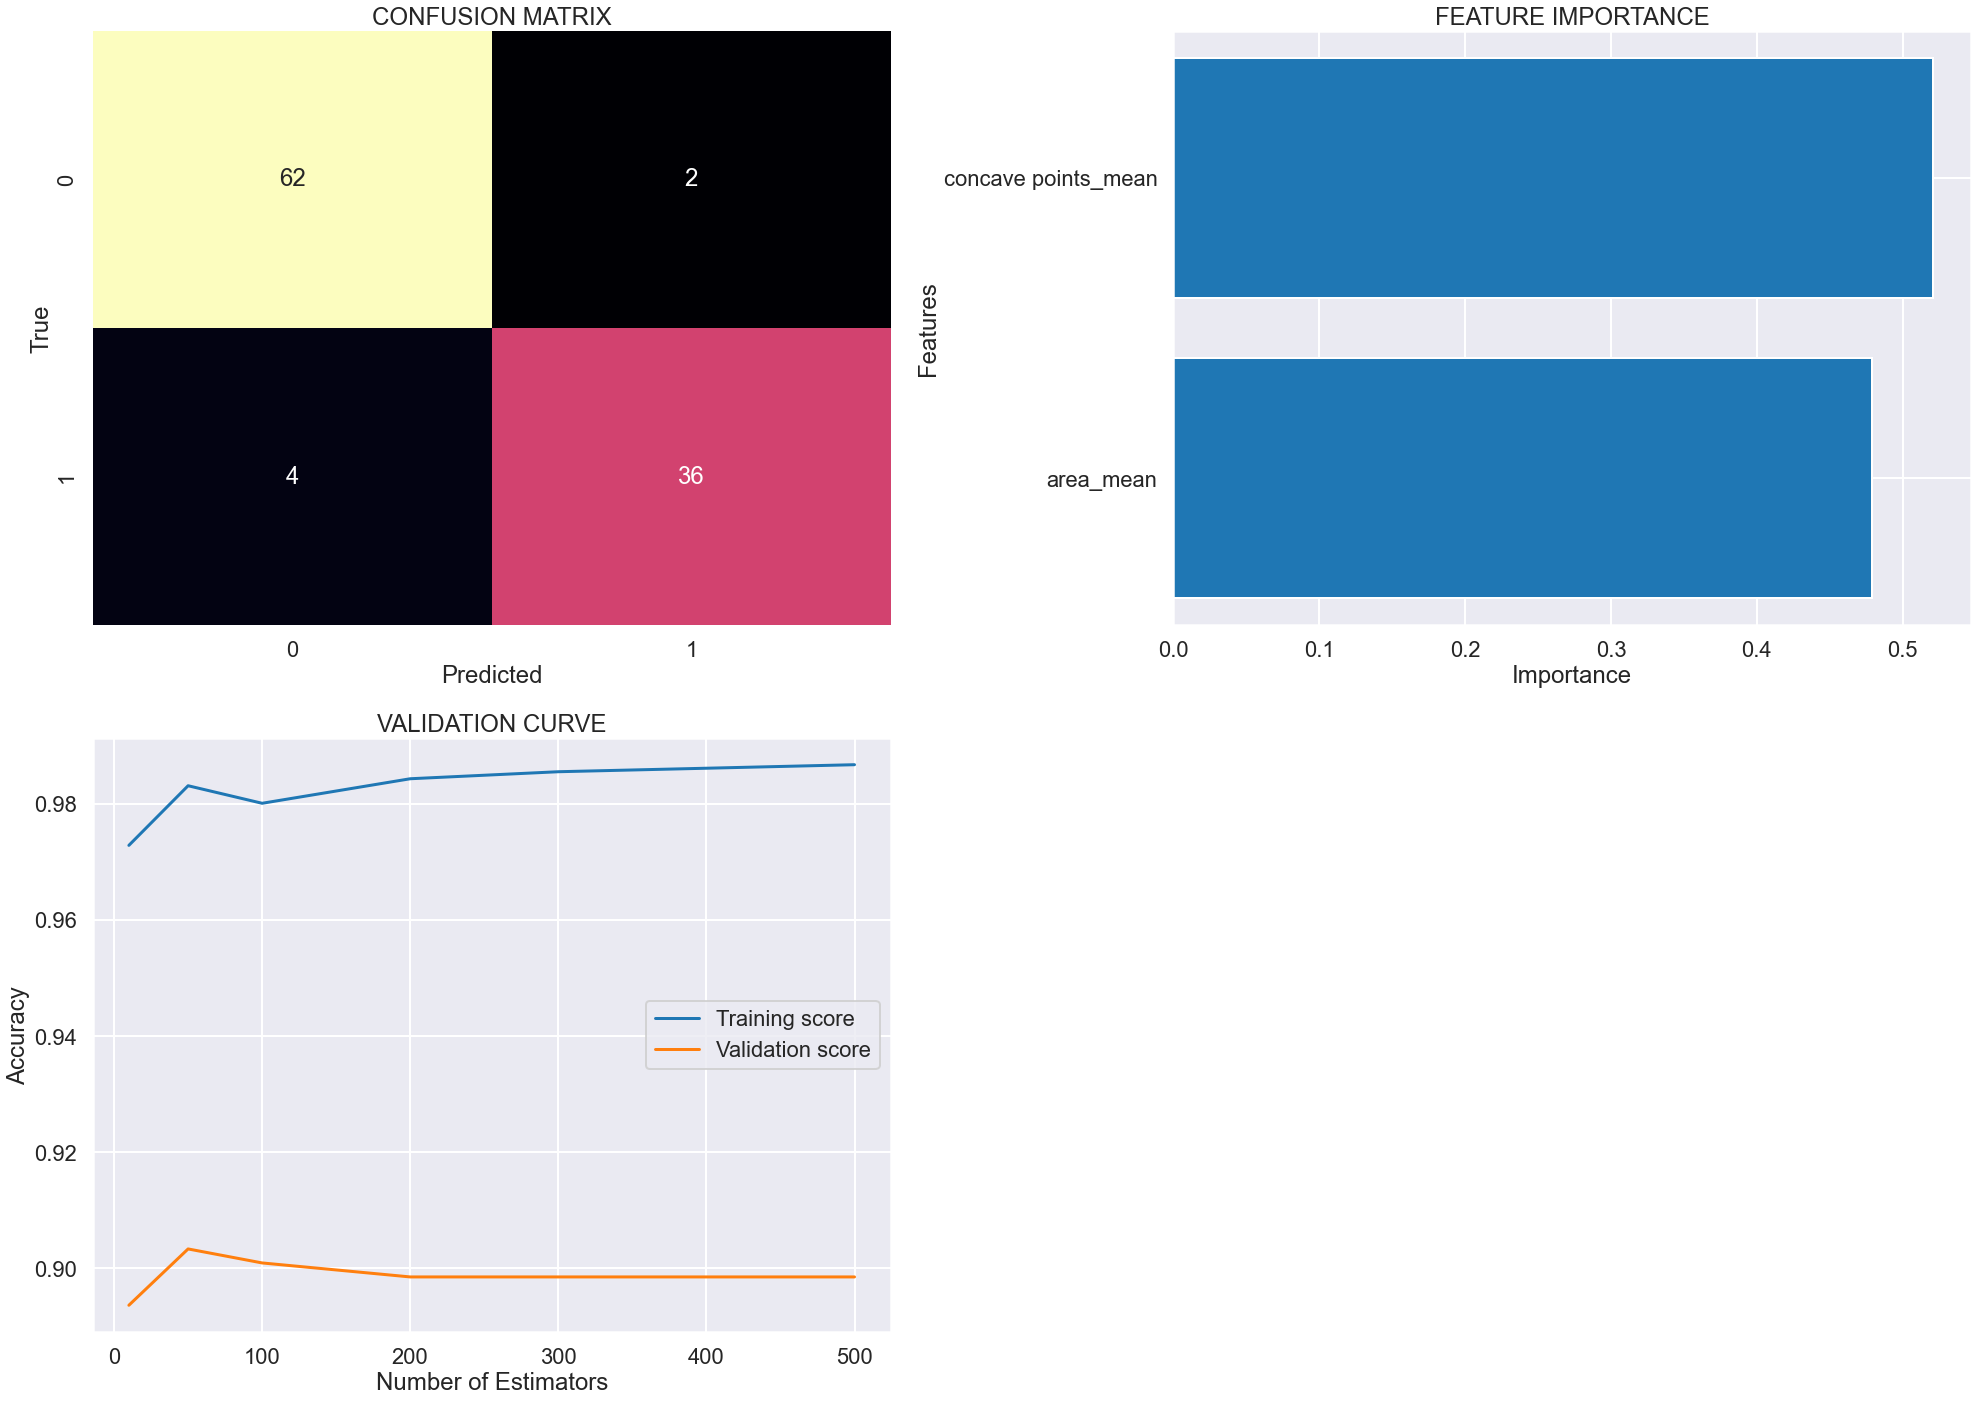

TRAINING ACCURACY: 98.07%  |  TEST ACCURACY: 94.23%
              precision    recall  f1-score   support

           0       0.94      0.97      0.95        64
           1       0.95      0.90      0.92        40

    accuracy                           0.94       104
   macro avg       0.94      0.93      0.94       104
weighted avg       0.94      0.94      0.94       104



In [87]:
# Evaluate random forest classifier using PCA features
assess_rfc_model(X_train_features, y_train, X_test_features, y_test, ml_cols)

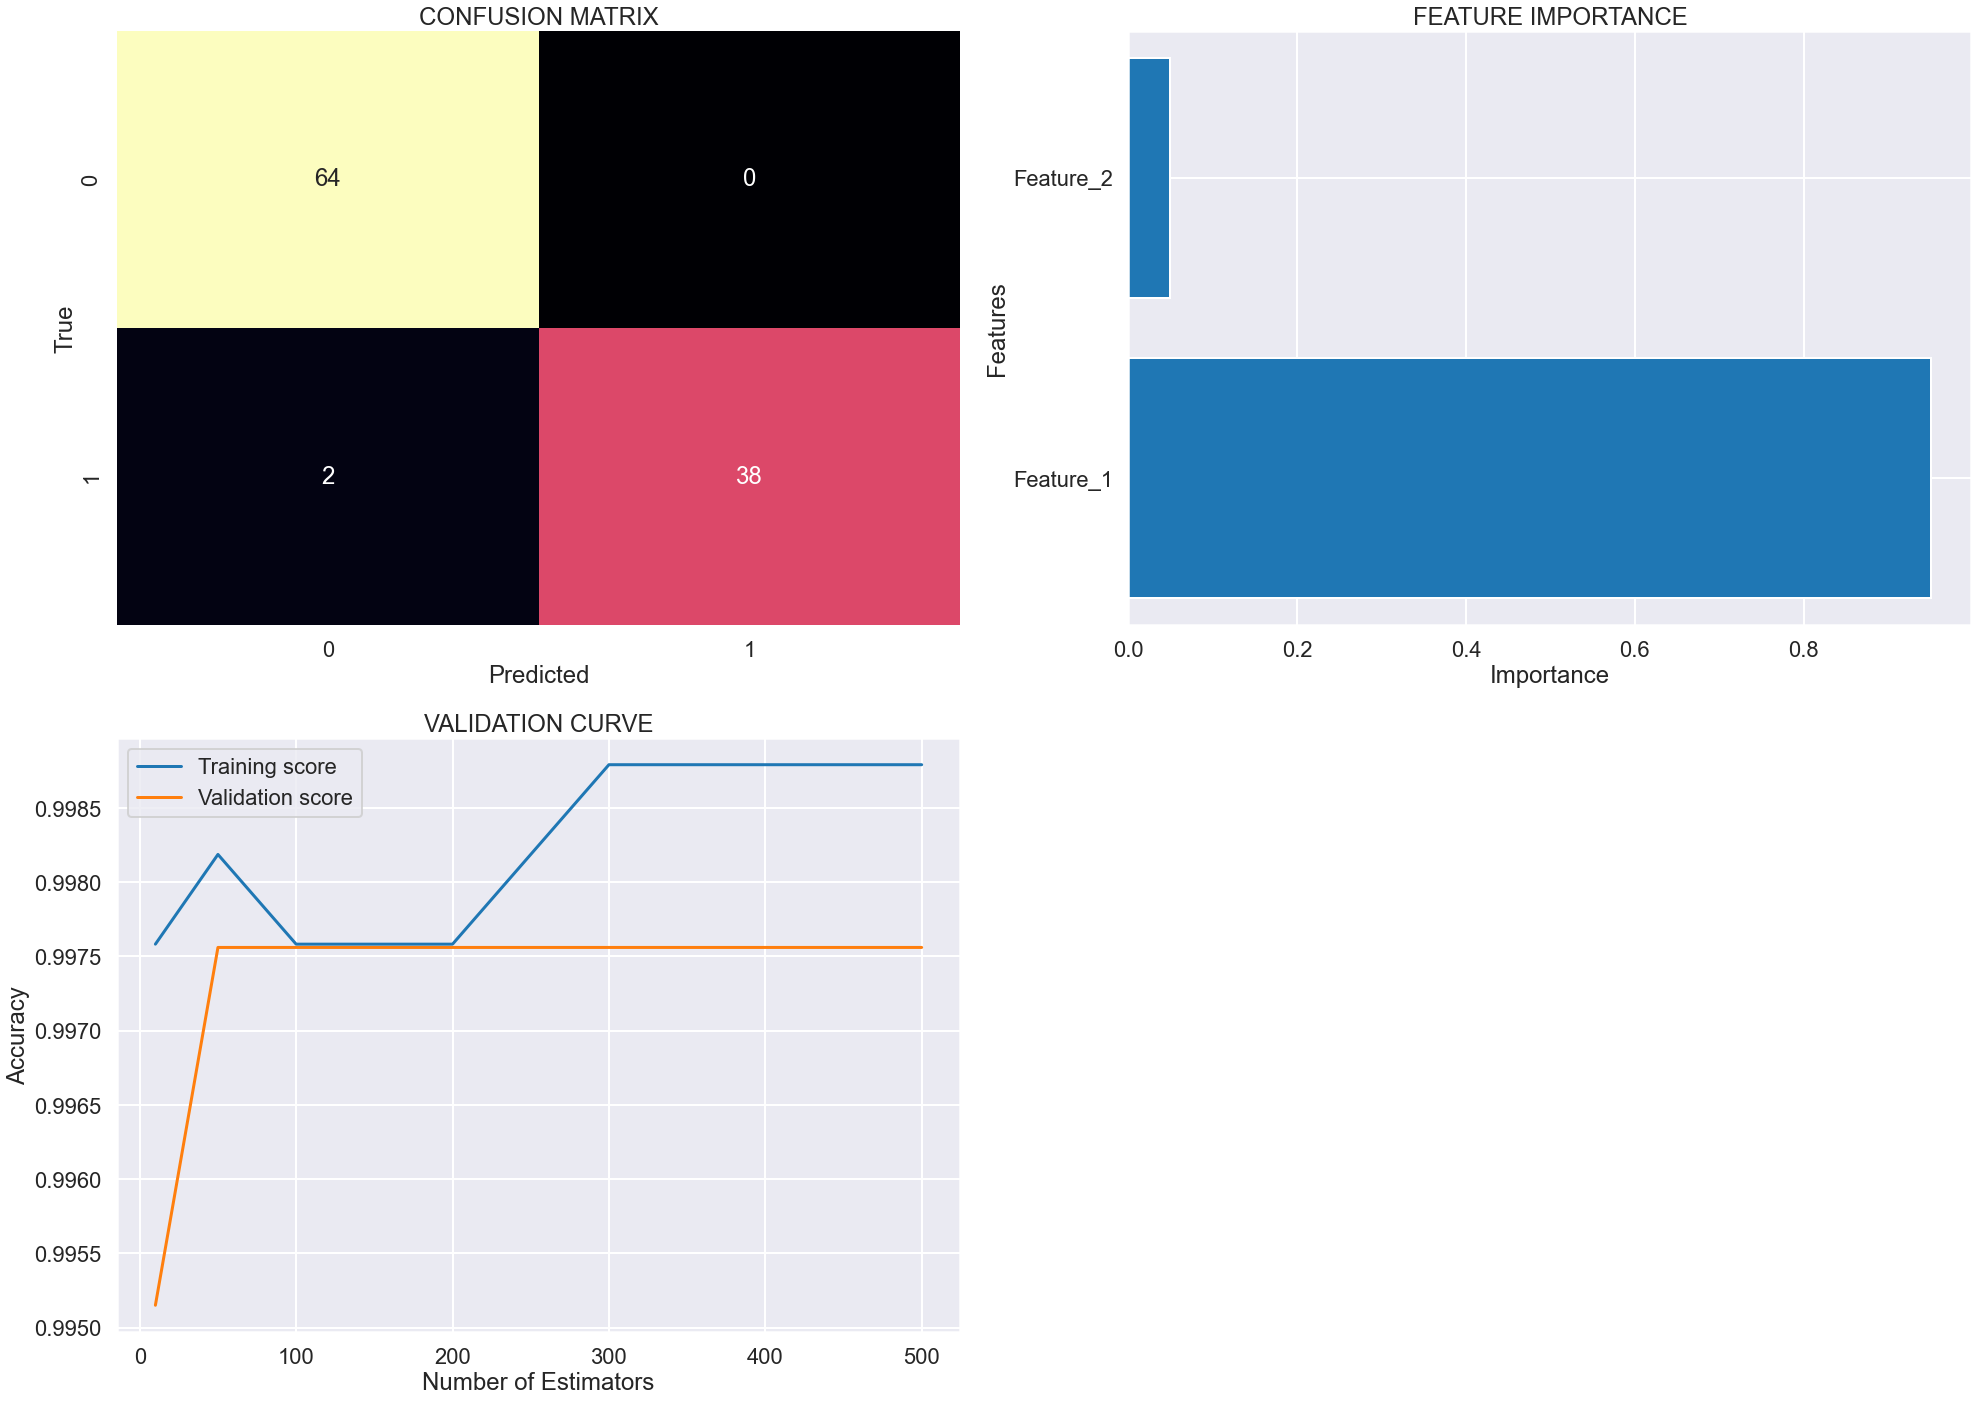

TRAINING ACCURACY: 100.0%  |  TEST ACCURACY: 98.08%
              precision    recall  f1-score   support

           0       0.97      1.00      0.98        64
           1       1.00      0.95      0.97        40

    accuracy                           0.98       104
   macro avg       0.98      0.97      0.98       104
weighted avg       0.98      0.98      0.98       104



In [88]:
# Evaluate random forest classifier using UMAP features
assess_rfc_model(X_train_UMAP, y_train, X_test_UMAP, y_test, UMAP_features)

**Evaluation Metrics:** With tuned hyperparameters, the Random Forest Classifier exhibits improved performance with the full features. Similar to the Logistic Regression classification results, `concave points` emerges as a highly influential attribute for diagnosis classification in each instance of the Random Forest Classifier model. The most optimal model, trained on supervised UMAP features, achieves an accuracy of __98.08__% on the test set and __100__% on the training set, indicating minimal overfitting. These results suggest the model performs quite well and generalizes effectively, despite a slight drop in accuracy from the training data. 

However, in comparison, based on the evaluation metrics, the Logistic Regression model <u>outperforms</u> the Random Forest Classifier in classifying this data.

In [89]:
# Define function to plot decision boundary and data points
def plot_decision_boundary(model, ax, X_train, y_train, X_test, y_test):
    """
    Plot the decision boundary of a classifier model.

    Parameters:
    - model: Classifier model.
    - ax: Matplotlib axis object to plot on.
    - X_train (array-like): Training features.
    - y_train (array-like): Training target.
    - X_test (array-like): Test features.
    - y_test (array-like): Test target.

    Returns:
        None
    """
    # Adjust X_train based on dimensionality reduction technique used
    if X_train is X_train_PCA:
        X_train = X_train_PCA[:, :2]
    else:
        X_train = X_train
    
    # Fit the model   
    model.fit(X_train, y_train)
    
    # Define meshgrid and plot decision boundary
    x_min, x_max = X_train[:, 0].min() , X_train[:, 0].max() + 0.1
    y_min, y_max = X_train[:, 1].min() , X_train[:, 1].max() + 0.1
    xx, yy = np.meshgrid(np.linspace(x_min, x_max, 100), np.linspace(y_min, y_max, 100))
    Z = model.predict(np.c_[xx.ravel(), yy.ravel()])
    Z = np.round(Z).reshape(xx.shape)
    ax.contourf(xx, yy, Z, alpha=0.8)
    
    # Plot data points
    colors = ['green' if label == 1 else 'red' for label in y_train]
    scatter = ax.scatter(X_train[:, 0], X_train[:, 1], c=colors, edgecolor='k', marker='o', s=50, linewidth=1)
    ax.set_facecolor('lightgray')
    red_patch = mpatches.Patch(color='red', label='Malignant')
    green_patch = mpatches.Patch(color='green', label='Benign')
    ax.legend(handles=[red_patch, green_patch])

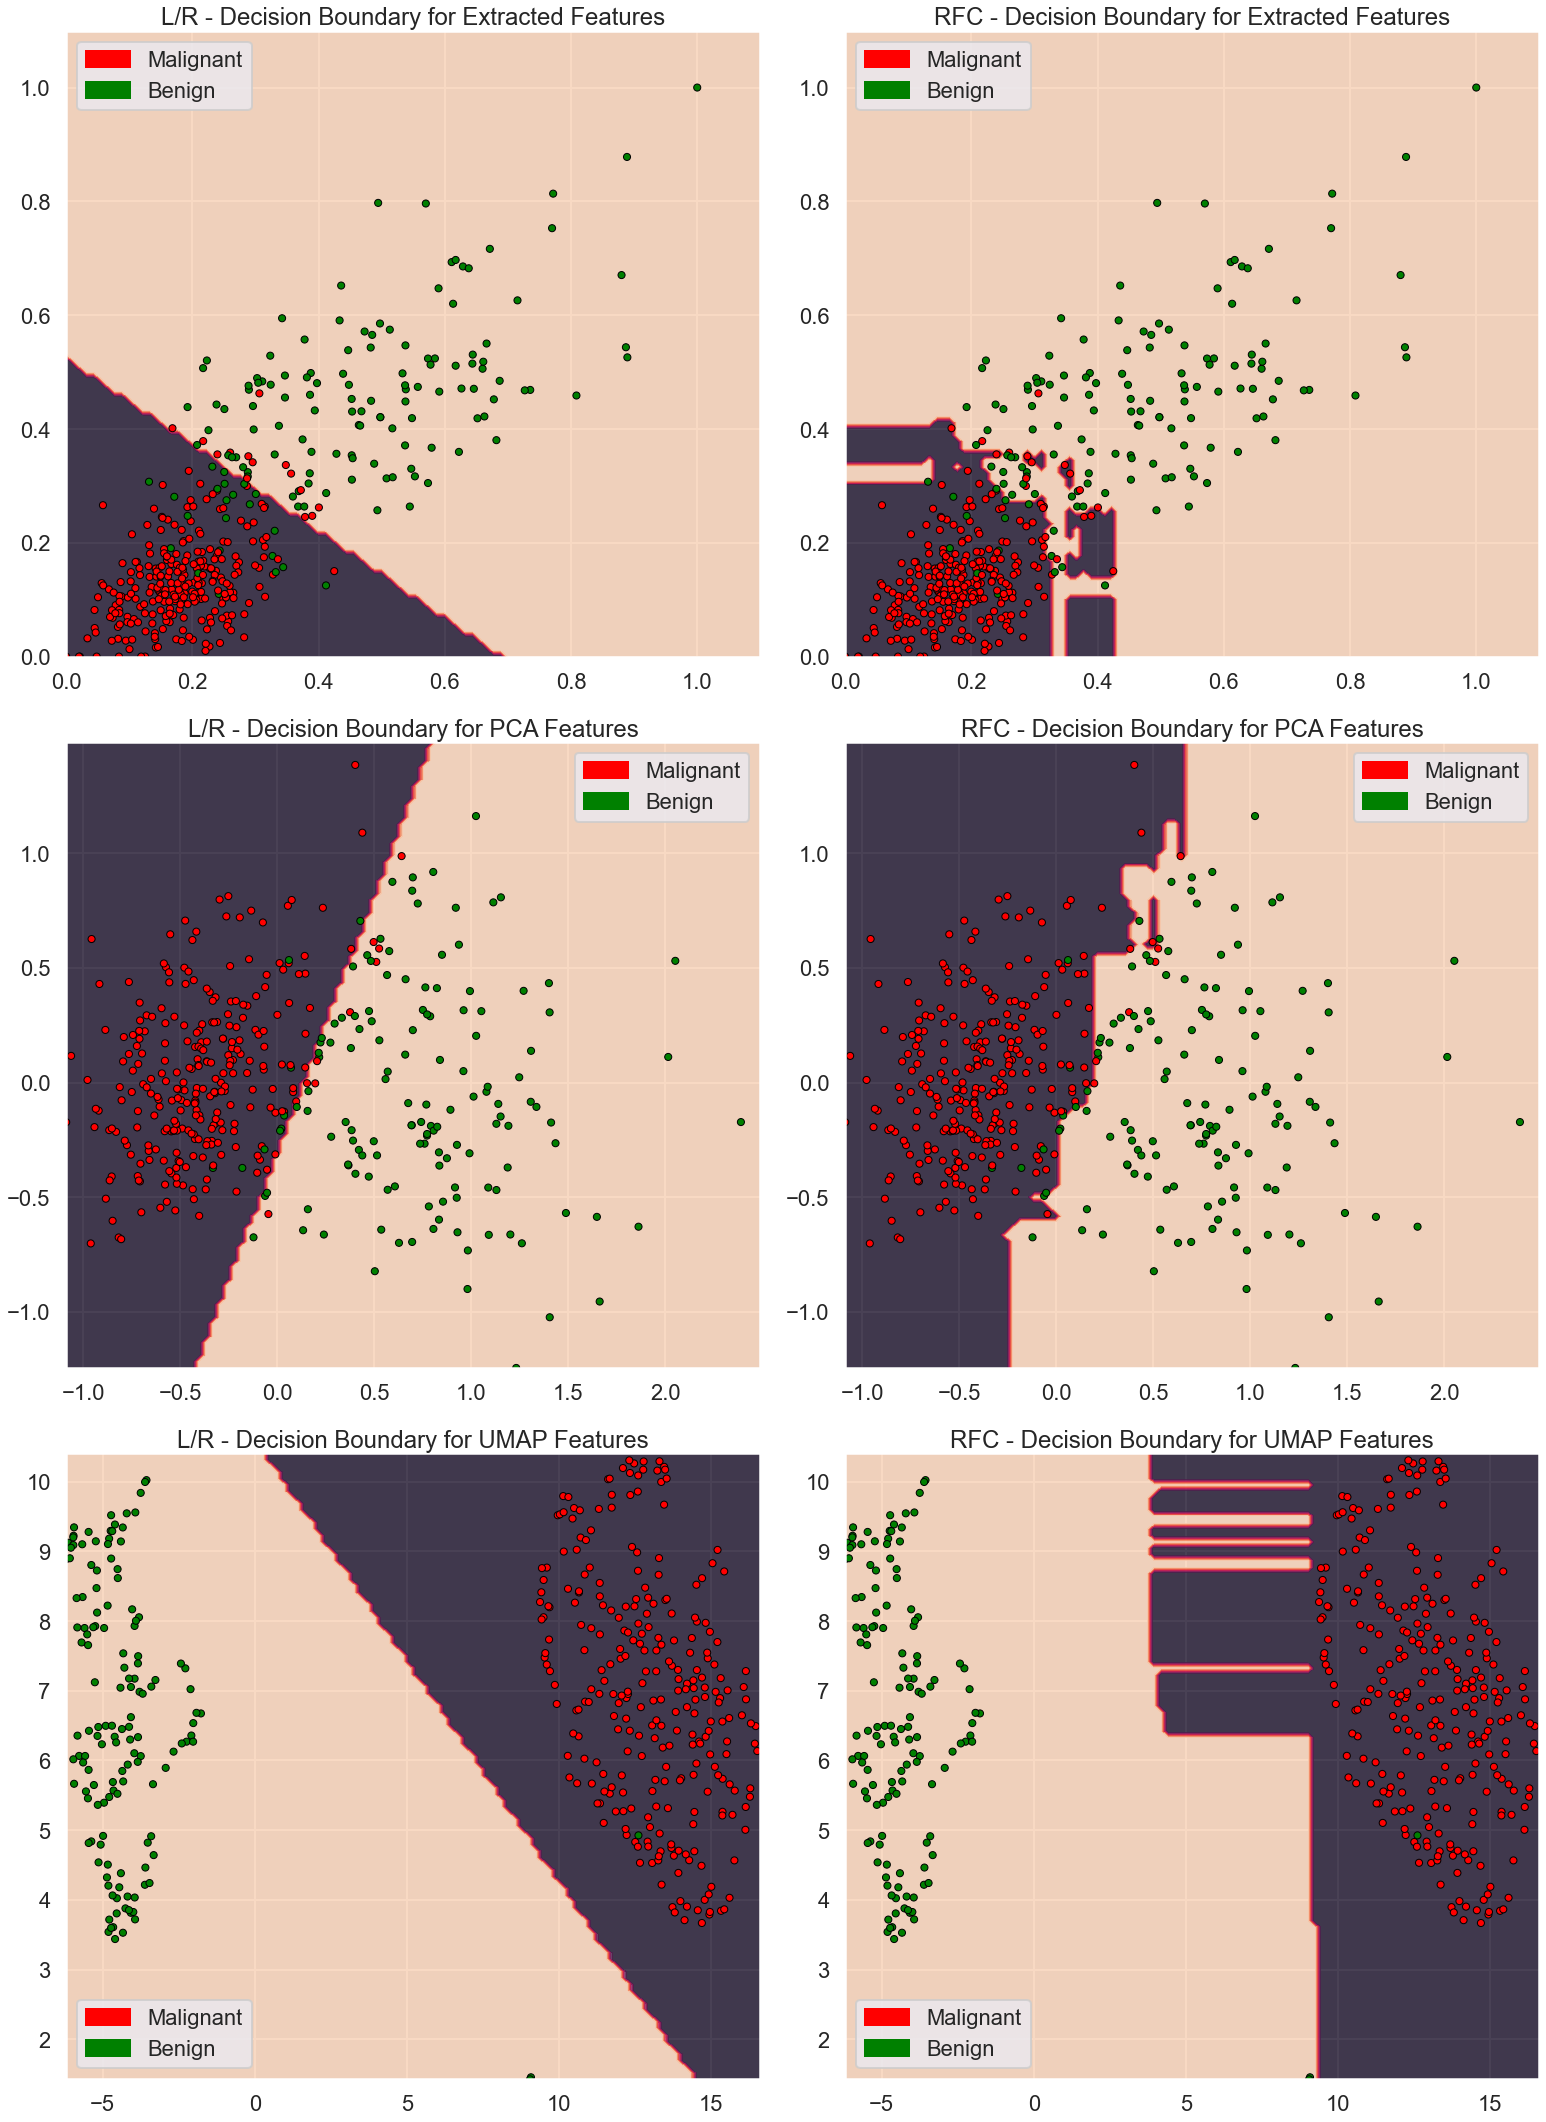

In [90]:
# Implement function to plot decision boundary for both classifiers
fig, axes = plt.subplots(3, 2, figsize=(22, 30))

# Plot decision boundary for all features
axes[0, 0].set_title('L/R - Decision Boundary for Extracted Features')
plot_decision_boundary(log_model, axes[0, 0], X_train_features, y_train, X_test_features, y_test)
axes[0, 1].set_title('RFC - Decision Boundary for Extracted Features')
plot_decision_boundary(rfc_model, axes[0, 1], X_train_features, y_train, X_test_features, y_test)

# Plot decision boundary for PCA features
axes[1, 0].set_title('L/R - Decision Boundary for PCA Features')
plot_decision_boundary(log_model, axes[1, 0], X_train_PCA, y_train, X_test_PCA, y_test)
axes[1, 1].set_title('RFC - Decision Boundary for PCA Features')
plot_decision_boundary(rfc_model, axes[1, 1], X_train_PCA, y_train, X_test_PCA, y_test)

# Plot decision boundary for UMAP features
axes[2, 0].set_title('L/R - Decision Boundary for UMAP Features')
plot_decision_boundary(log_model, axes[2, 0], X_train_UMAP, y_train, X_test_UMAP, y_test)
axes[2, 1].set_title('RFC - Decision Boundary for UMAP Features')
plot_decision_boundary(rfc_model, axes[2, 1], X_train_UMAP, y_train, X_test_UMAP, y_test)

plt.tight_layout()
plt.show();

**Observation:** From the decision boundary plots, it is evident that the Logistic Regression classifier provides a clear linear separation between classes, facilitating interpretability with smooth, linear decision boundaries. On the other hand, the Random Forest Classifier generates a more intricate, non-linear decision boundary, capable of capturing complex data patterns. However, it tends to slightly overfit in this scenario, as seen from the complex and fragmented decision boundaries.
The change in orientation of the decision boundaries across different features is attributed to the transformation of the feature space. Nevertheless, the fundamental characteristics of both classifiers remain consistent.

While both classifiers demonstrate proficient performance with most data points correctly classified, there are instances of overlap, particularly noticeable in the Random Forest Classifier plots, indicating potential misclassifications. These observations from the decision boundary plots align with the results obtained from evaluation metrics, providing insights into the performance of the classifiers.

<a id='conclude'></a>
## Conclusions

In this project, we analyzed the Wisconsin Breast Cancer dataset to classify breast masses as benign or malignant based on multiple features extracted from fine needle aspirate (FNA) images. The dataset required extensive preprocessing due to outliers, invalid data, null values, and feature selection to ensure the robustness of subsequent analyses. The original dataset contained $571$ samples of $30$ numerical measurements, drilled down to $518$ samples after preprocessing. 

We employed various techniques, including linear regression imputations to handle missing values, dimensionality reduction, clustering, and supervised machine learning algorithms to extract insights and build predictive models. Here are the key findings and suggestions drawn from our analysis:

### Key Findings
 **Data Preprocessing:**
- Initial exploration revealed outliers, invalid data, and null values, necessitating careful handling during preprocessing.
- Linear regression imputation demonstrated reasonable performance, enhancing data integrity.
- Strategic imputation and outlier removal ensured data quality for subsequent analysis.

**Feature Selection & EDA:** 
- Features related to `concave points` and _worst_ measurements emerged as highly influential for diagnosis classification.
- Dimensionality reduction techniques aided in enhancing clustering and classification accuracy.
- The samples contained nearly 30% more benign classes than malignant ones.

**Unsupervised Learning:**
- K-Means Clustering provided better clustering than Spectral Clustering and DBSCAN.
- Manually selected features clustered better than PCA features with 95% variance retention.
- Supervised UMAP demonstrated superior cluster definition than PCA, kPCA, t-SNE, and selected features.

**Supervised Learning:** 
- Logistic Regression exhibited consistent performance across training and test sets.
- Random Forest Classifier showed signs of overfitting initially but improved with hyperparameter tuning.
- Decision boundary analysis provided insights into potential misclassifications from classification boundaries.

**Overall Model Performance:**
- Logistic Regression outperformed Random Forest Classifier in classification, offering clearer boundaries between classes.
- Both classifiers demonstrated proficient performance, with Logistic Regression showing better generalization to unseen data.

### Recommendations
- **Hyperparameter Tuning:** The tuned Random Forest Classifier model exhibited minimal overfitting, indicating a need for further hyperparameter optimization to improve generalization performance.

- **Feature Selection:** Further feature selection selection could potentially improve model performance and reduce overfitting. Techniques like Recursive Feature Elimination (RFE) or LASSO regularization can aid in selecting the most informative features.

- **Ensemble Methods:** Exploring ensemble learning methods such as XGBoost or AdaBoost could potentially improve predictive performance by combining multiple weak learners.

- **Collect More Data:** Gathering more comprehensive data could improve model generalization and robustness, especially for rare cases or specific breast cancer subtypes.

### Limitations
- **Sample Bias:** The version of the data used in this study includes erroneous data, null values, and a wider range of outliers, introducing messy data not present in the original dataset, leading to sample bias. This potentially limits the generalizability of findings, leading to biased outcomes, exacerbating disparities in diagnosis.

- **Data Imbalance:** The dataset contained significantly more benign cases than malignant ones, which might affect the performance of the classifiers, especially for rare events.

- **Assumptions in Models:** The linear assumptions in the imputation and logistic regression models might not fully capture the complexity of the underlying data distribution.

- **Model Interpretability:** While logistic regression provided interpretable results, Random Forest's decision boundaries were more complex, making interpretation challenging.

### Ethical Implications
- **Privacy Concerns:** Machine learning models trained on medical data raise concerns about patient privacy. Ensuring strict adherence to privacy regulations to ensure patient confidentiality and data security is crucial to protect sensitive patient information.

- **Informed Consent:** Transparent communication with patients regarding the use of their medical data for research purposes is paramount. Respecting patient autonomy and obtaining informed consent are critical ethical considerations.

- **Clinical Application:** Models developed should be rigorously validated before any clinical application to avoid misdiagnosis or erroneous treatment decisions.
> _This project demonstrates the application of various machine learning techniques to analyze and classify breast cancer cases. While the models show promising performance, further refinement, validation, and ethical considerations are necessary before deployment in real-world clinical settings._

#### References
Notable references for this project include - 
 
>- _[UC Irvine M/L Repository](https://archive.ics.uci.edu/dataset/17/breast+cancer+wisconsin+diagnostic)_
>- _[Stack Overflow](https://stackoverflow.com/)_
>- _[GeekForGeeks](https://www.geeksforgeeks.org/)_
>- _[Python Wiki](https://wiki.python.org/)_
>- _[UMAP Documentation](https://umap-learn.readthedocs.io/en/latest/)_
>- _[Python Guides](https://pythonguides.com/)_
>- _[Analytics Vidhya](https://www.analyticsvidhya.com/blog/2021/10/guide-to-deal-with-missing-values/)_
>- _[Towards Data Science](https://towardsdatascience.com/7-ways-to-handle-missing-values-in-machine-learning-1a6326adf79e)_
>- _[GitHub](https://github.com/mohammad95labbaf/UMAP_breast_cancer/tree/main)_
>- _[Kaggle](https://www.kaggle.com/code/dhainjeamita/breast-cancer-dataset-classification)_
>- _[kvsingh.io](https://kvsingh.github.io/breast-cancer-dataset.html)_